In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.style.use("seaborn-colorblind")
warnings.filterwarnings("ignore")

# Plotting results


In [2]:
def violin_plots(name, column, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    fig, ax = plt.subplots(figsize=(8, 4), dpi=300)

    for pos, (group, values) in enumerate(results.groupby("initialisation")):
        ax.boxplot(values[column], positions=[pos], sym=".")
        ax.violinplot(values[column], [pos], showextrema=False)

    separated_column = " ".join(column.split("_"))
    ax.set_xticks((0, 1, 2))
    ax.set_xticklabels(("Cao", "Huang", "Matching"))
    ax.set_xlabel("Initialisation method")
    ax.set_ylabel(separated_column.capitalize())
    ax.set_title(name)

    if destination is not None:
        plt.tight_layout()
        plt.savefig(destination + f"{name}_{column}_violinplot.pdf", transparent=True)


In [3]:
def empirical_cdf_plots(name, column, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

    for group, values in results.groupby("initialisation"):
        if group == "cao":
            ax.vlines(
                x=values[column].median(),
                ymin=0,
                ymax=1,
                color="tab:orange",
                label=group.capitalize(),
            )
        else:
            ax.hist(
                values[column],
                cumulative=True,
                bins=100,
                density=True,
                alpha=0.5,
                label=group.capitalize(),
            )

    separated_column = " ".join(column.split("_"))
    ax.set_xlabel(separated_column.capitalize())
    ax.set_ylabel("Likelihood of observation")
    ax.set_title(name)
    ax.legend()

    if destination is not None:
        plt.tight_layout()
        plt.savefig(destination + f"{name}_{column}_cdfplot.pdf", transparent=True)


In [4]:
def scatter_plots(name, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    fig, ax = plt.subplots(figsize=(8, 8), dpi=300)

    for group, values in results.groupby("initialisation"):
        alpha, zorder, marker = 0.5, None, None
        if group == "cao":
            alpha, zorder, marker = 1, 1, "x"
        ax.scatter(
            values["initial_cost"],
            values["final_cost"],
            alpha=alpha,
            zorder=zorder,
            marker=marker,
            label=group.capitalize(),
        )

    ax.set_xlabel("Initial cost")
    ax.set_ylabel("Final cost")
    ax.set_title(name)
    ax.legend()

    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()

    lower, upper = min(xmin, ymin), max(xmax, ymax)

    ax.set_xlim(lower, upper)
    ax.set_ylim(lower, upper)

    if destination is not None:
        plt.tight_layout()
        plt.savefig(destination + f"{name}_cost_scatterplot.pdf", transparent=True)


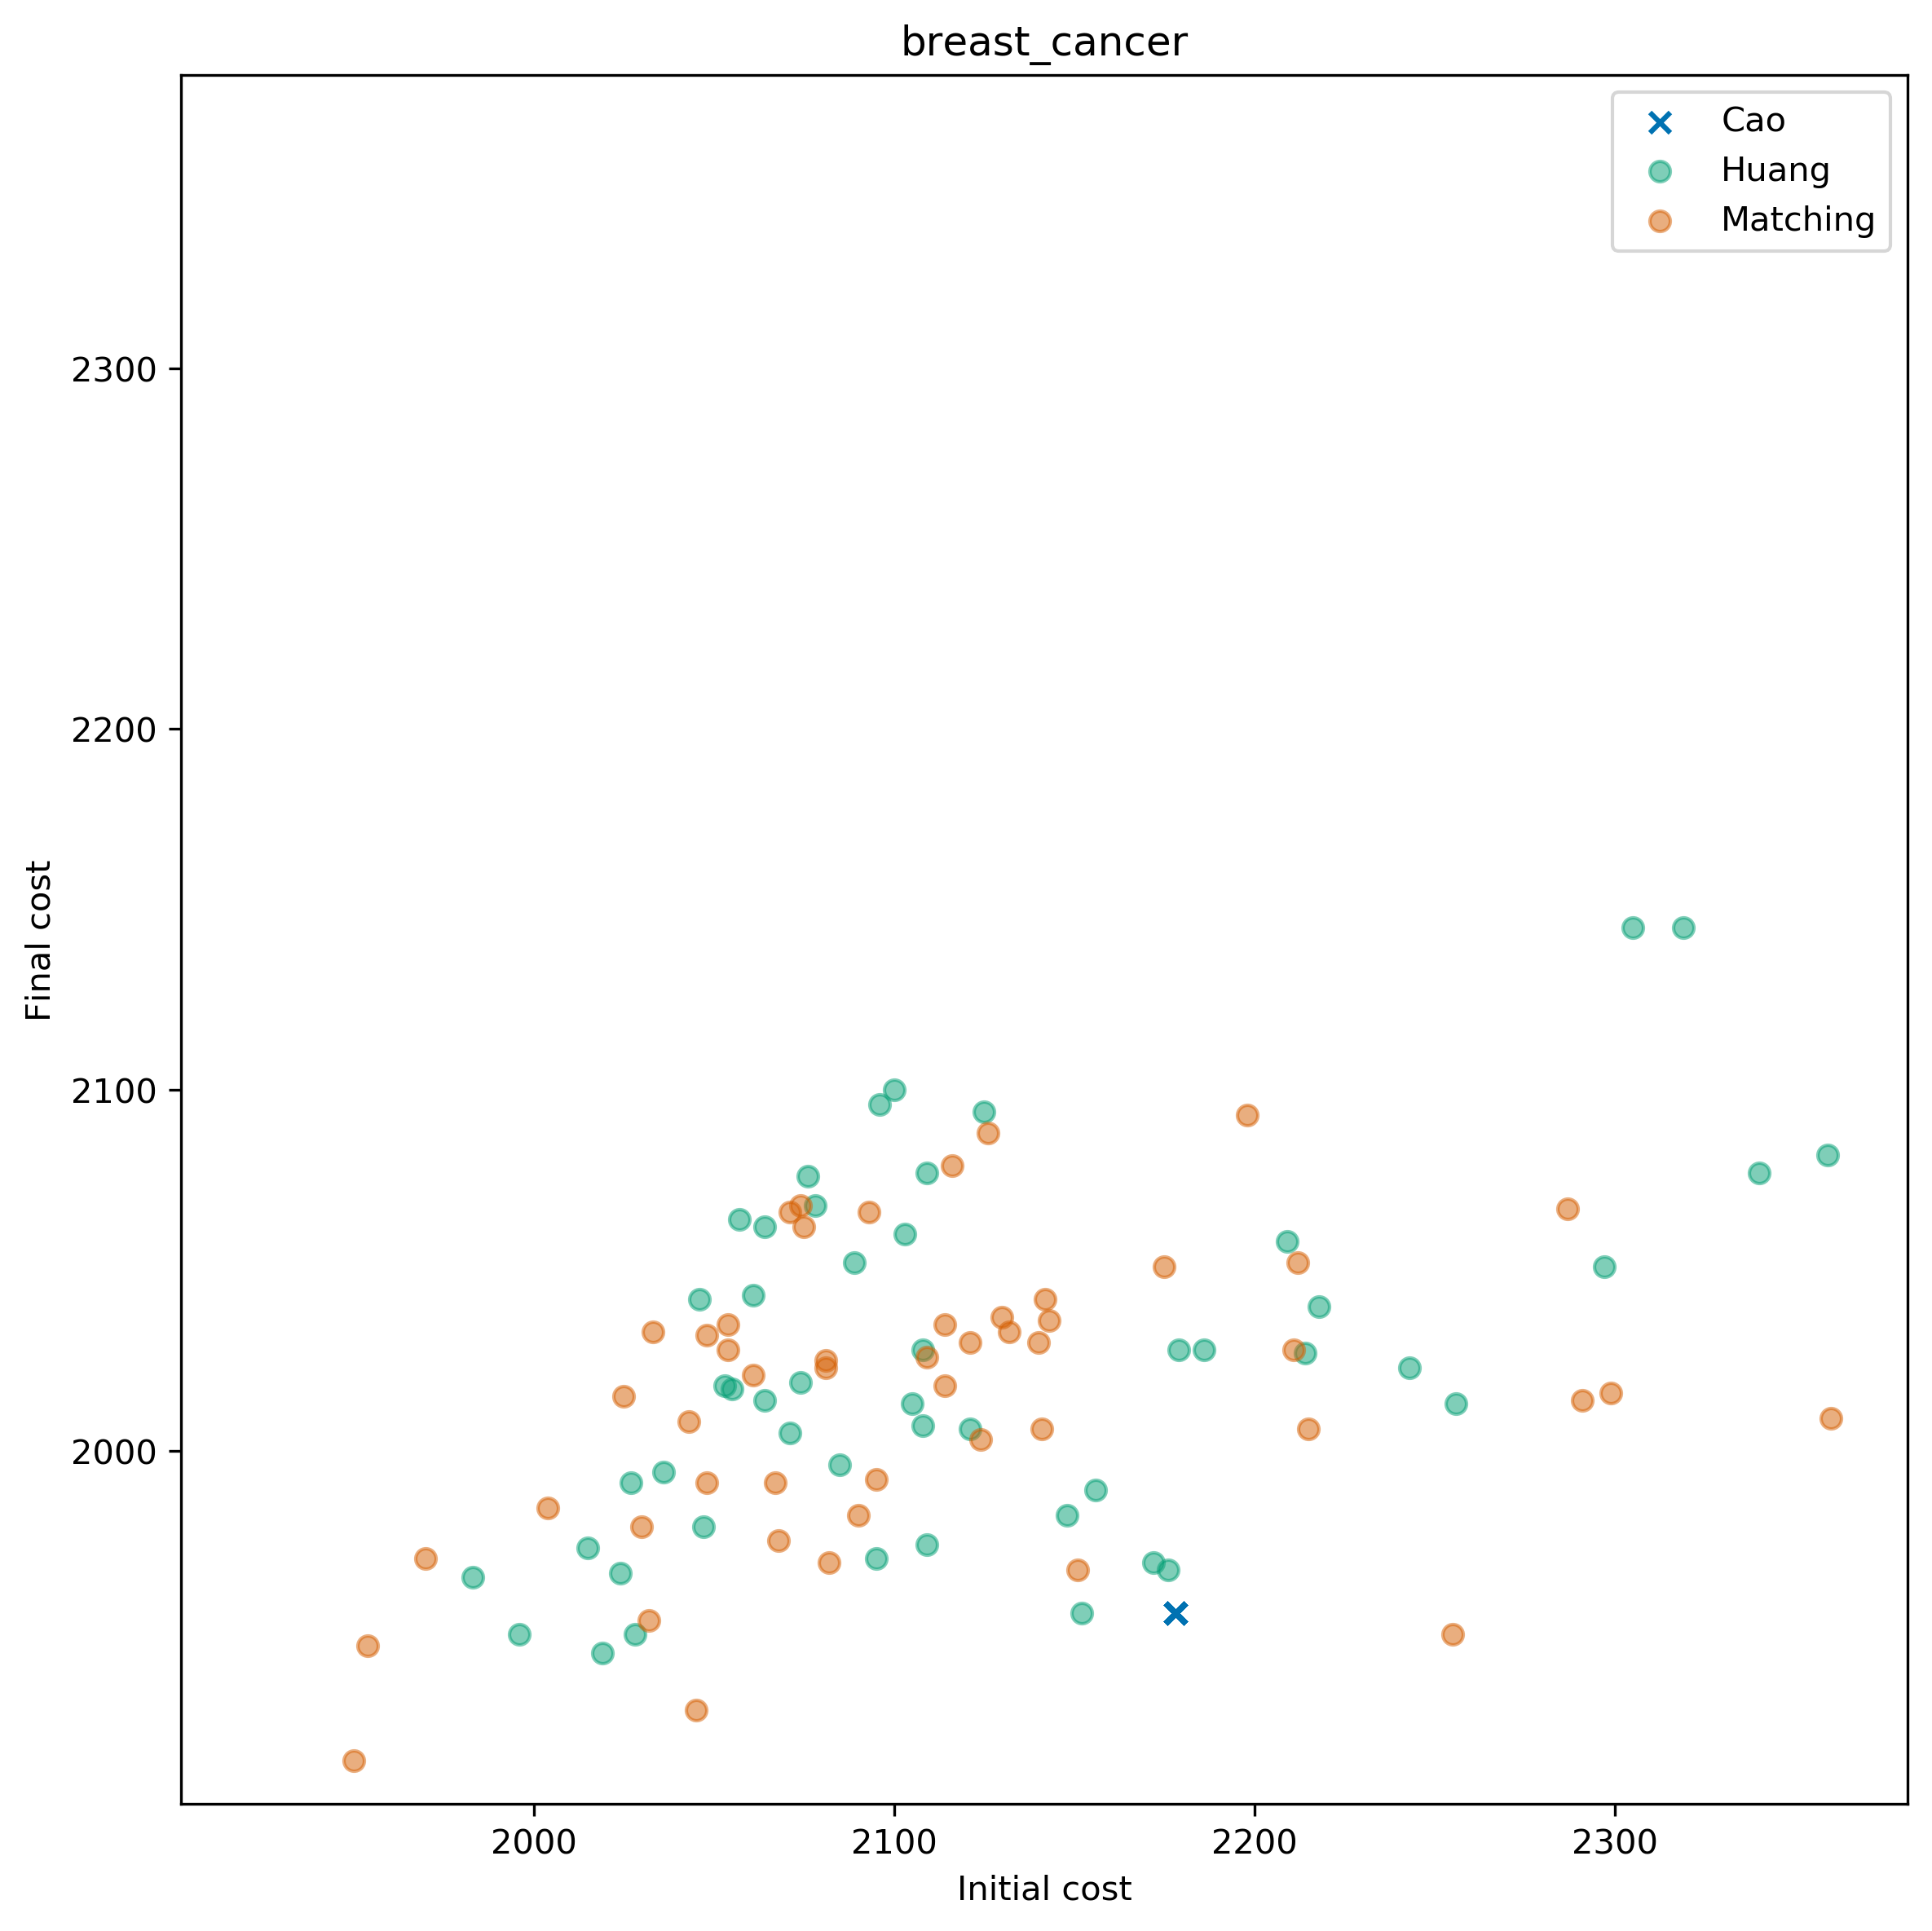

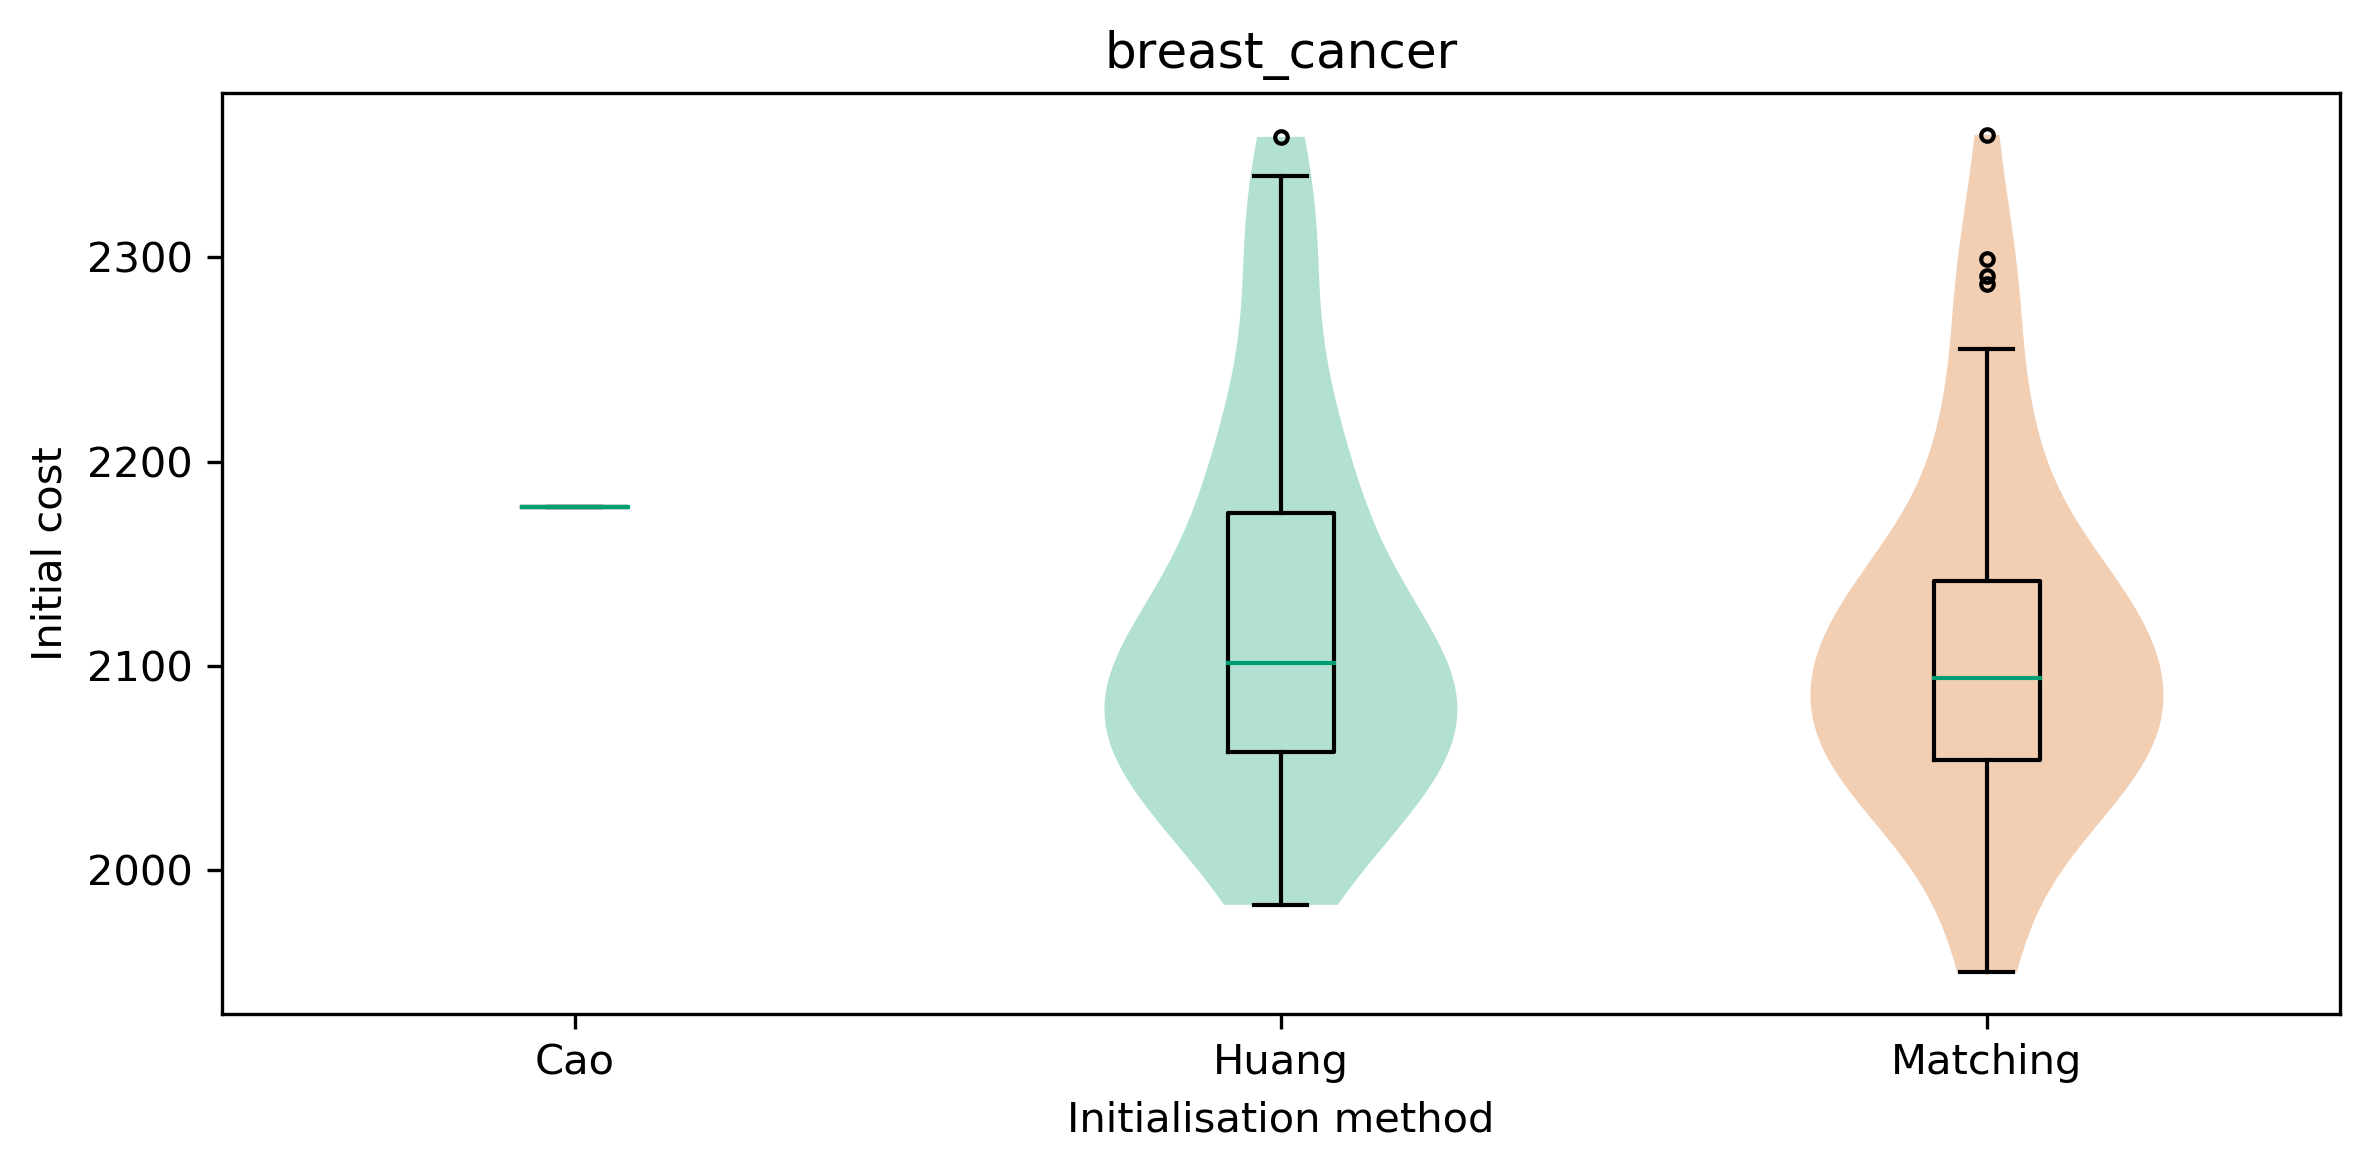

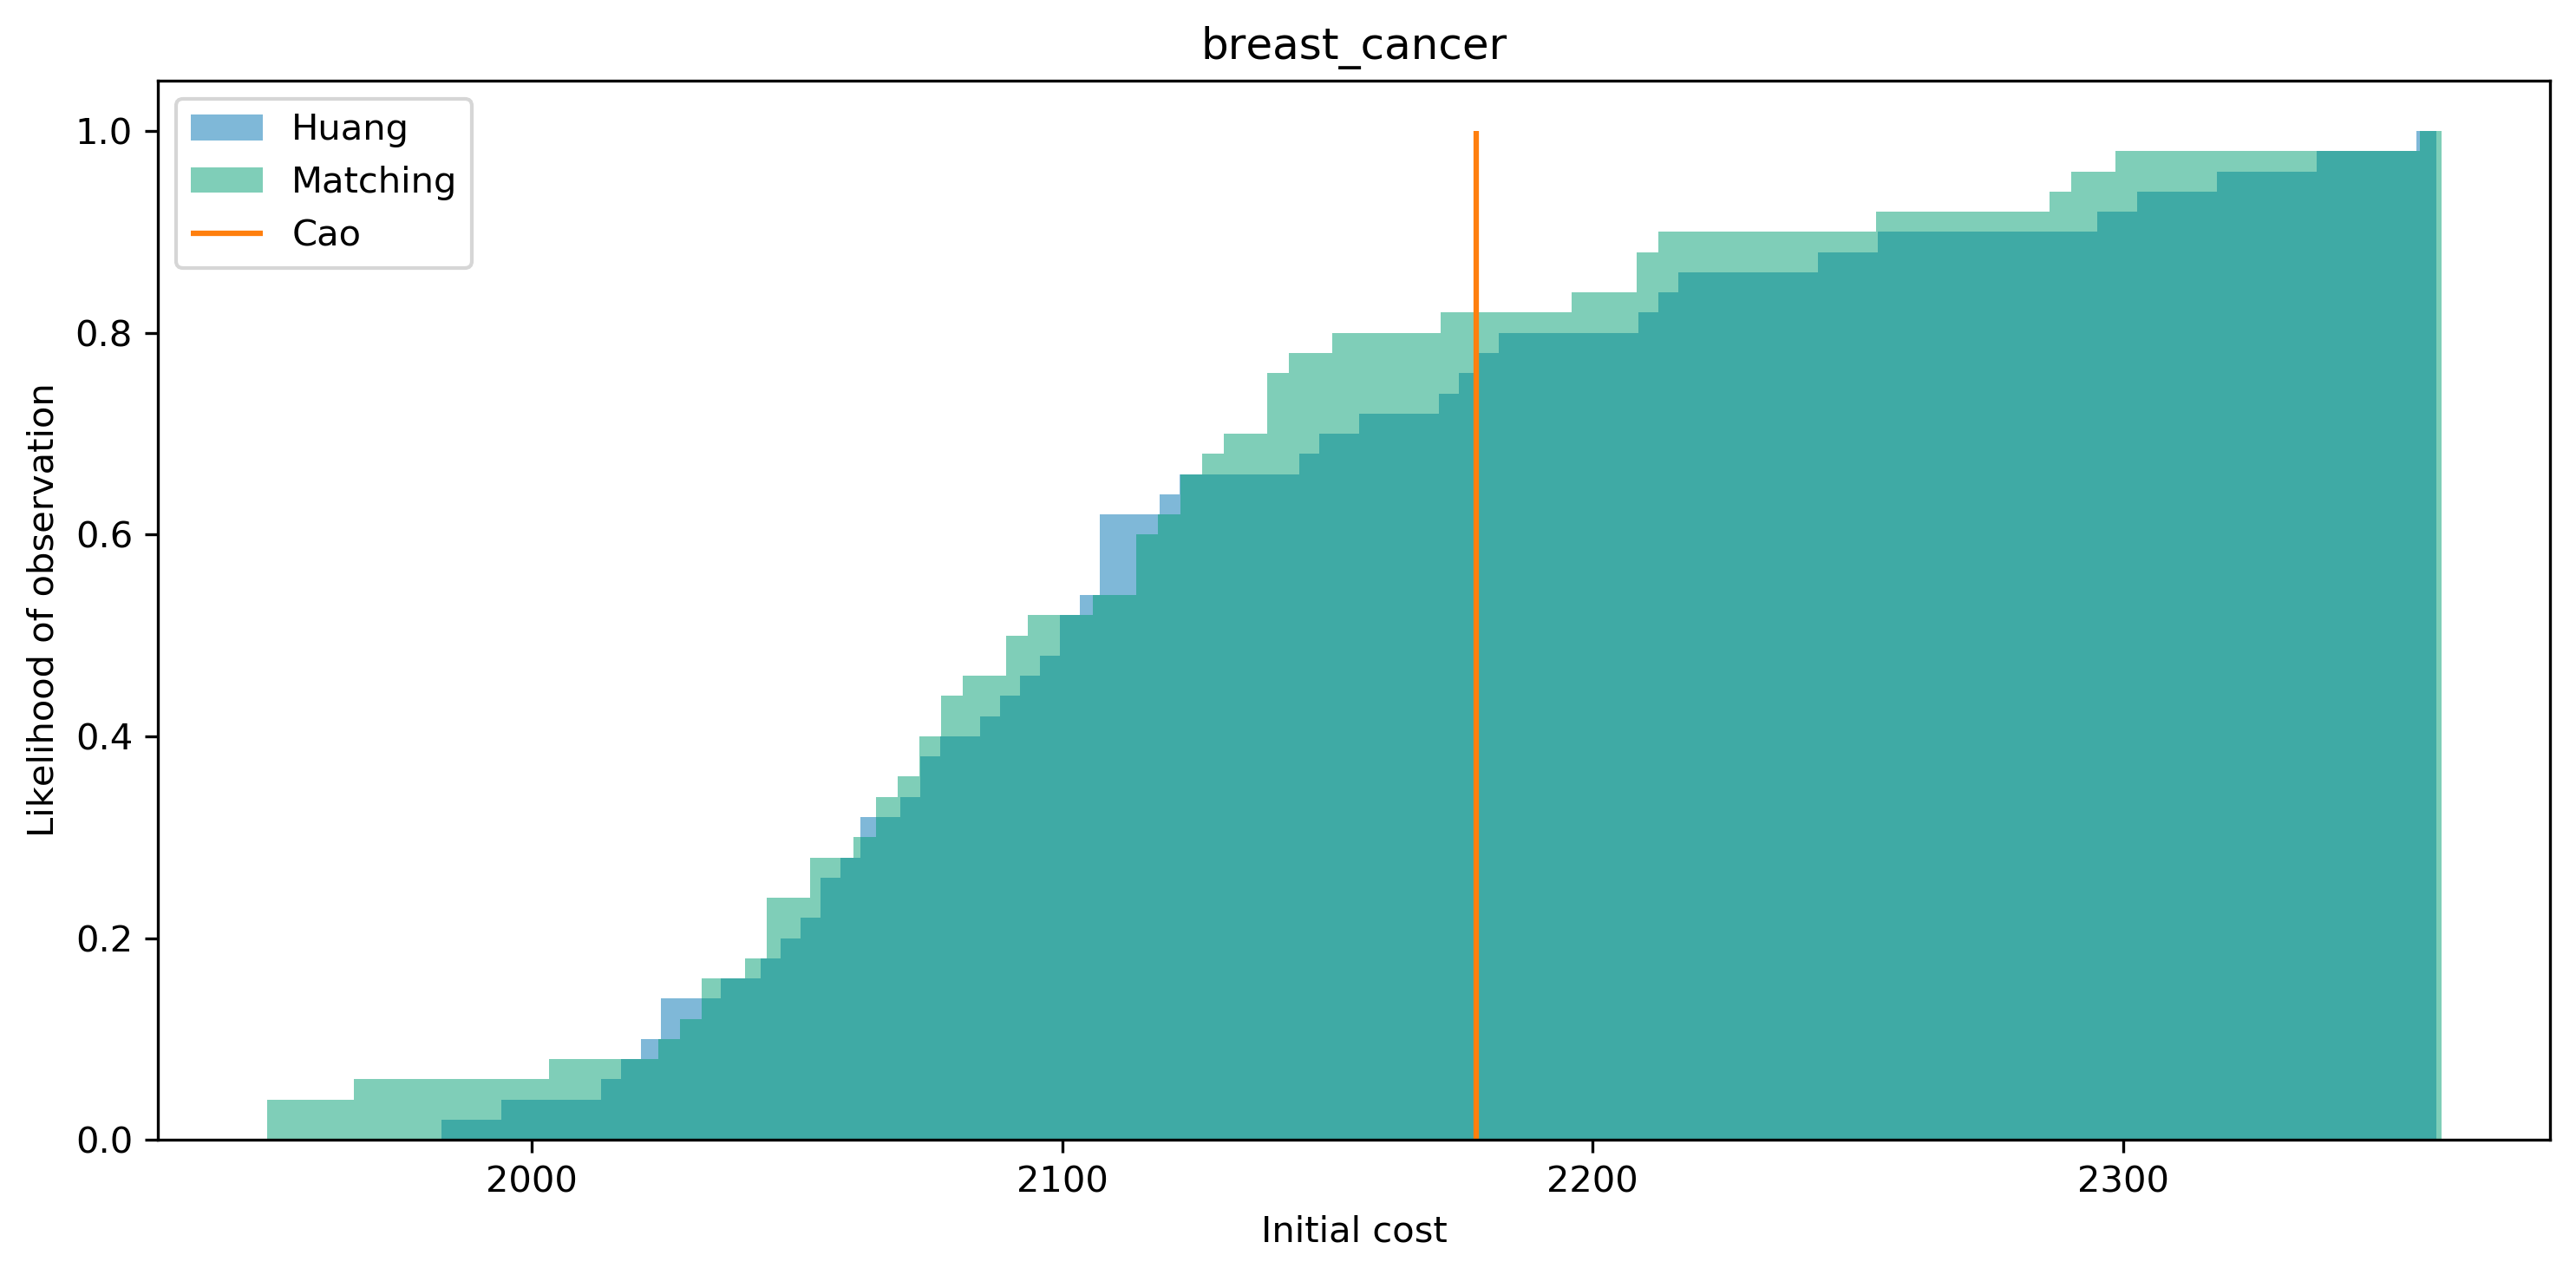

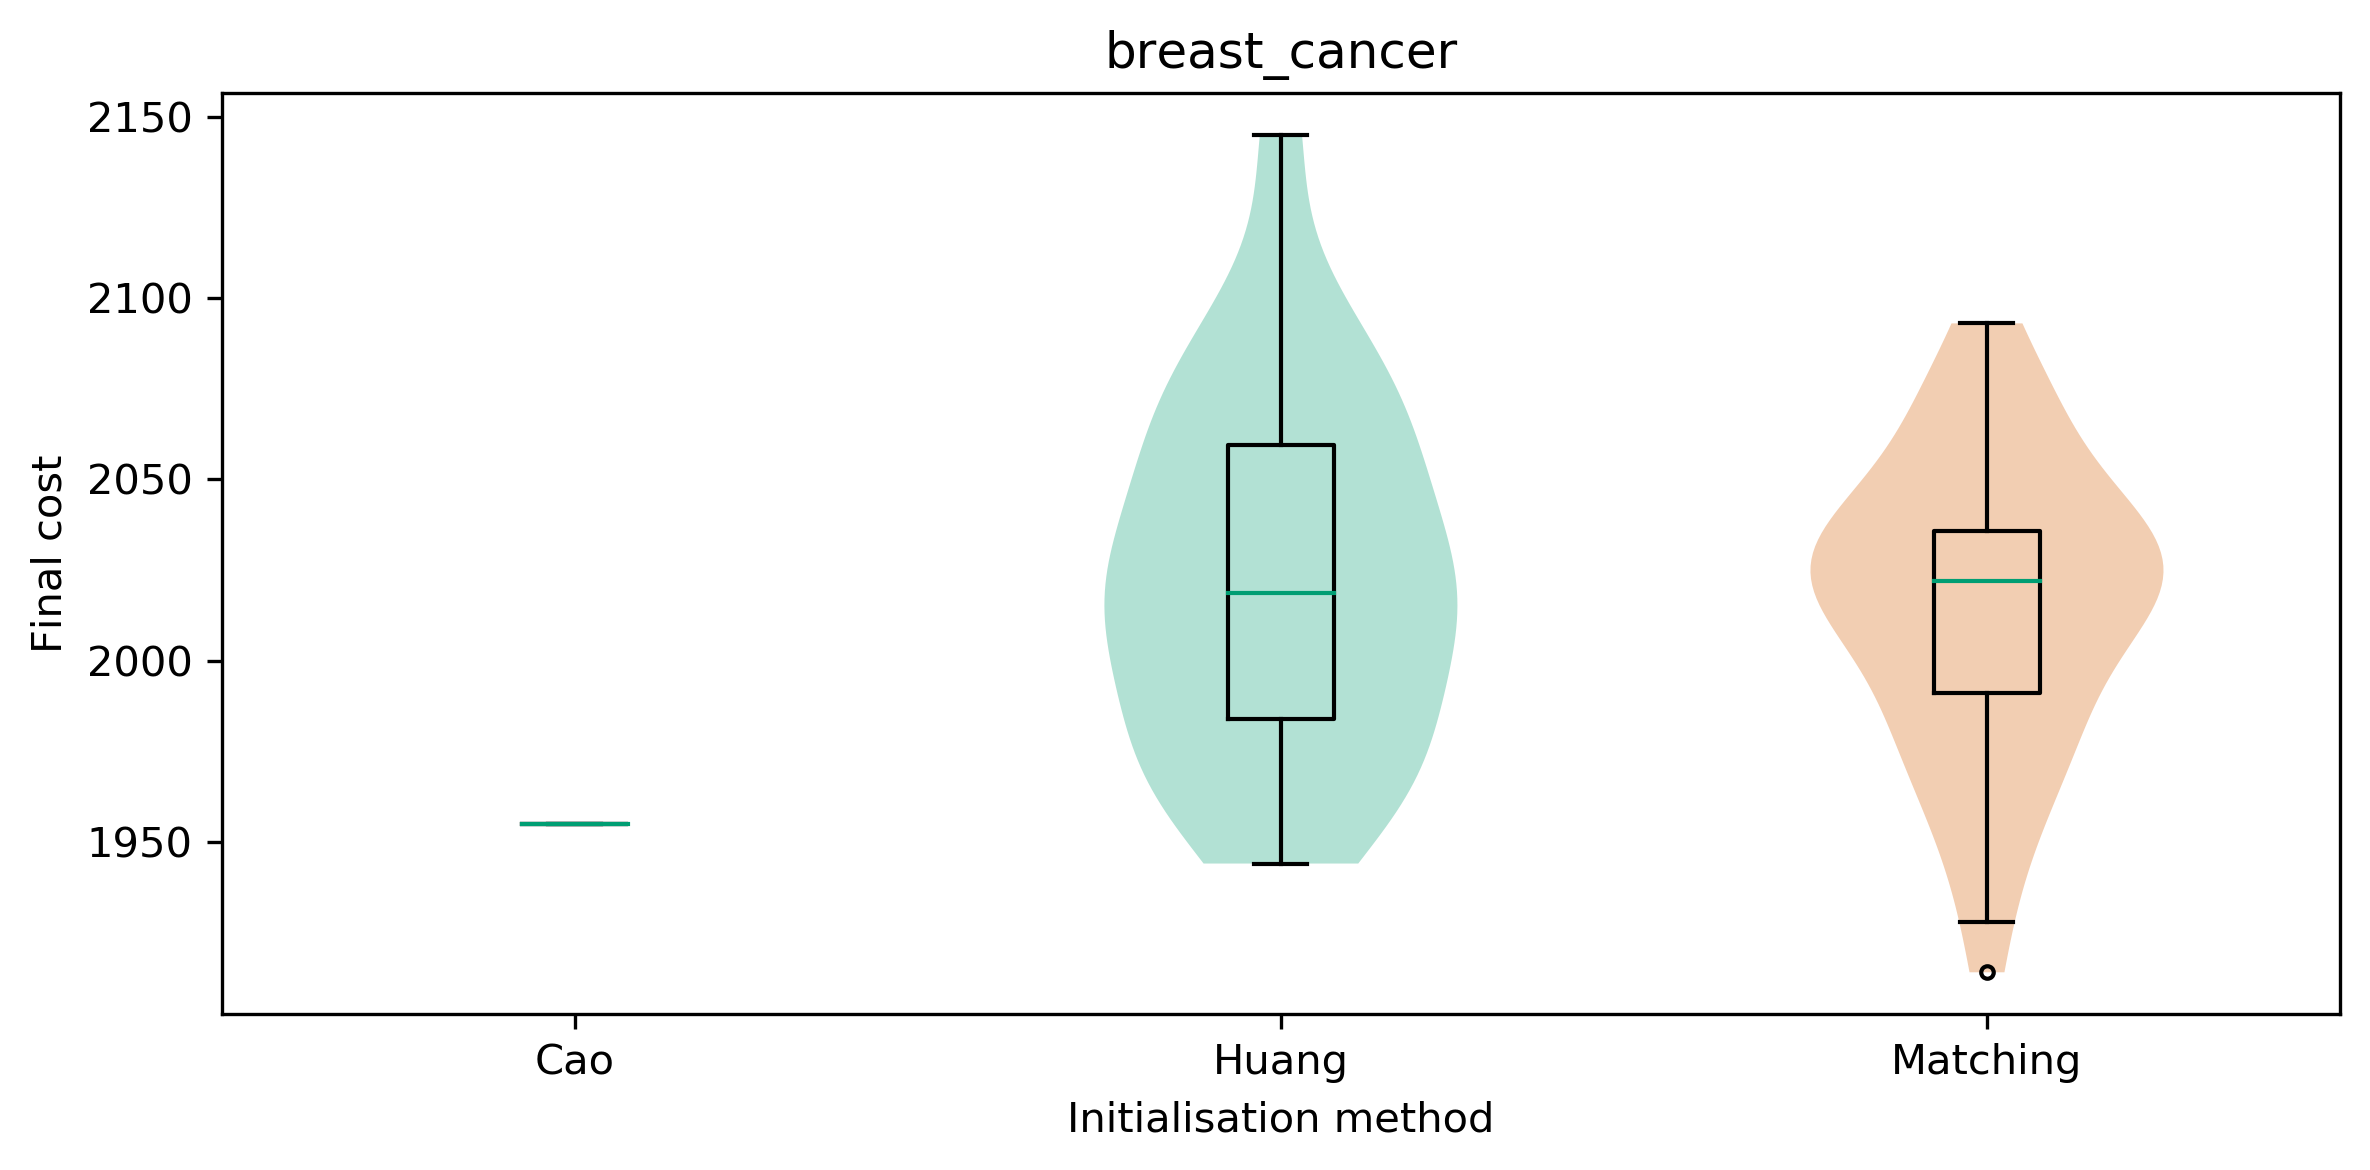

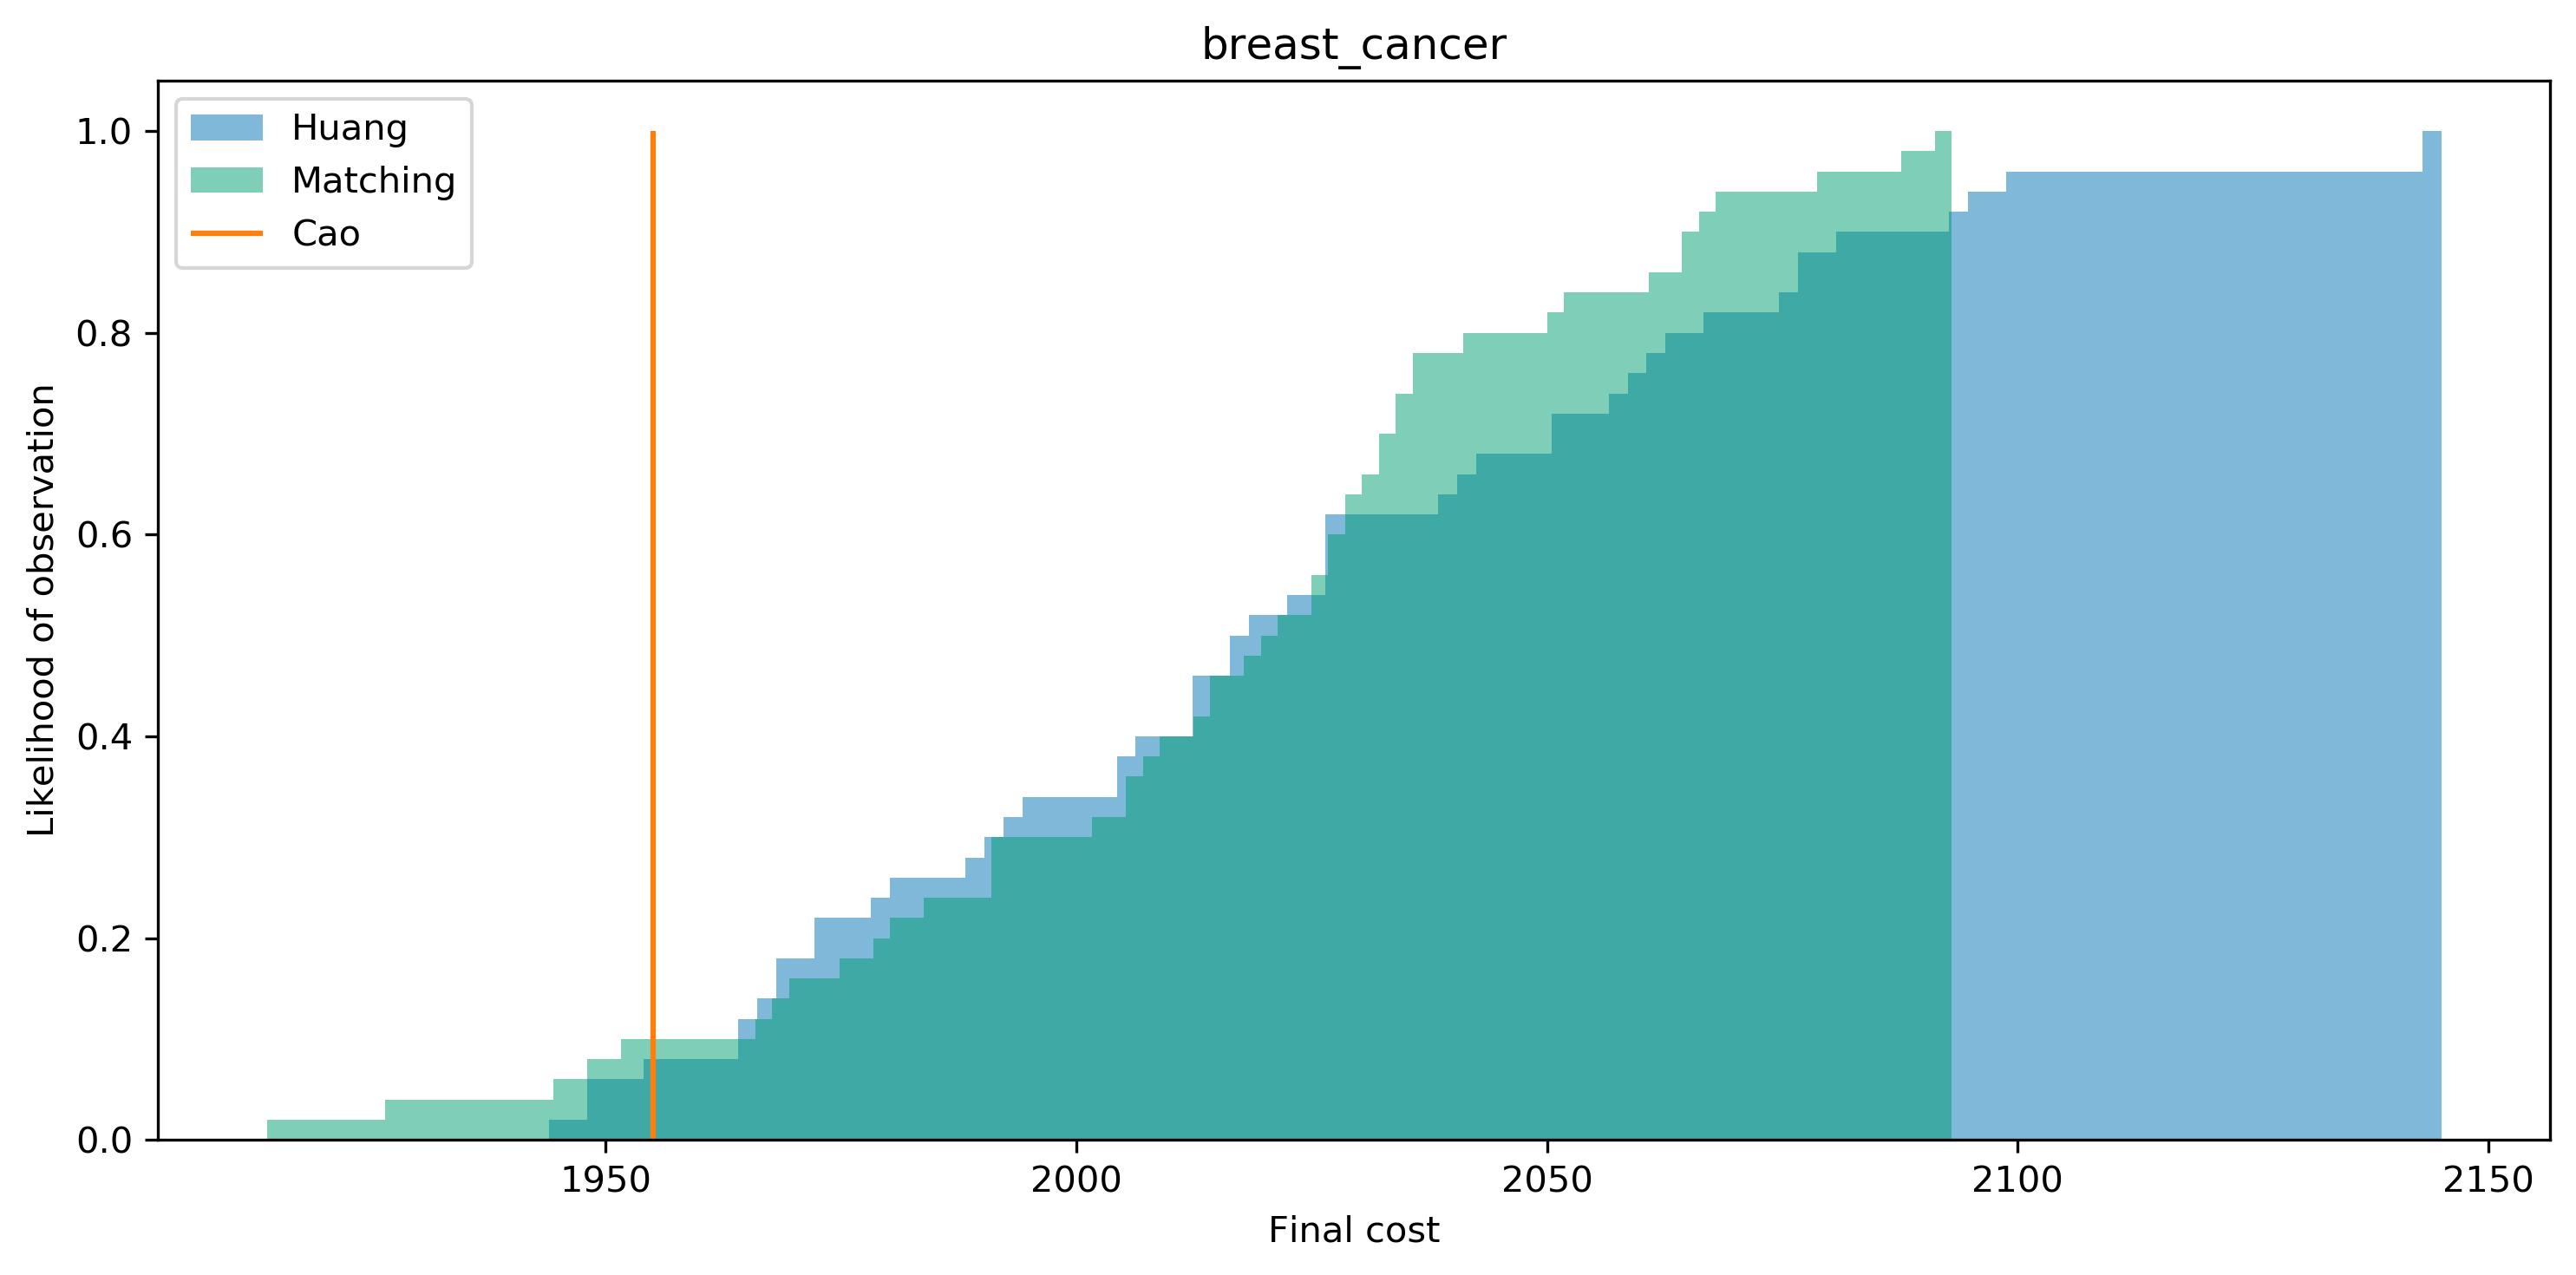

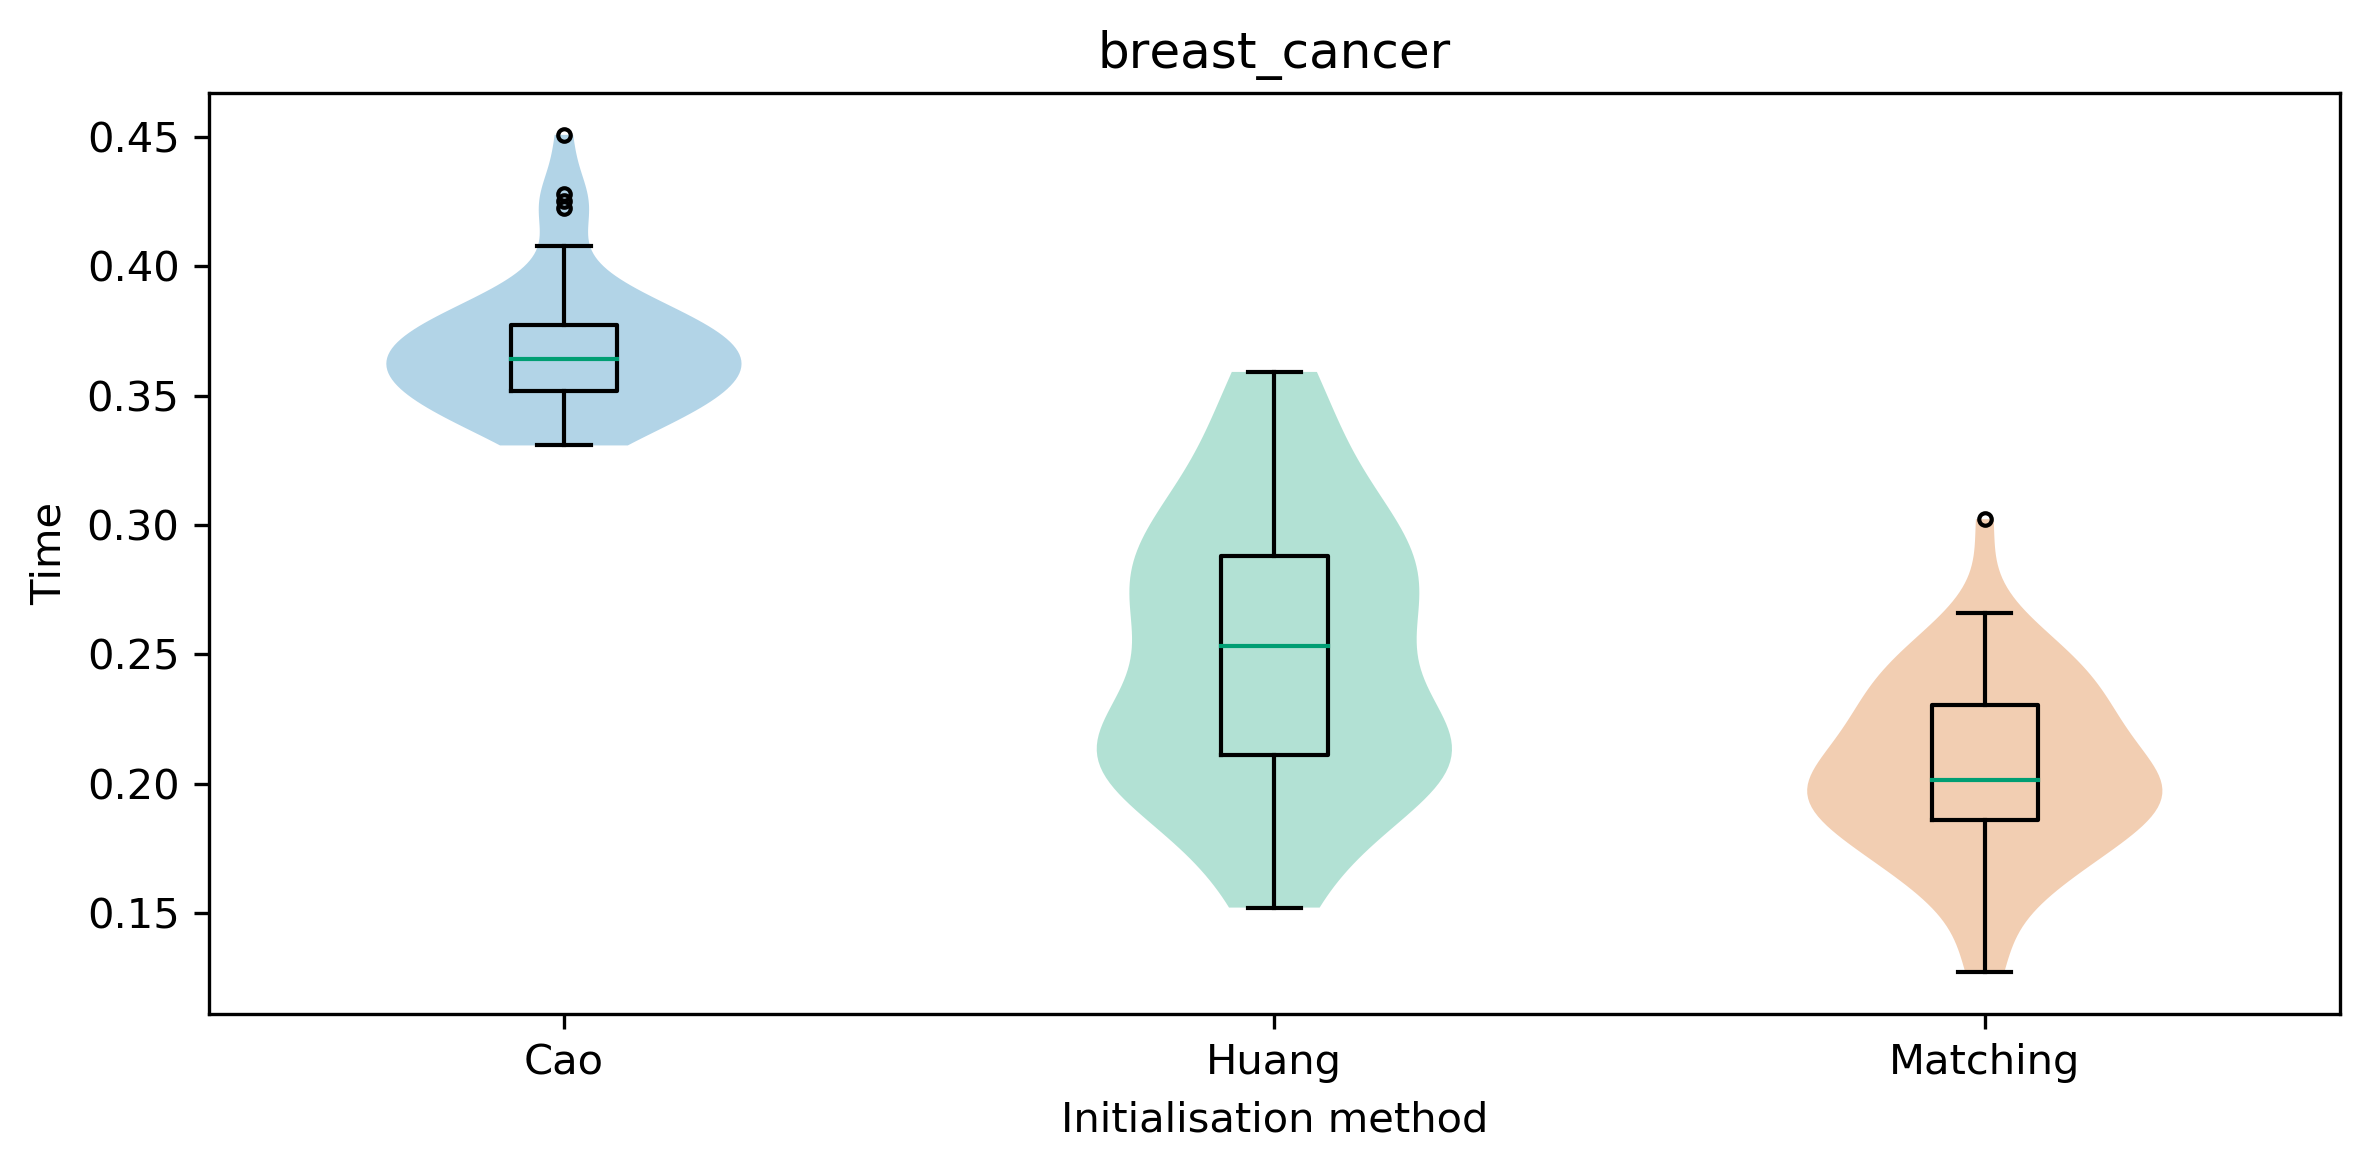

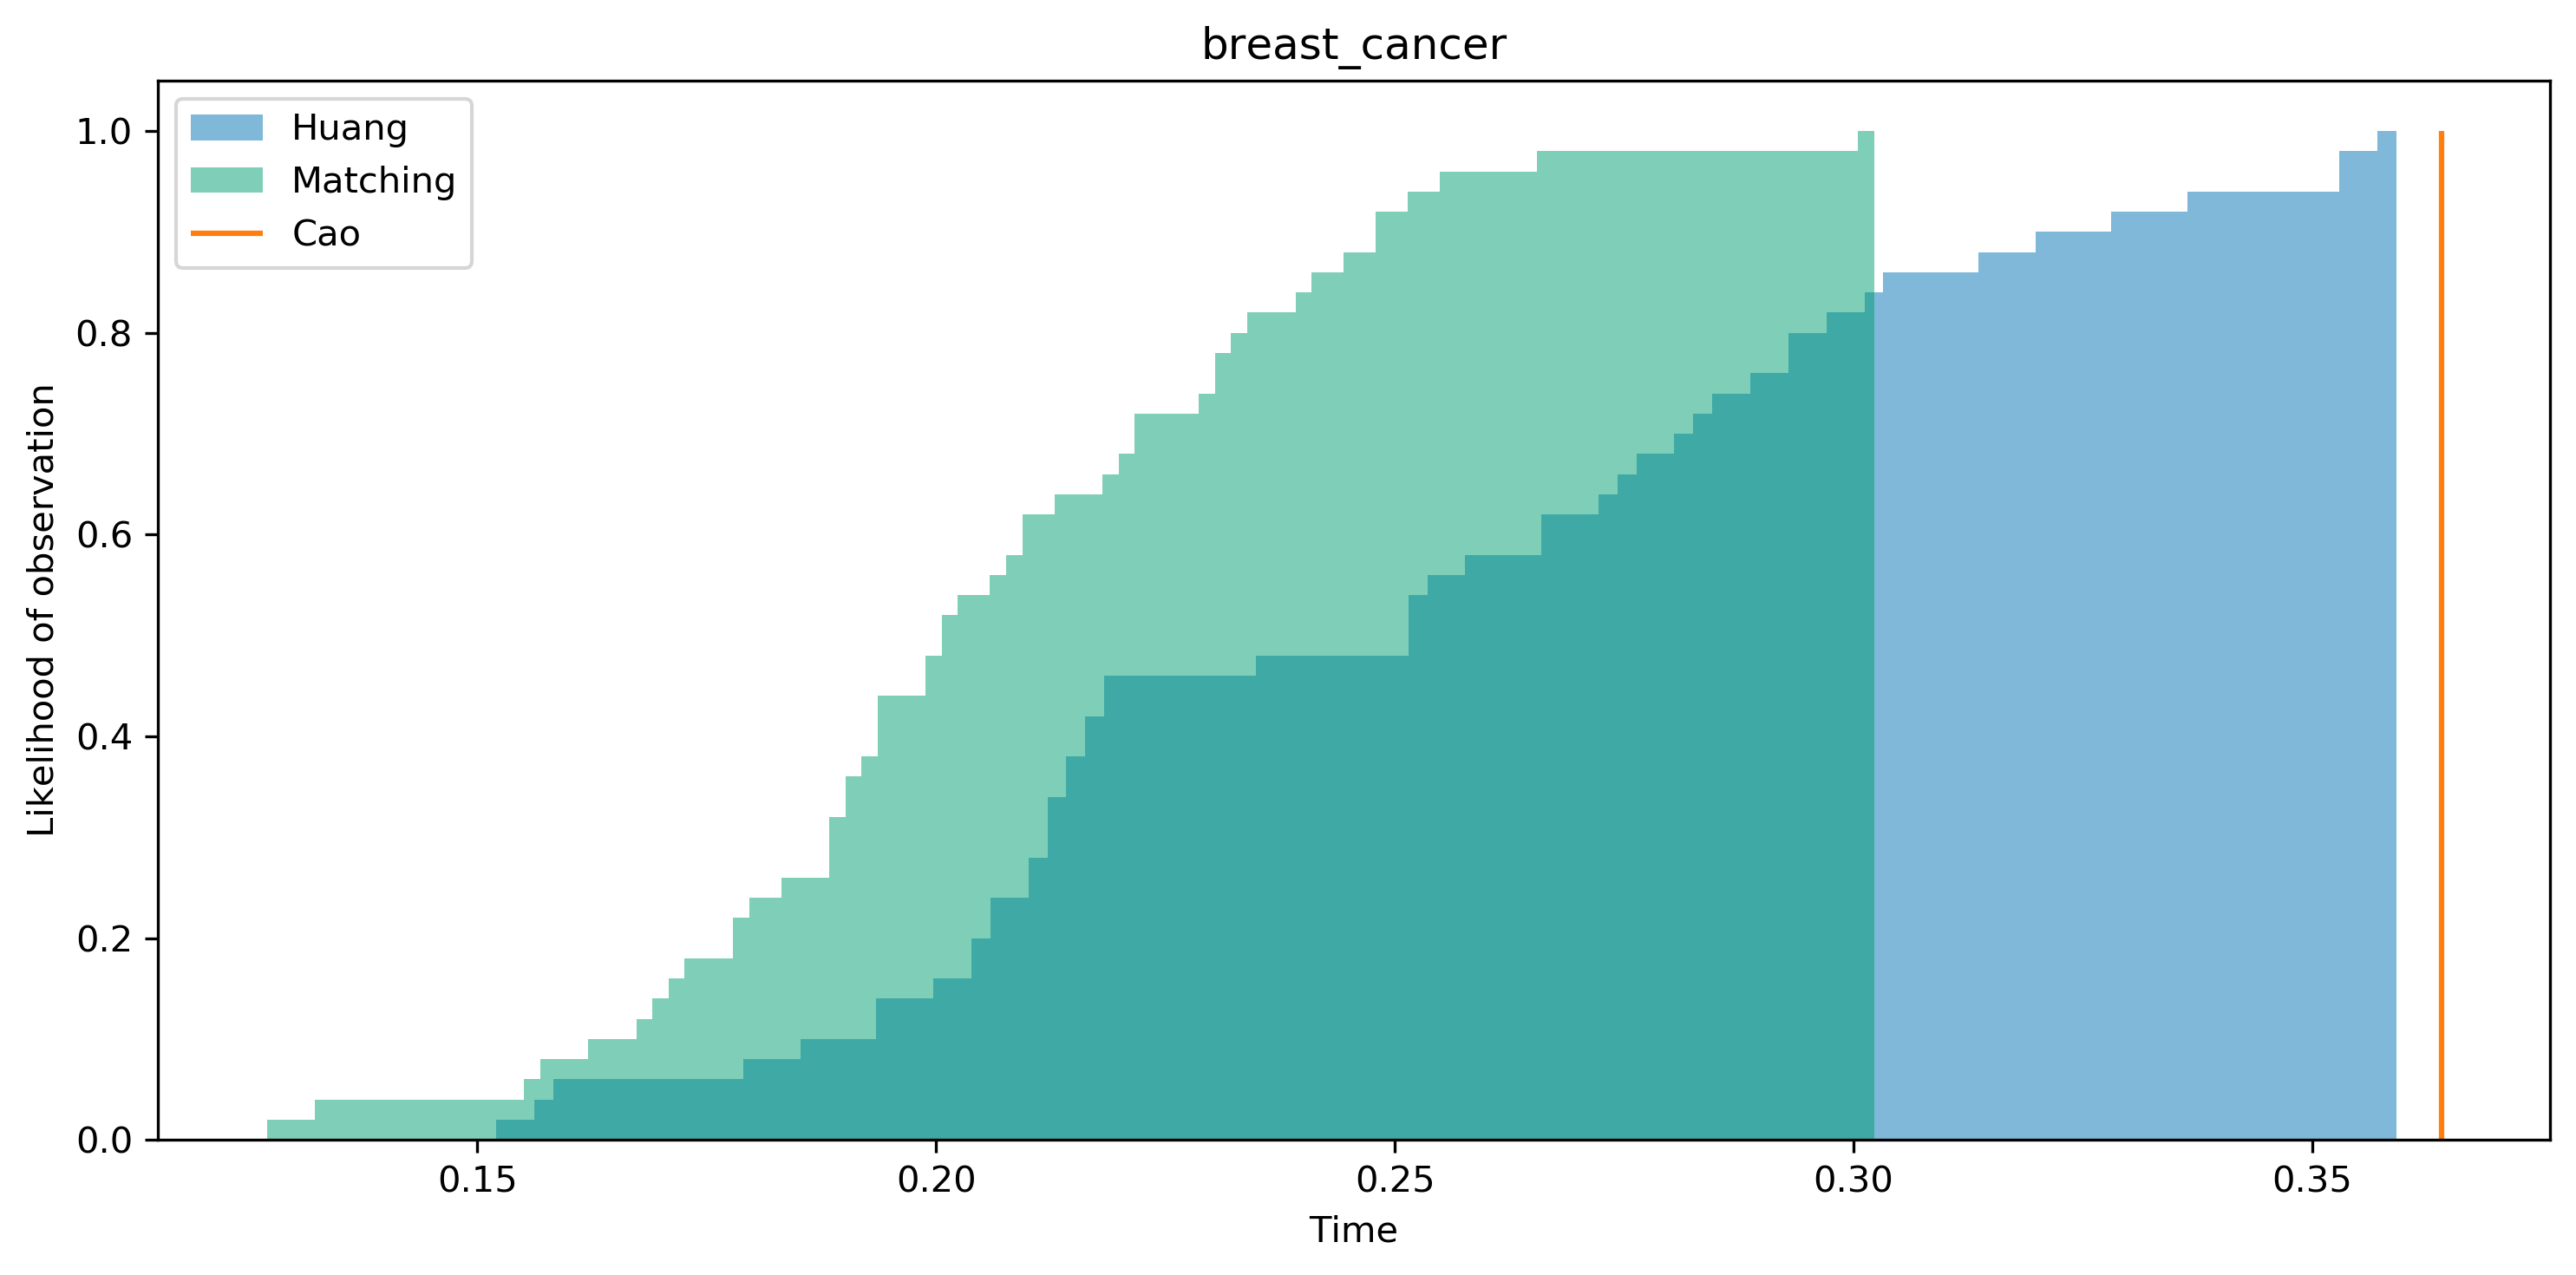

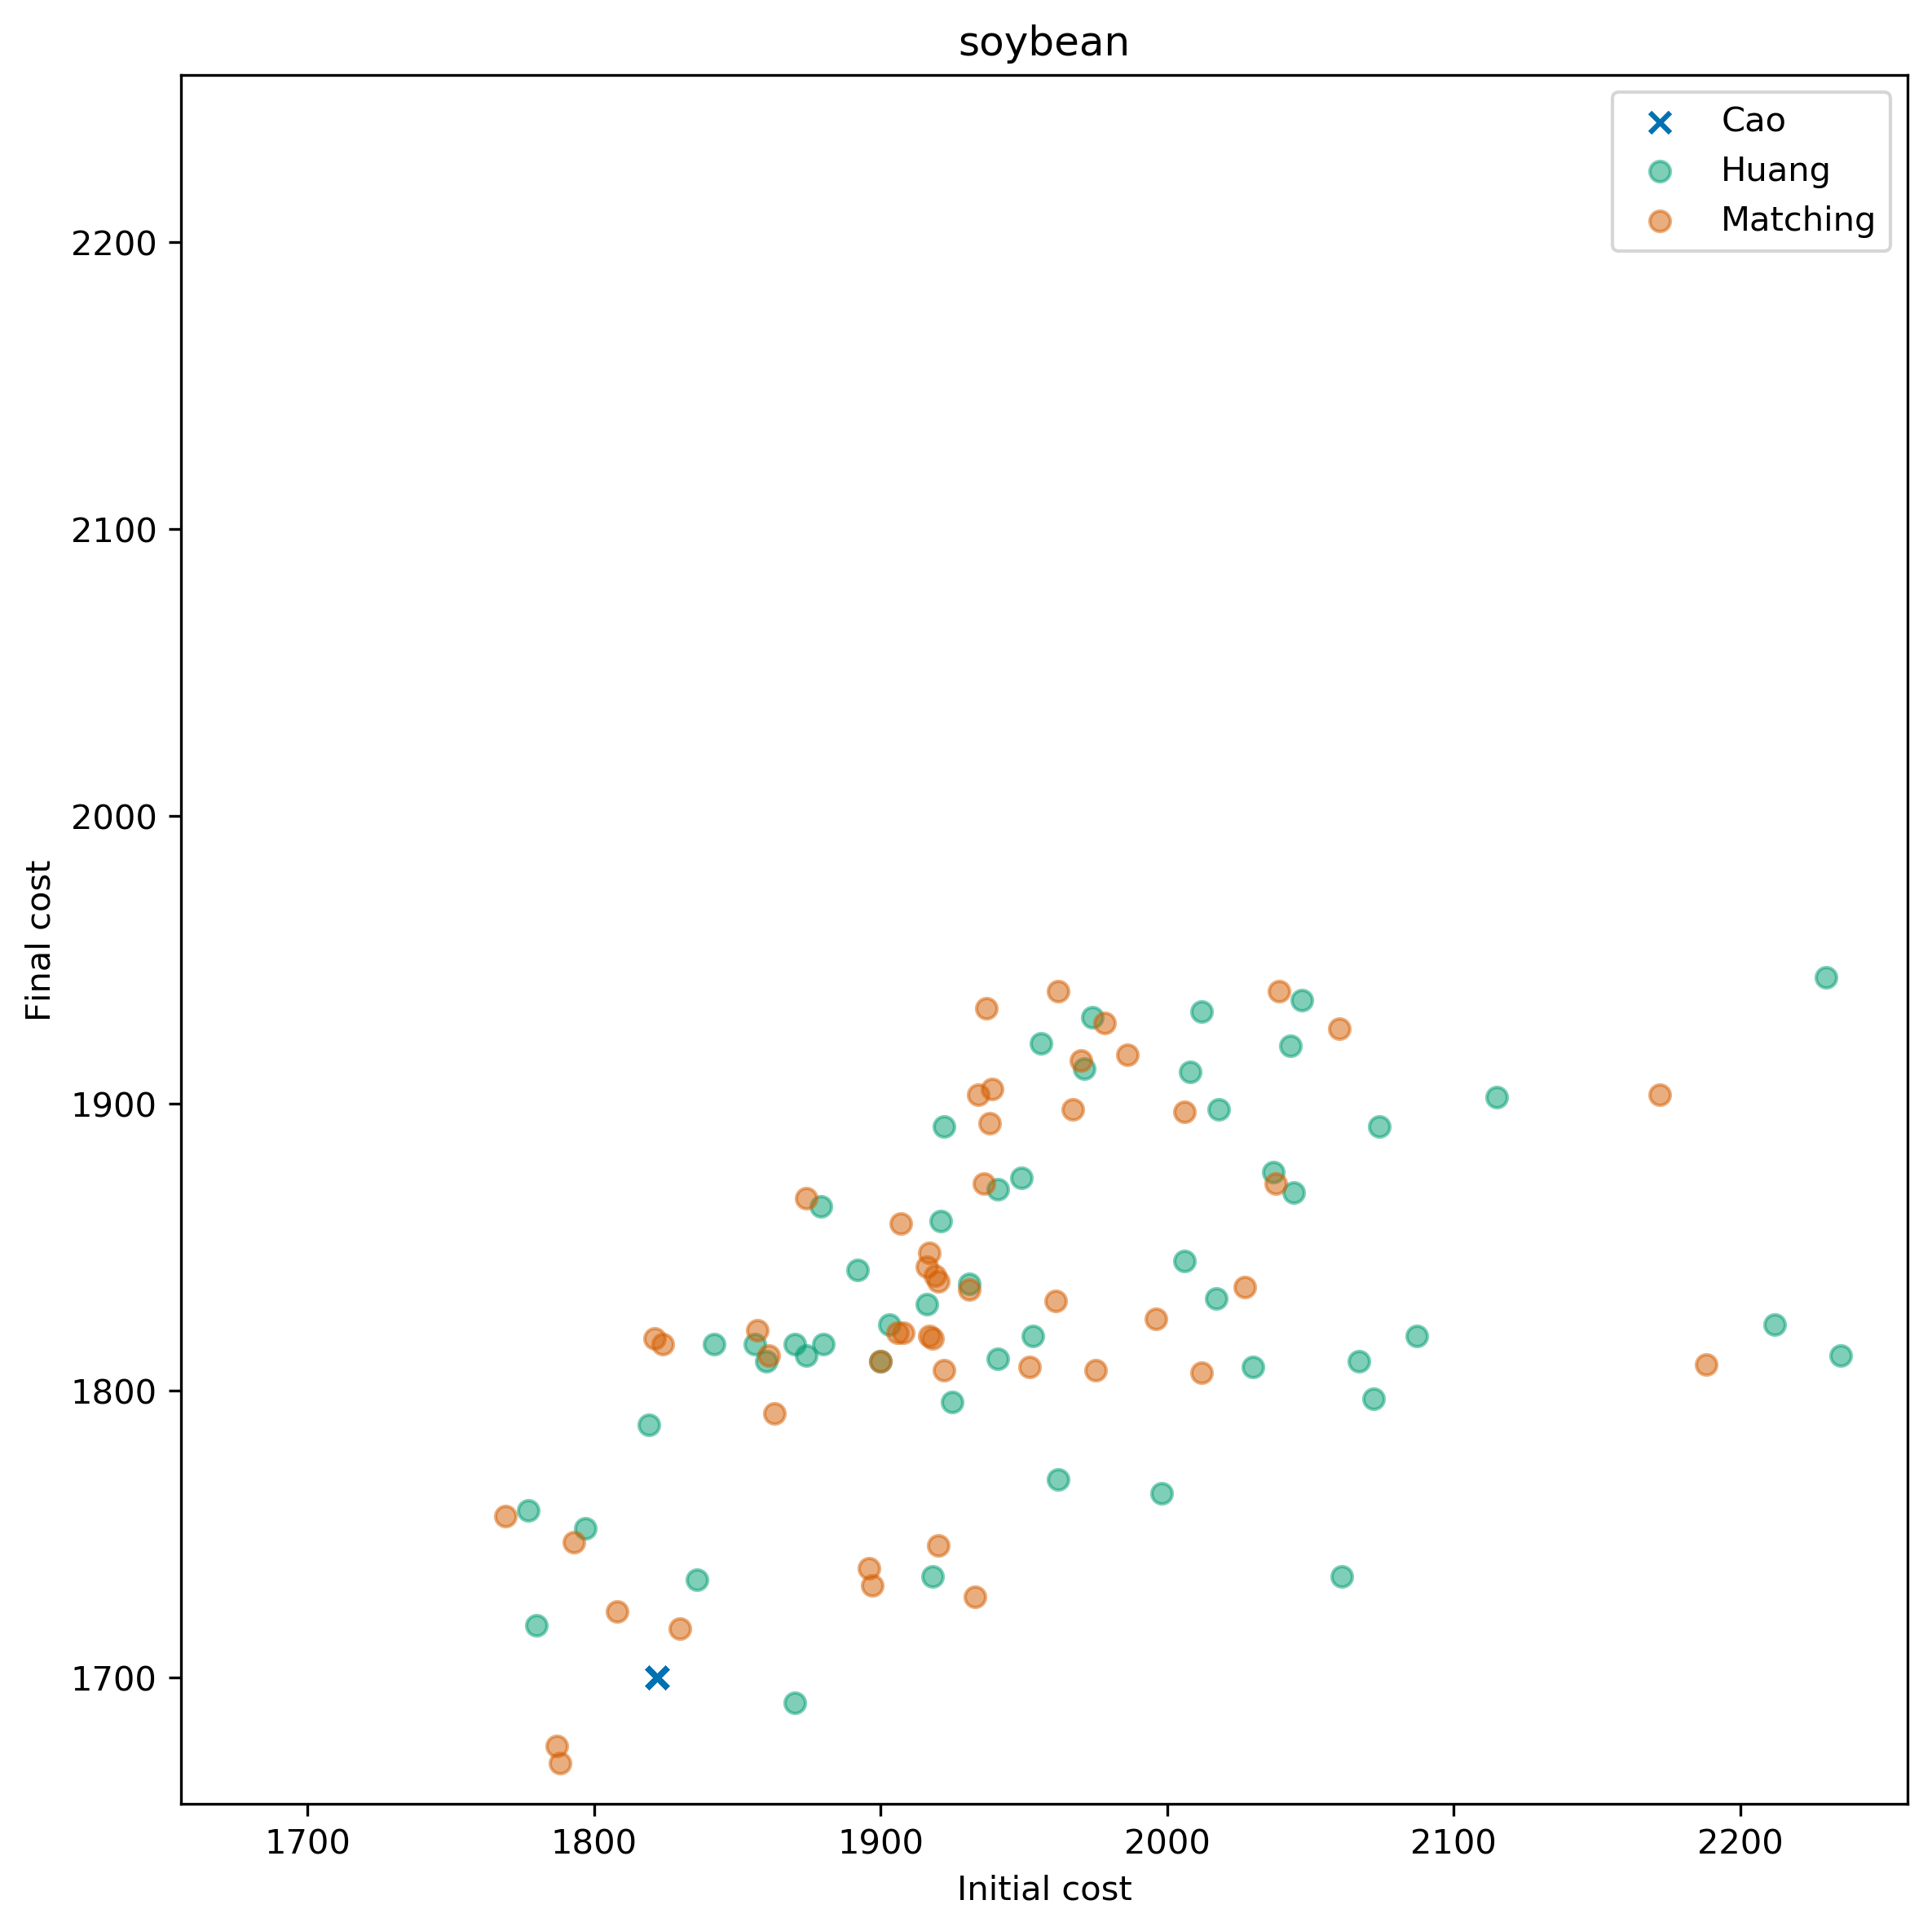

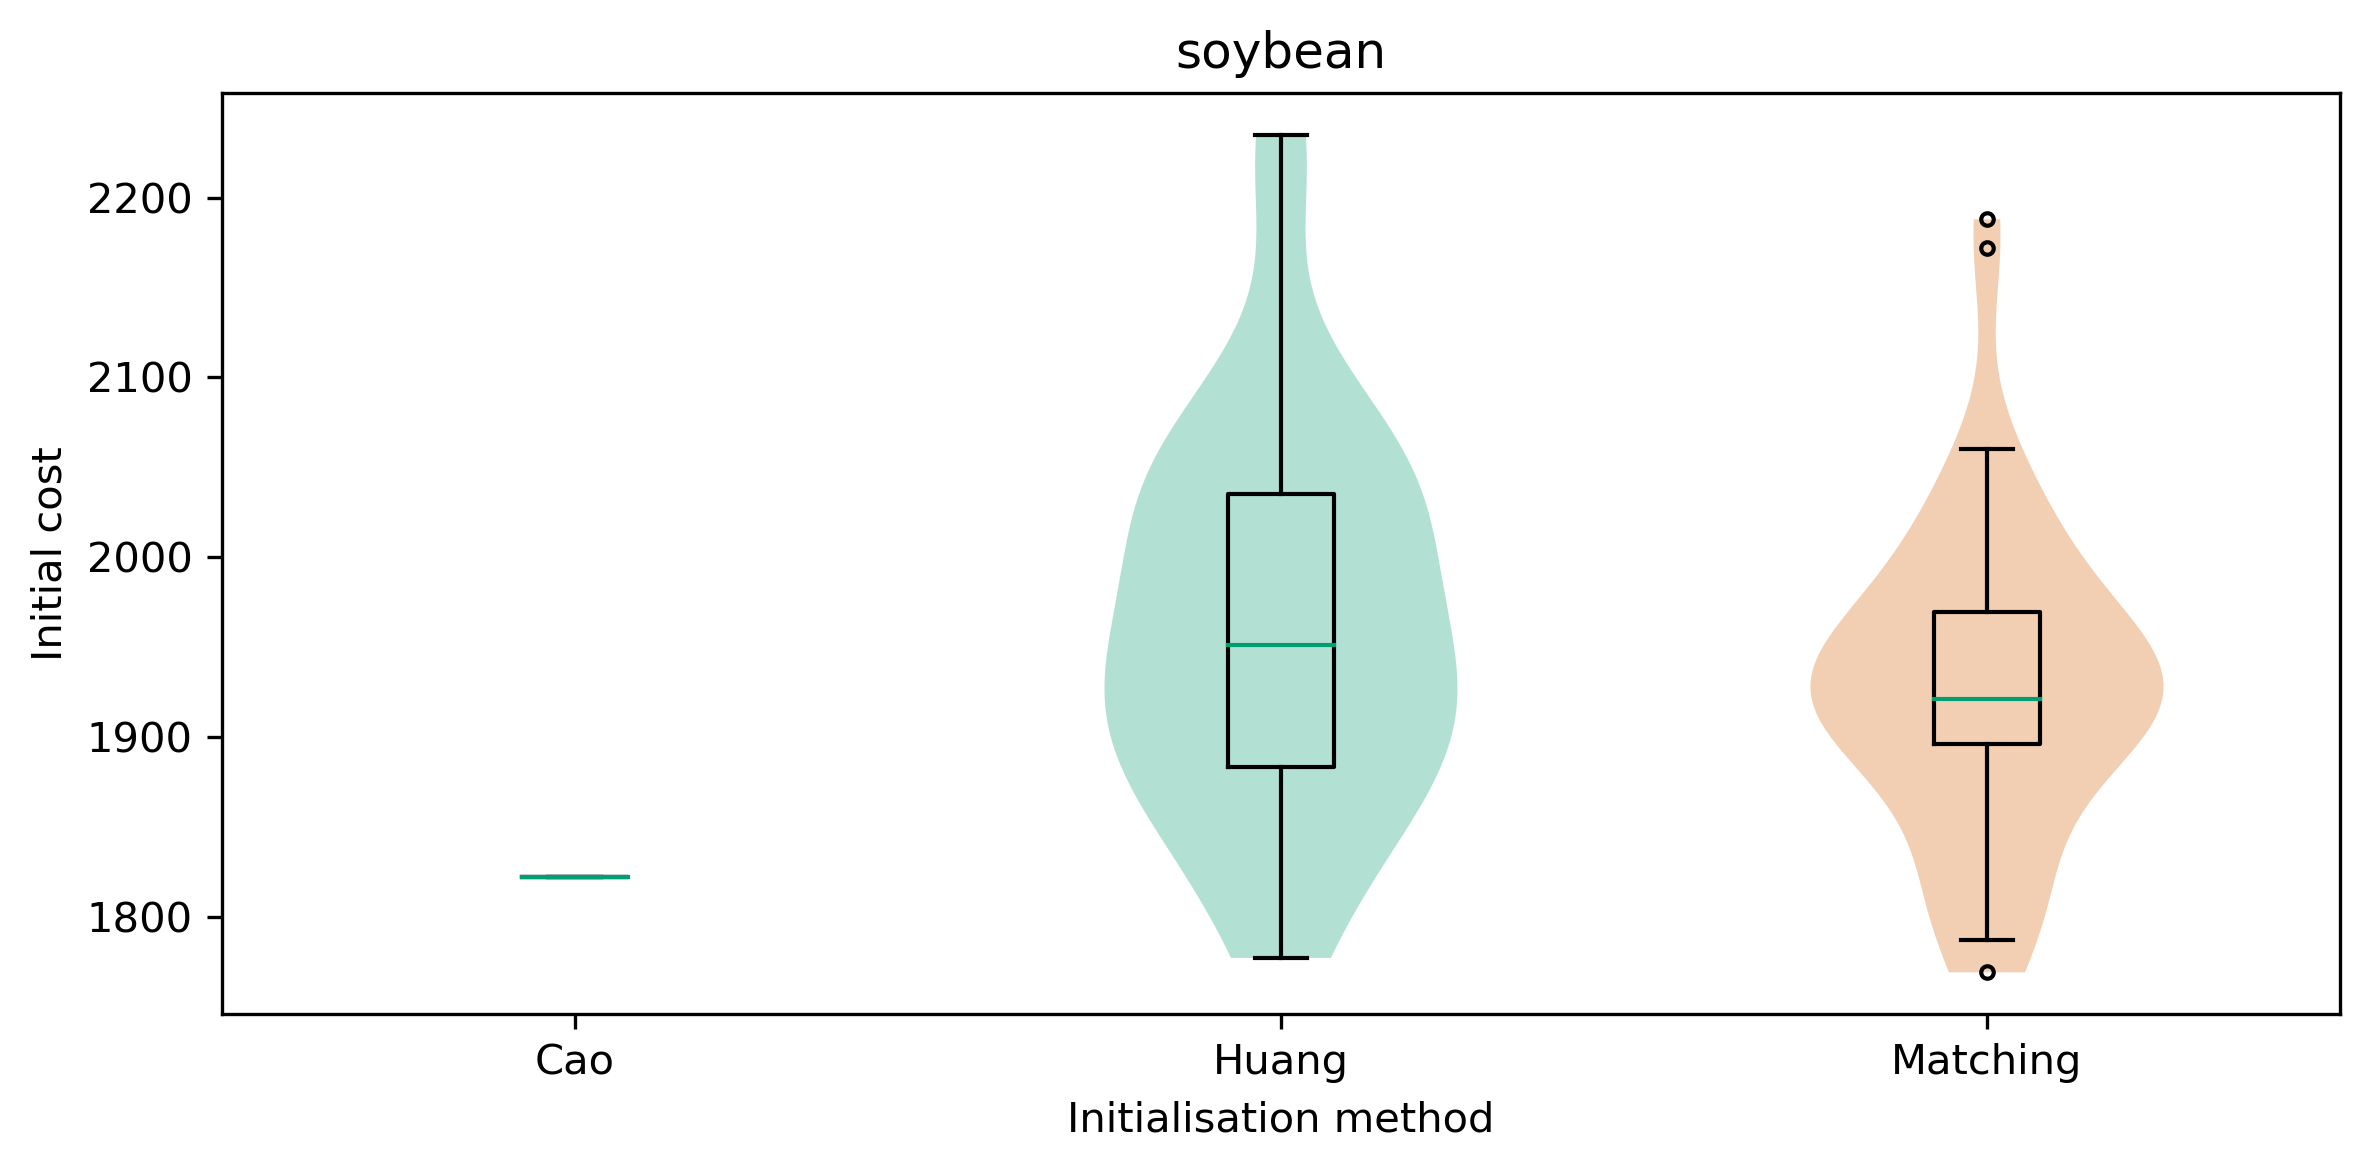

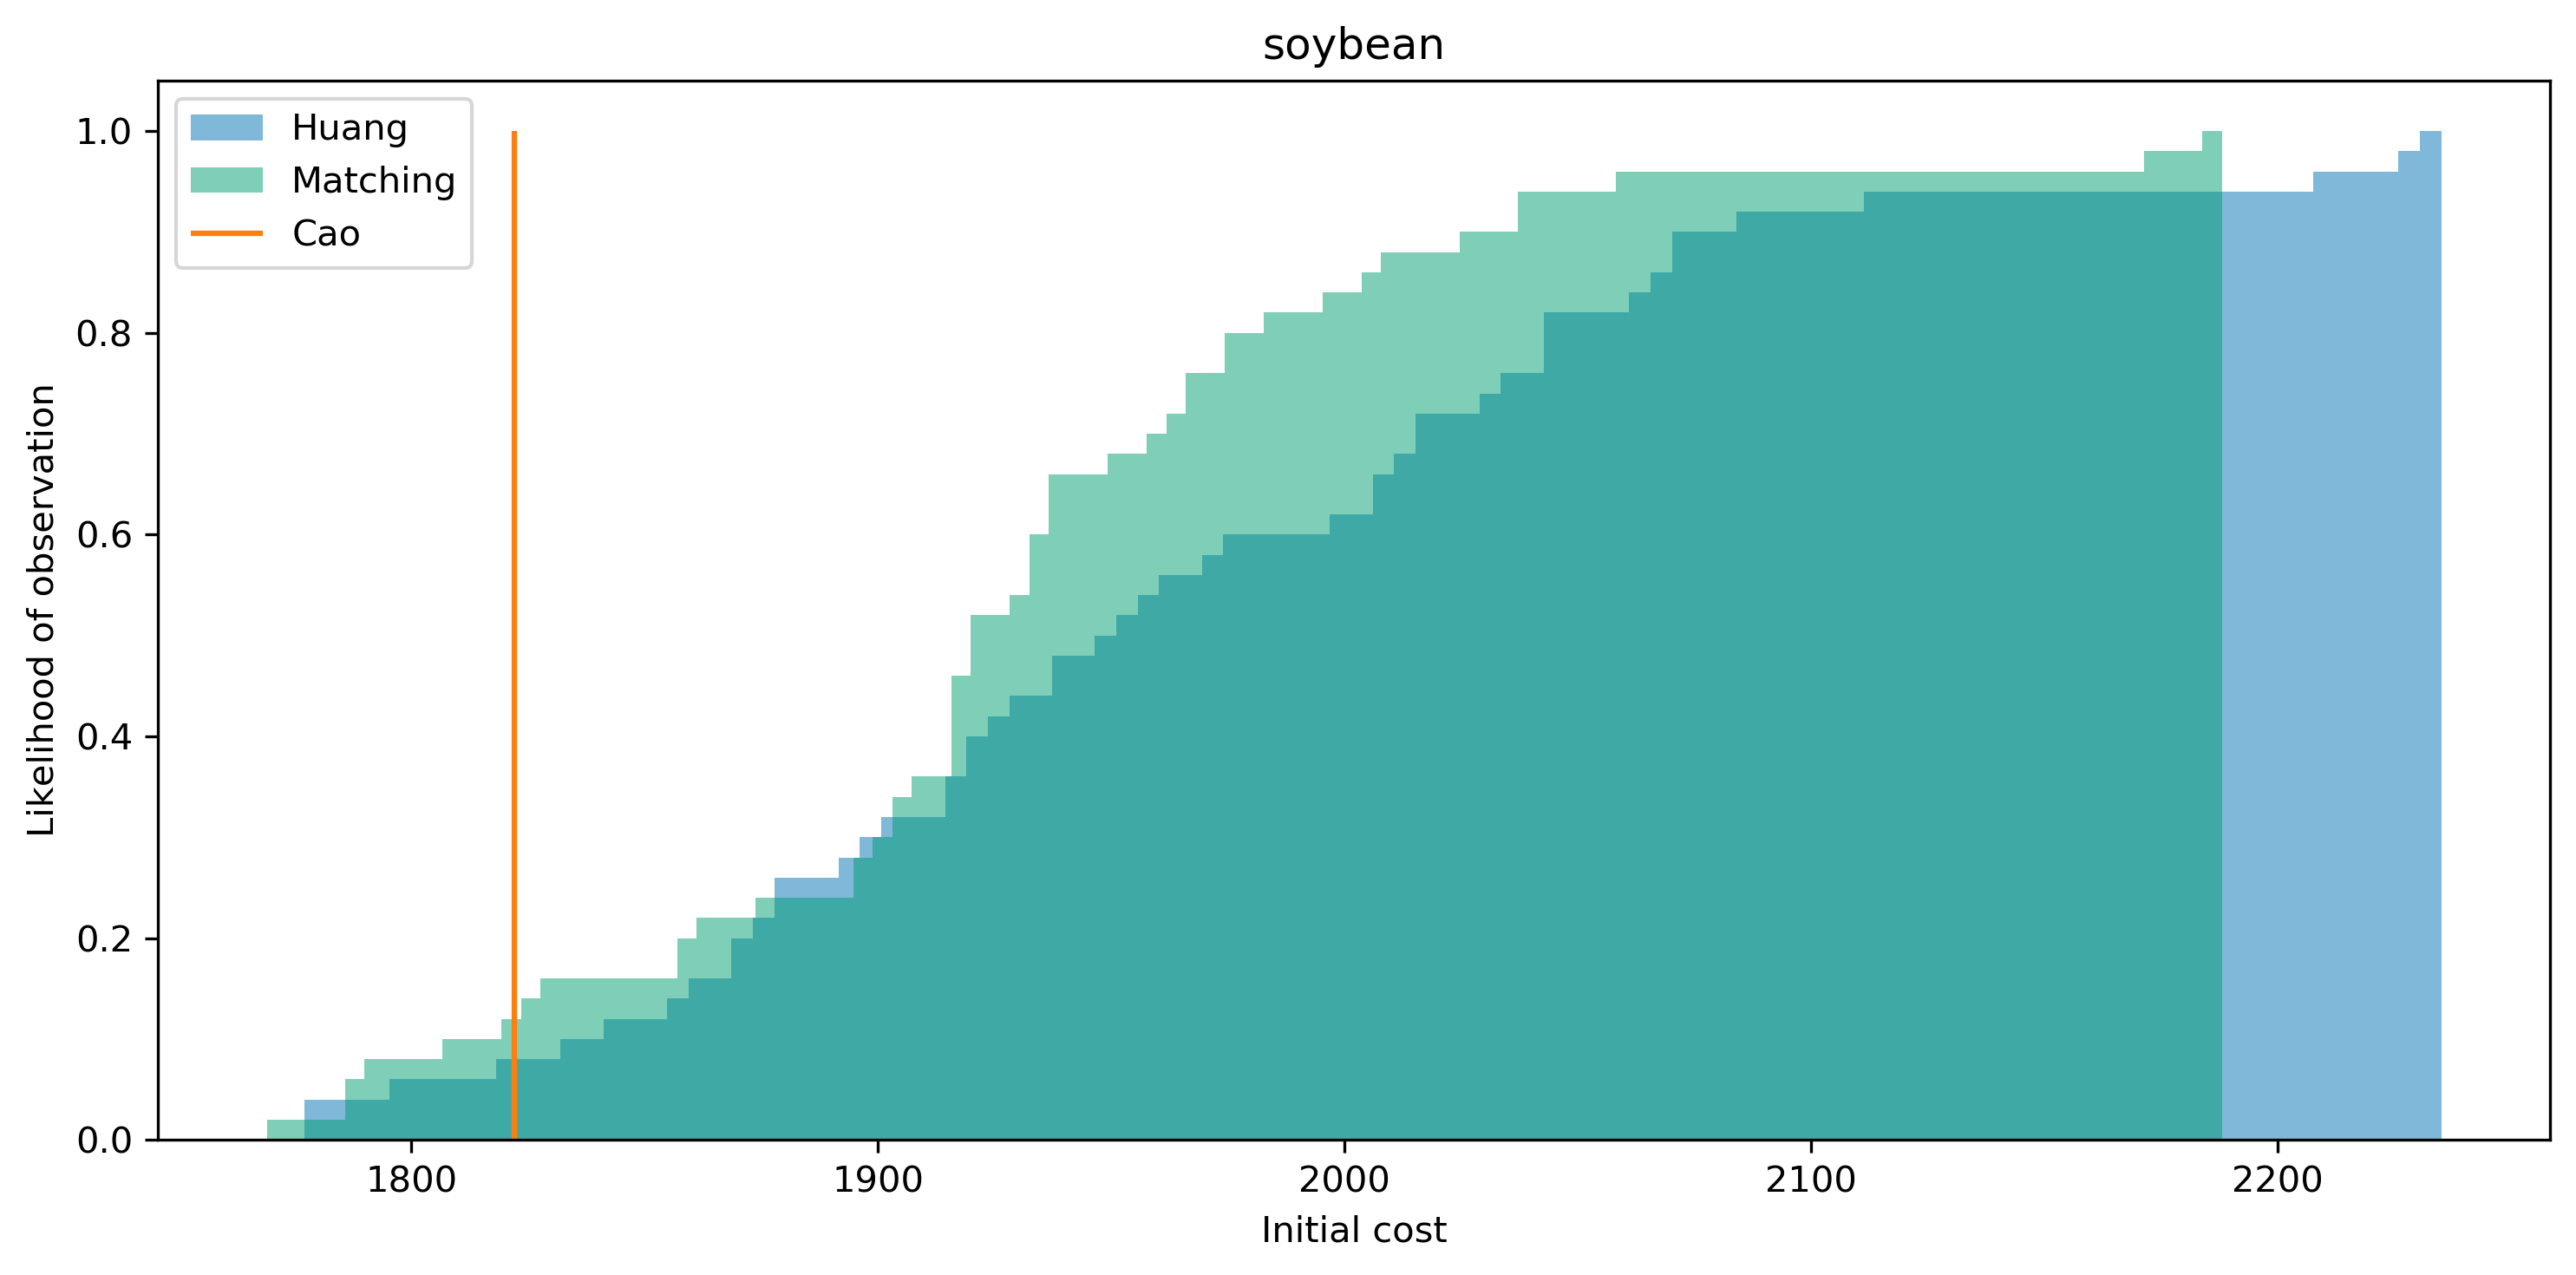

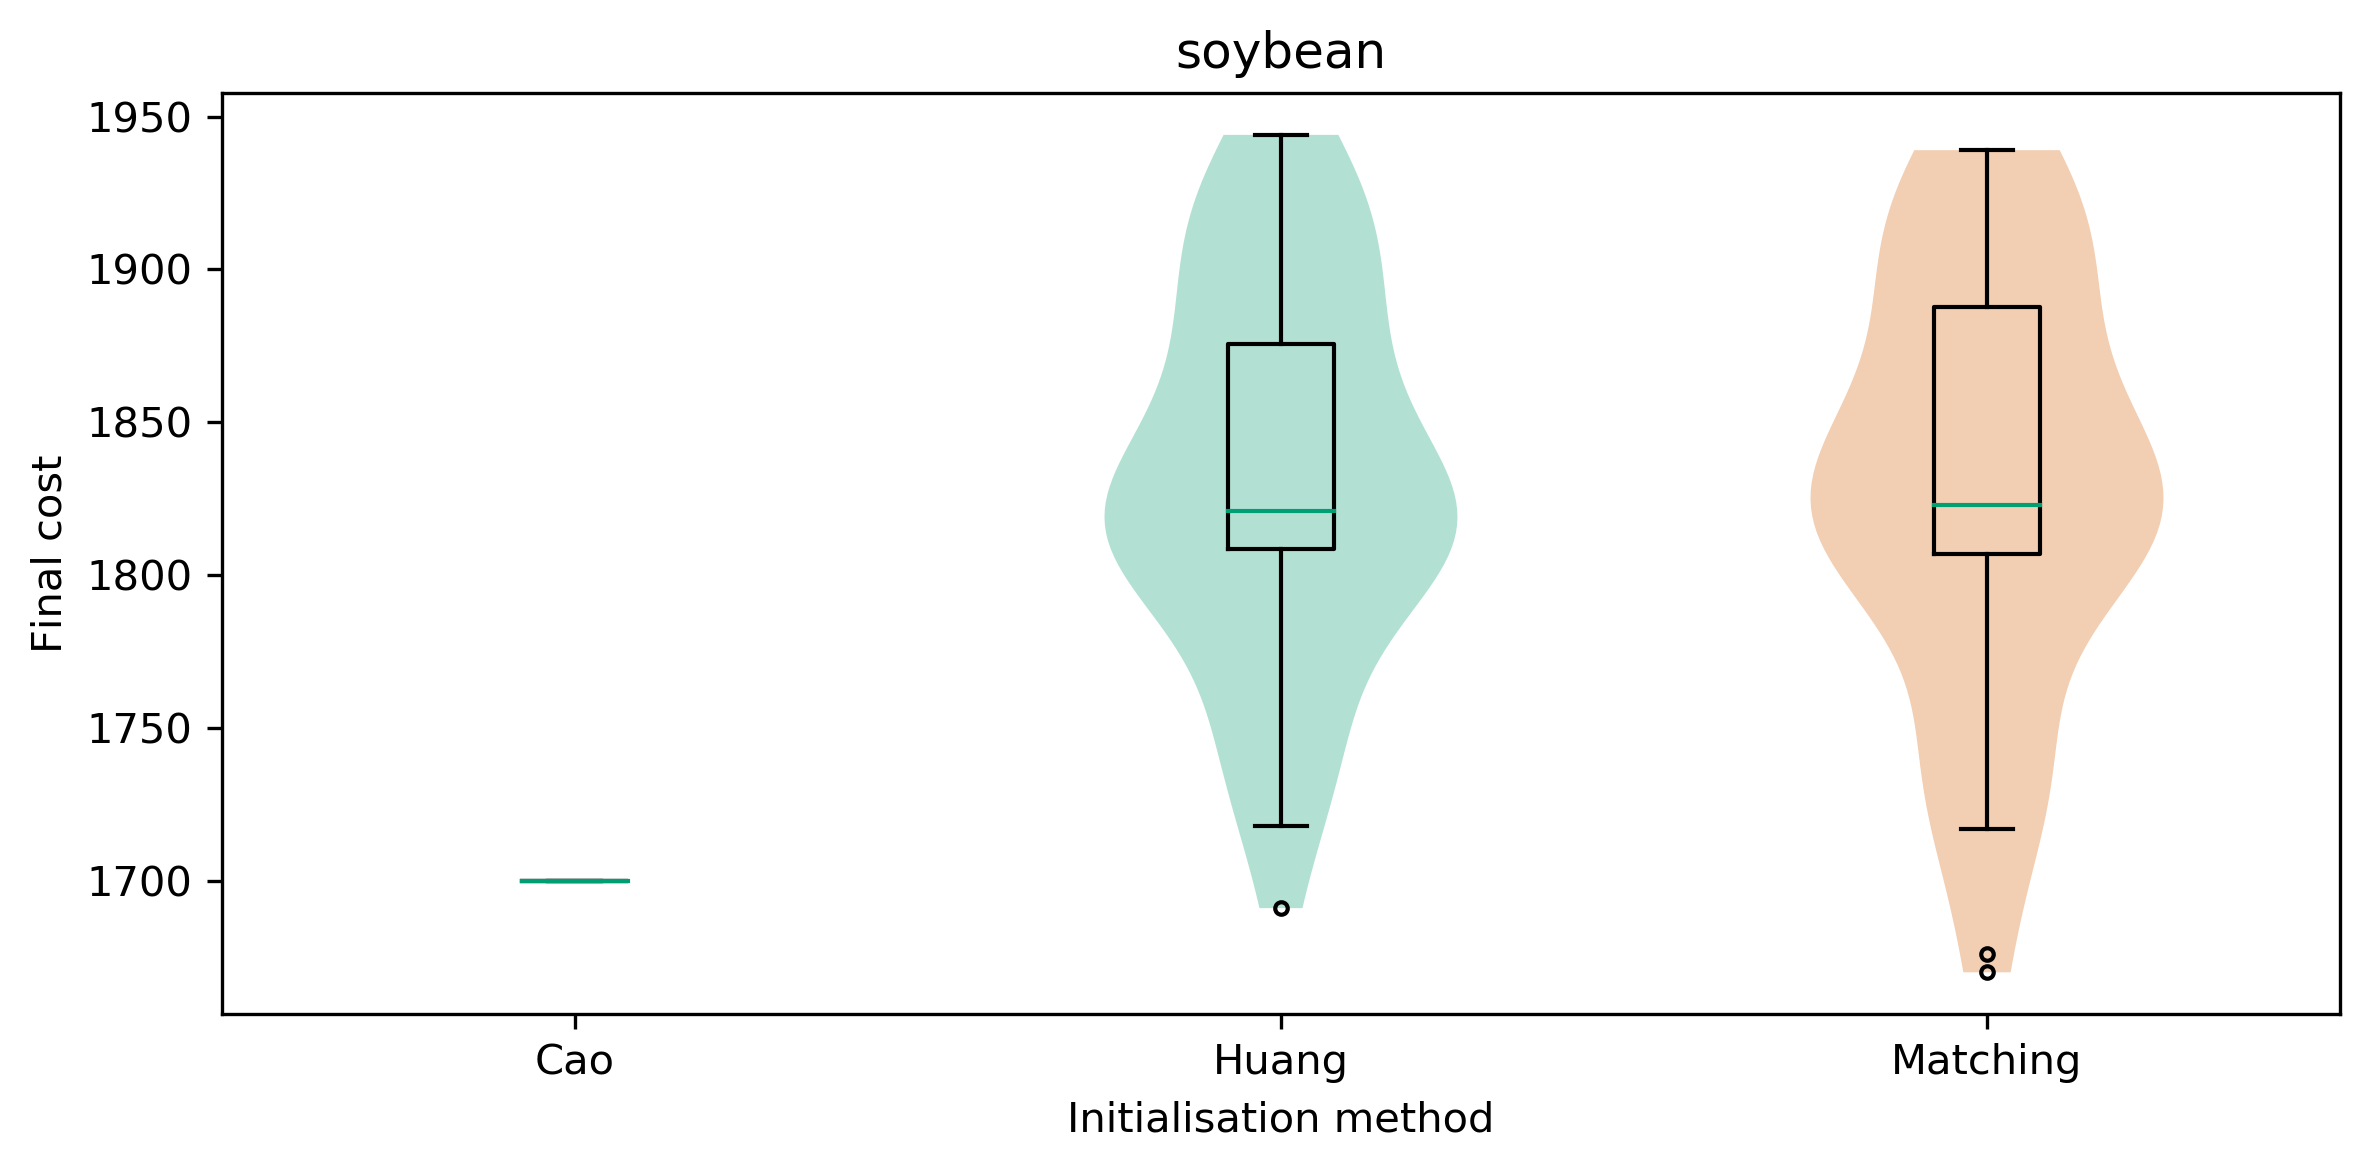

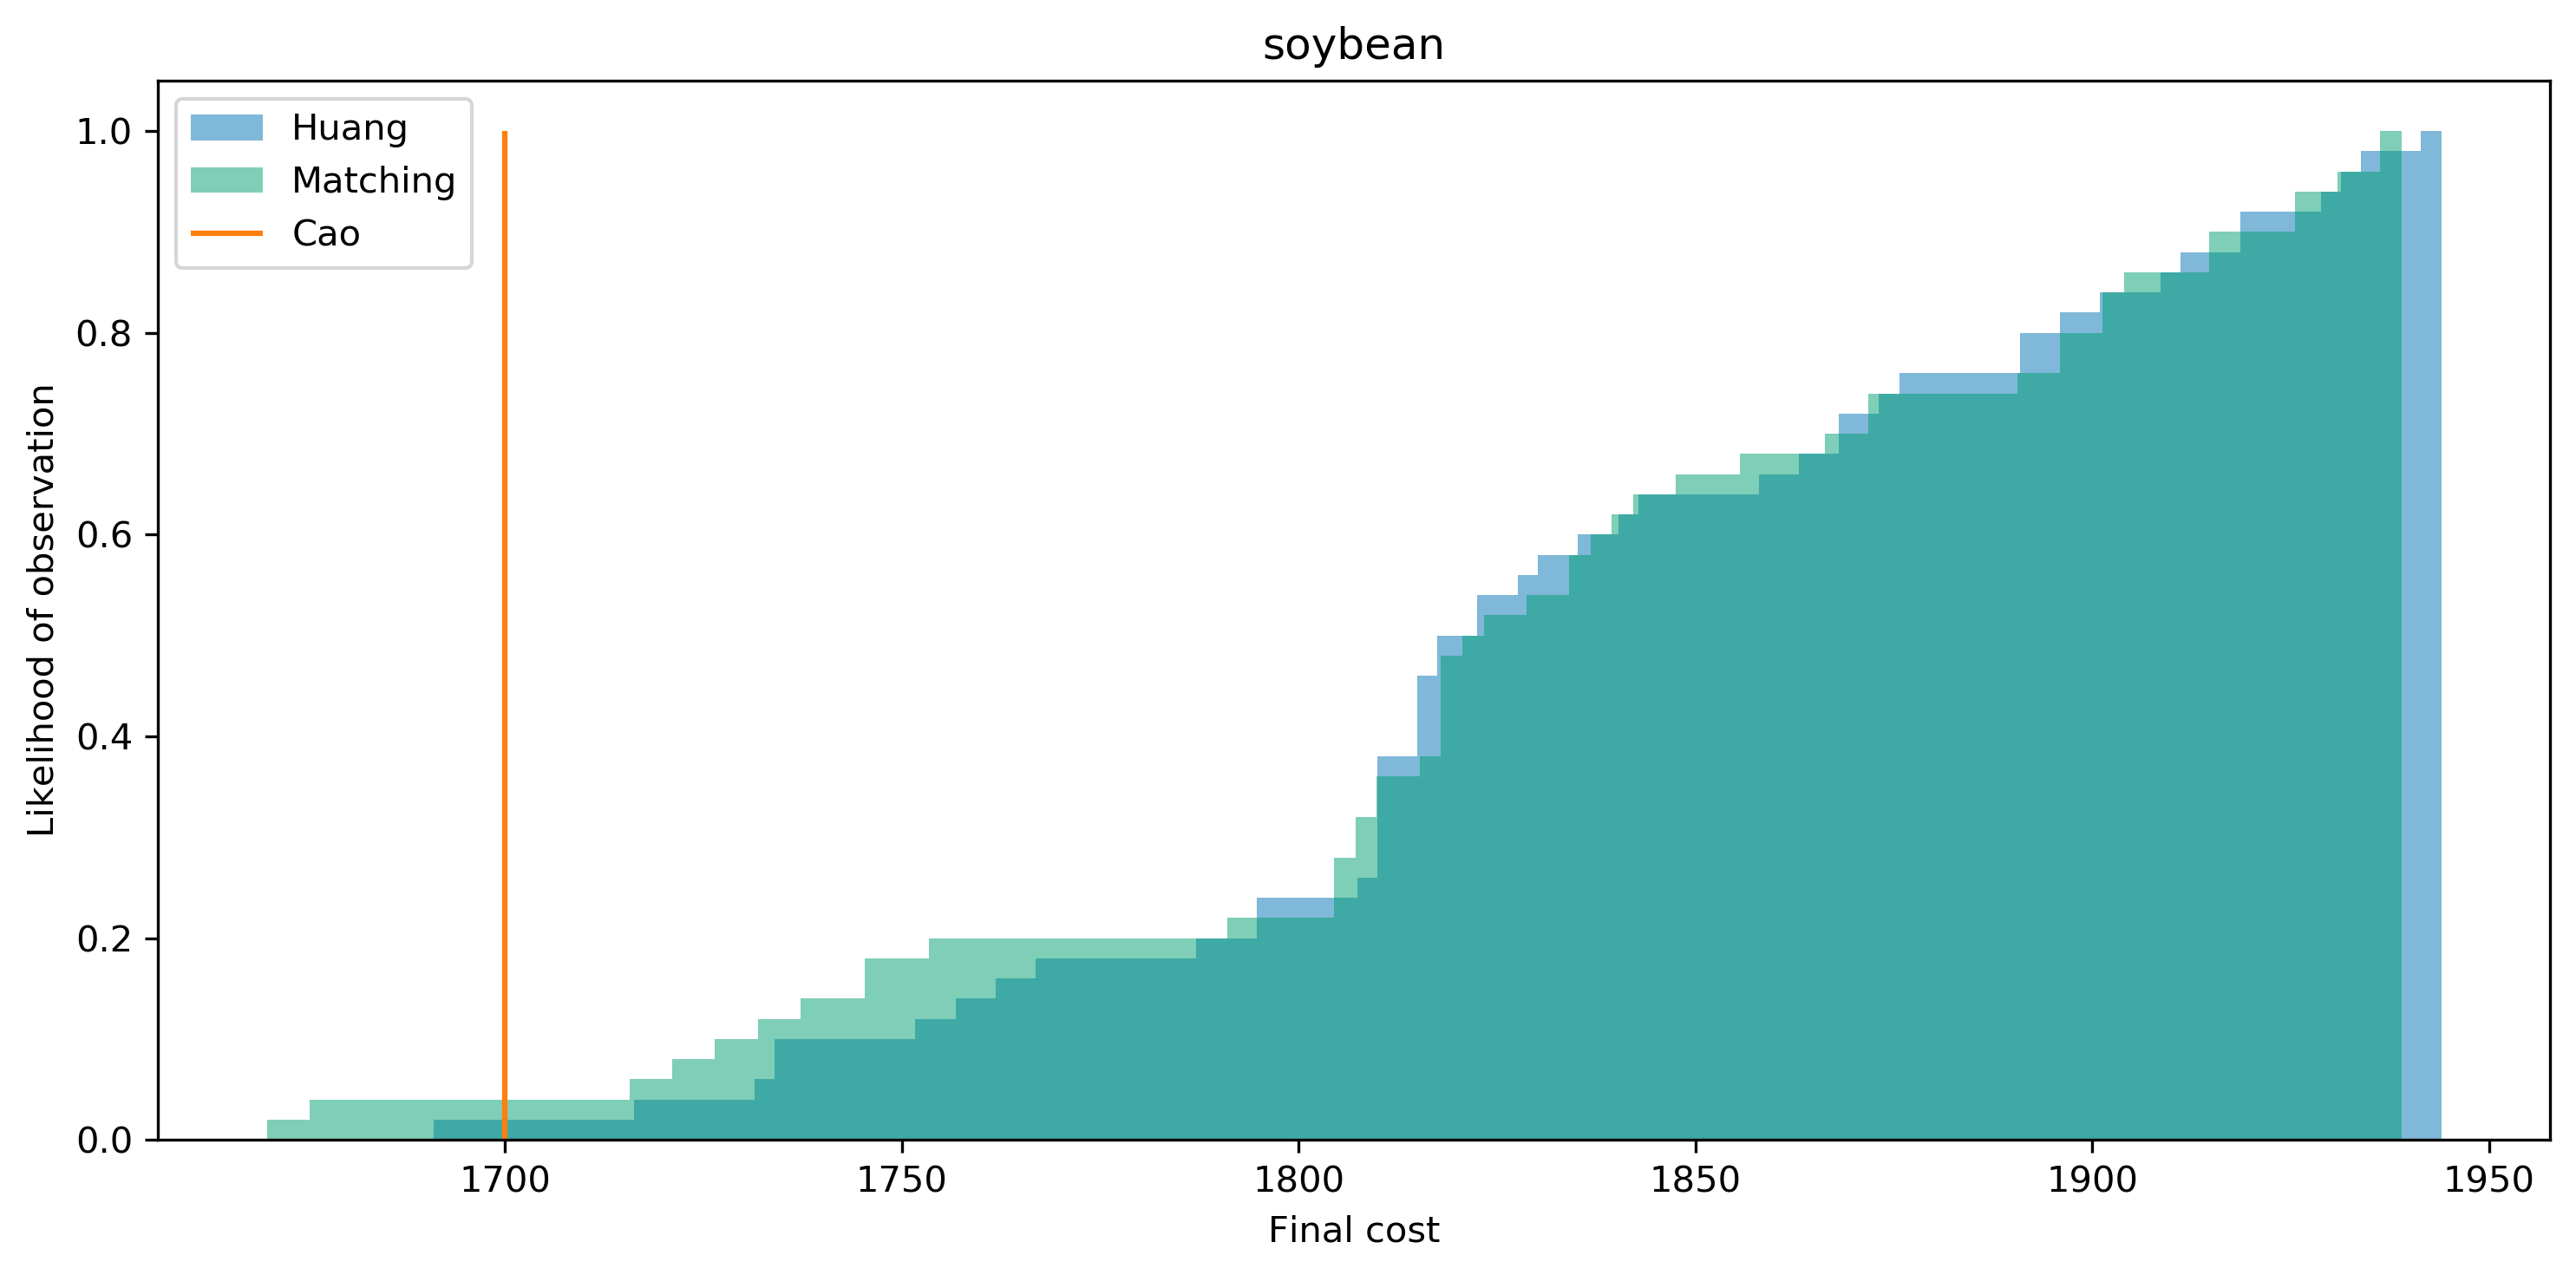

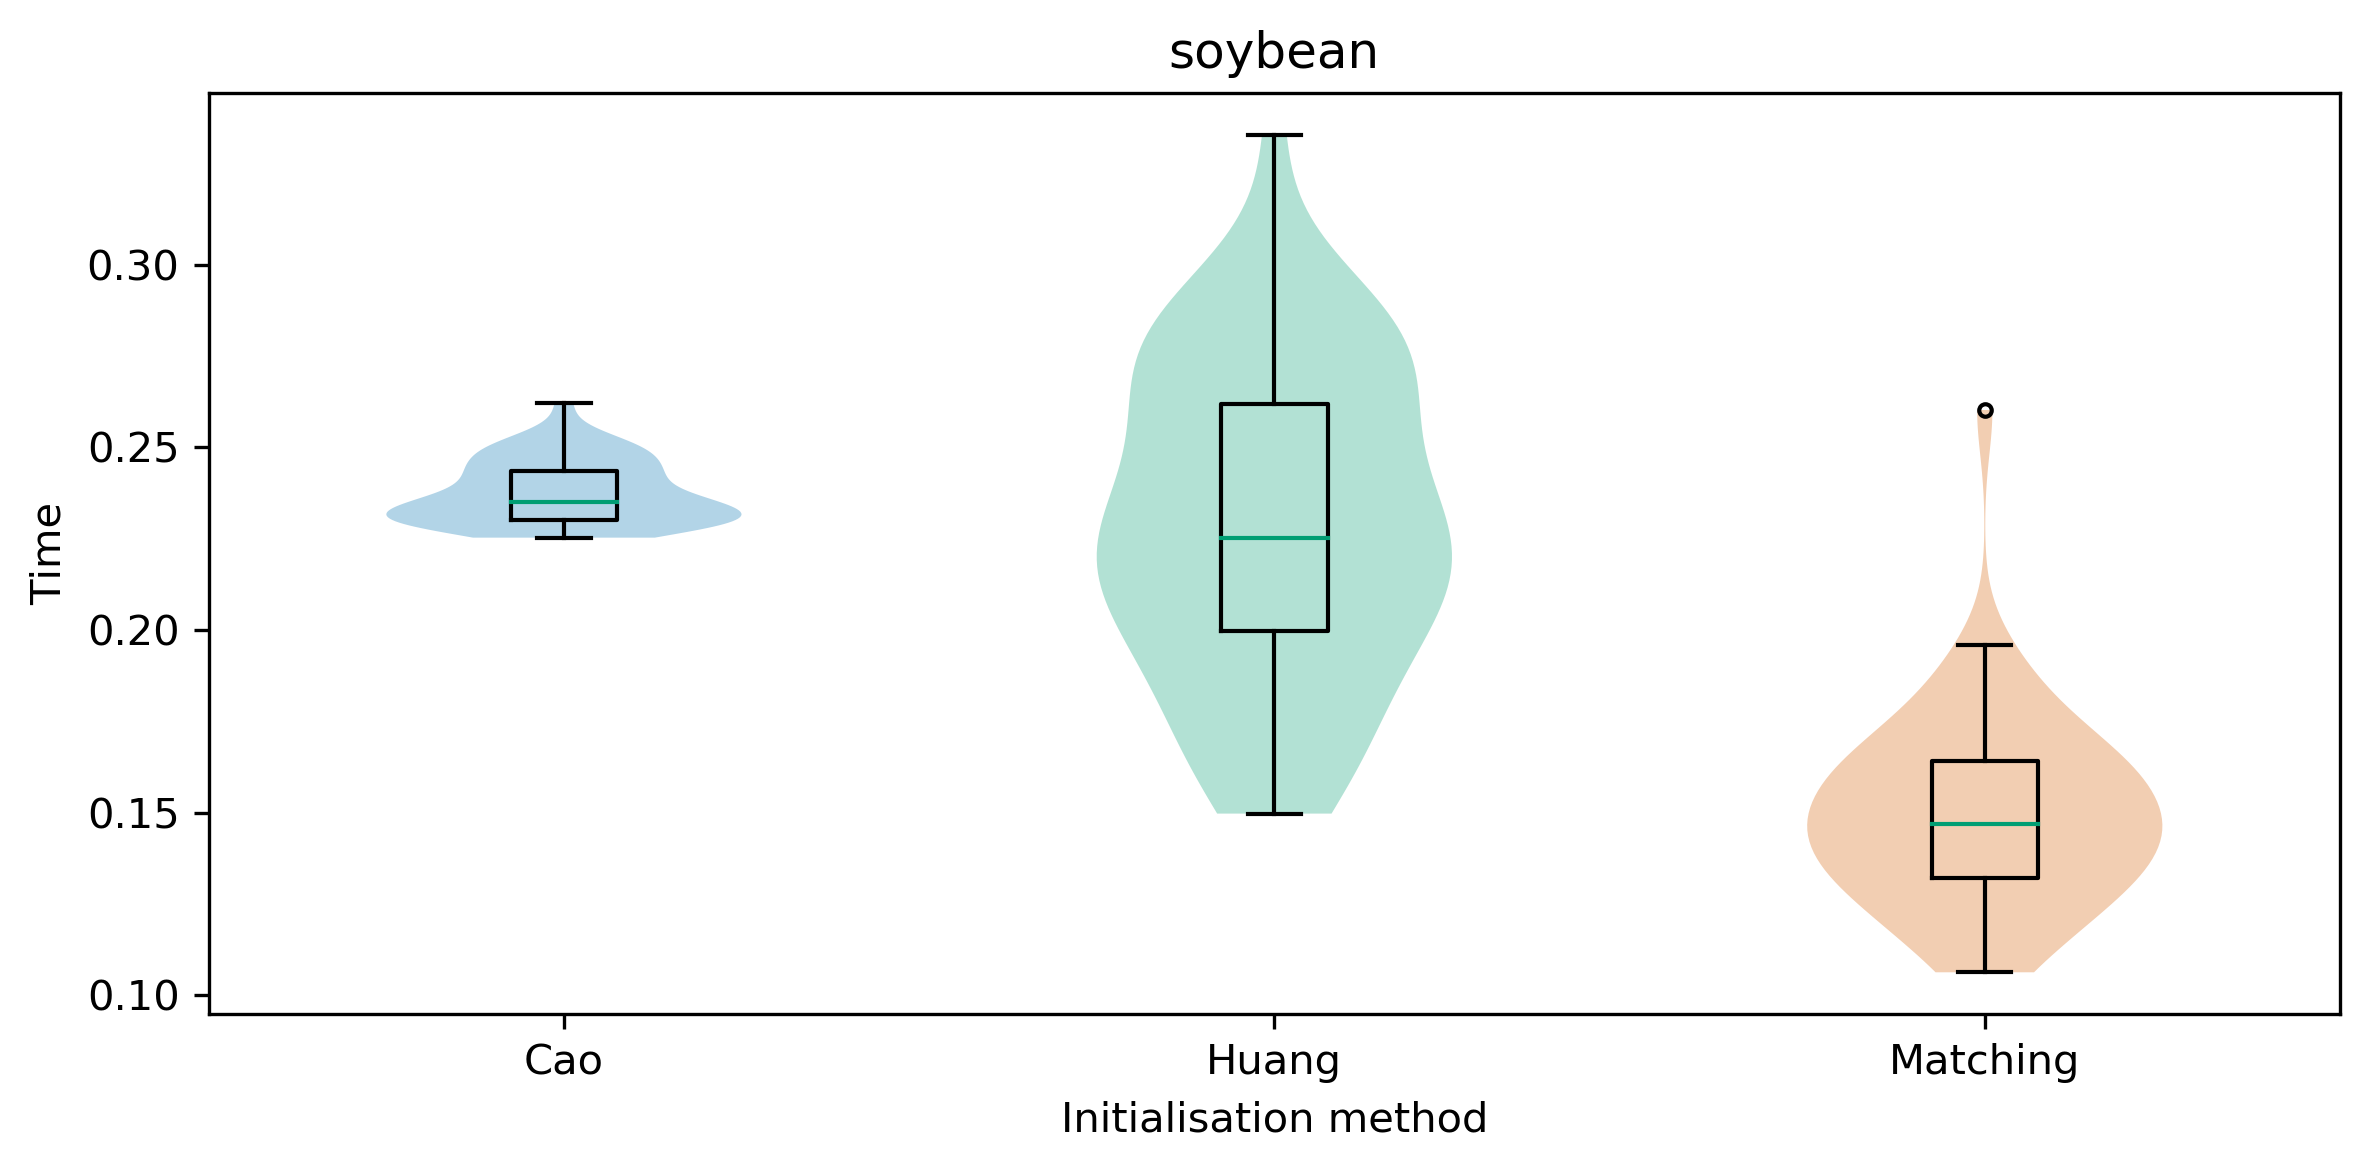

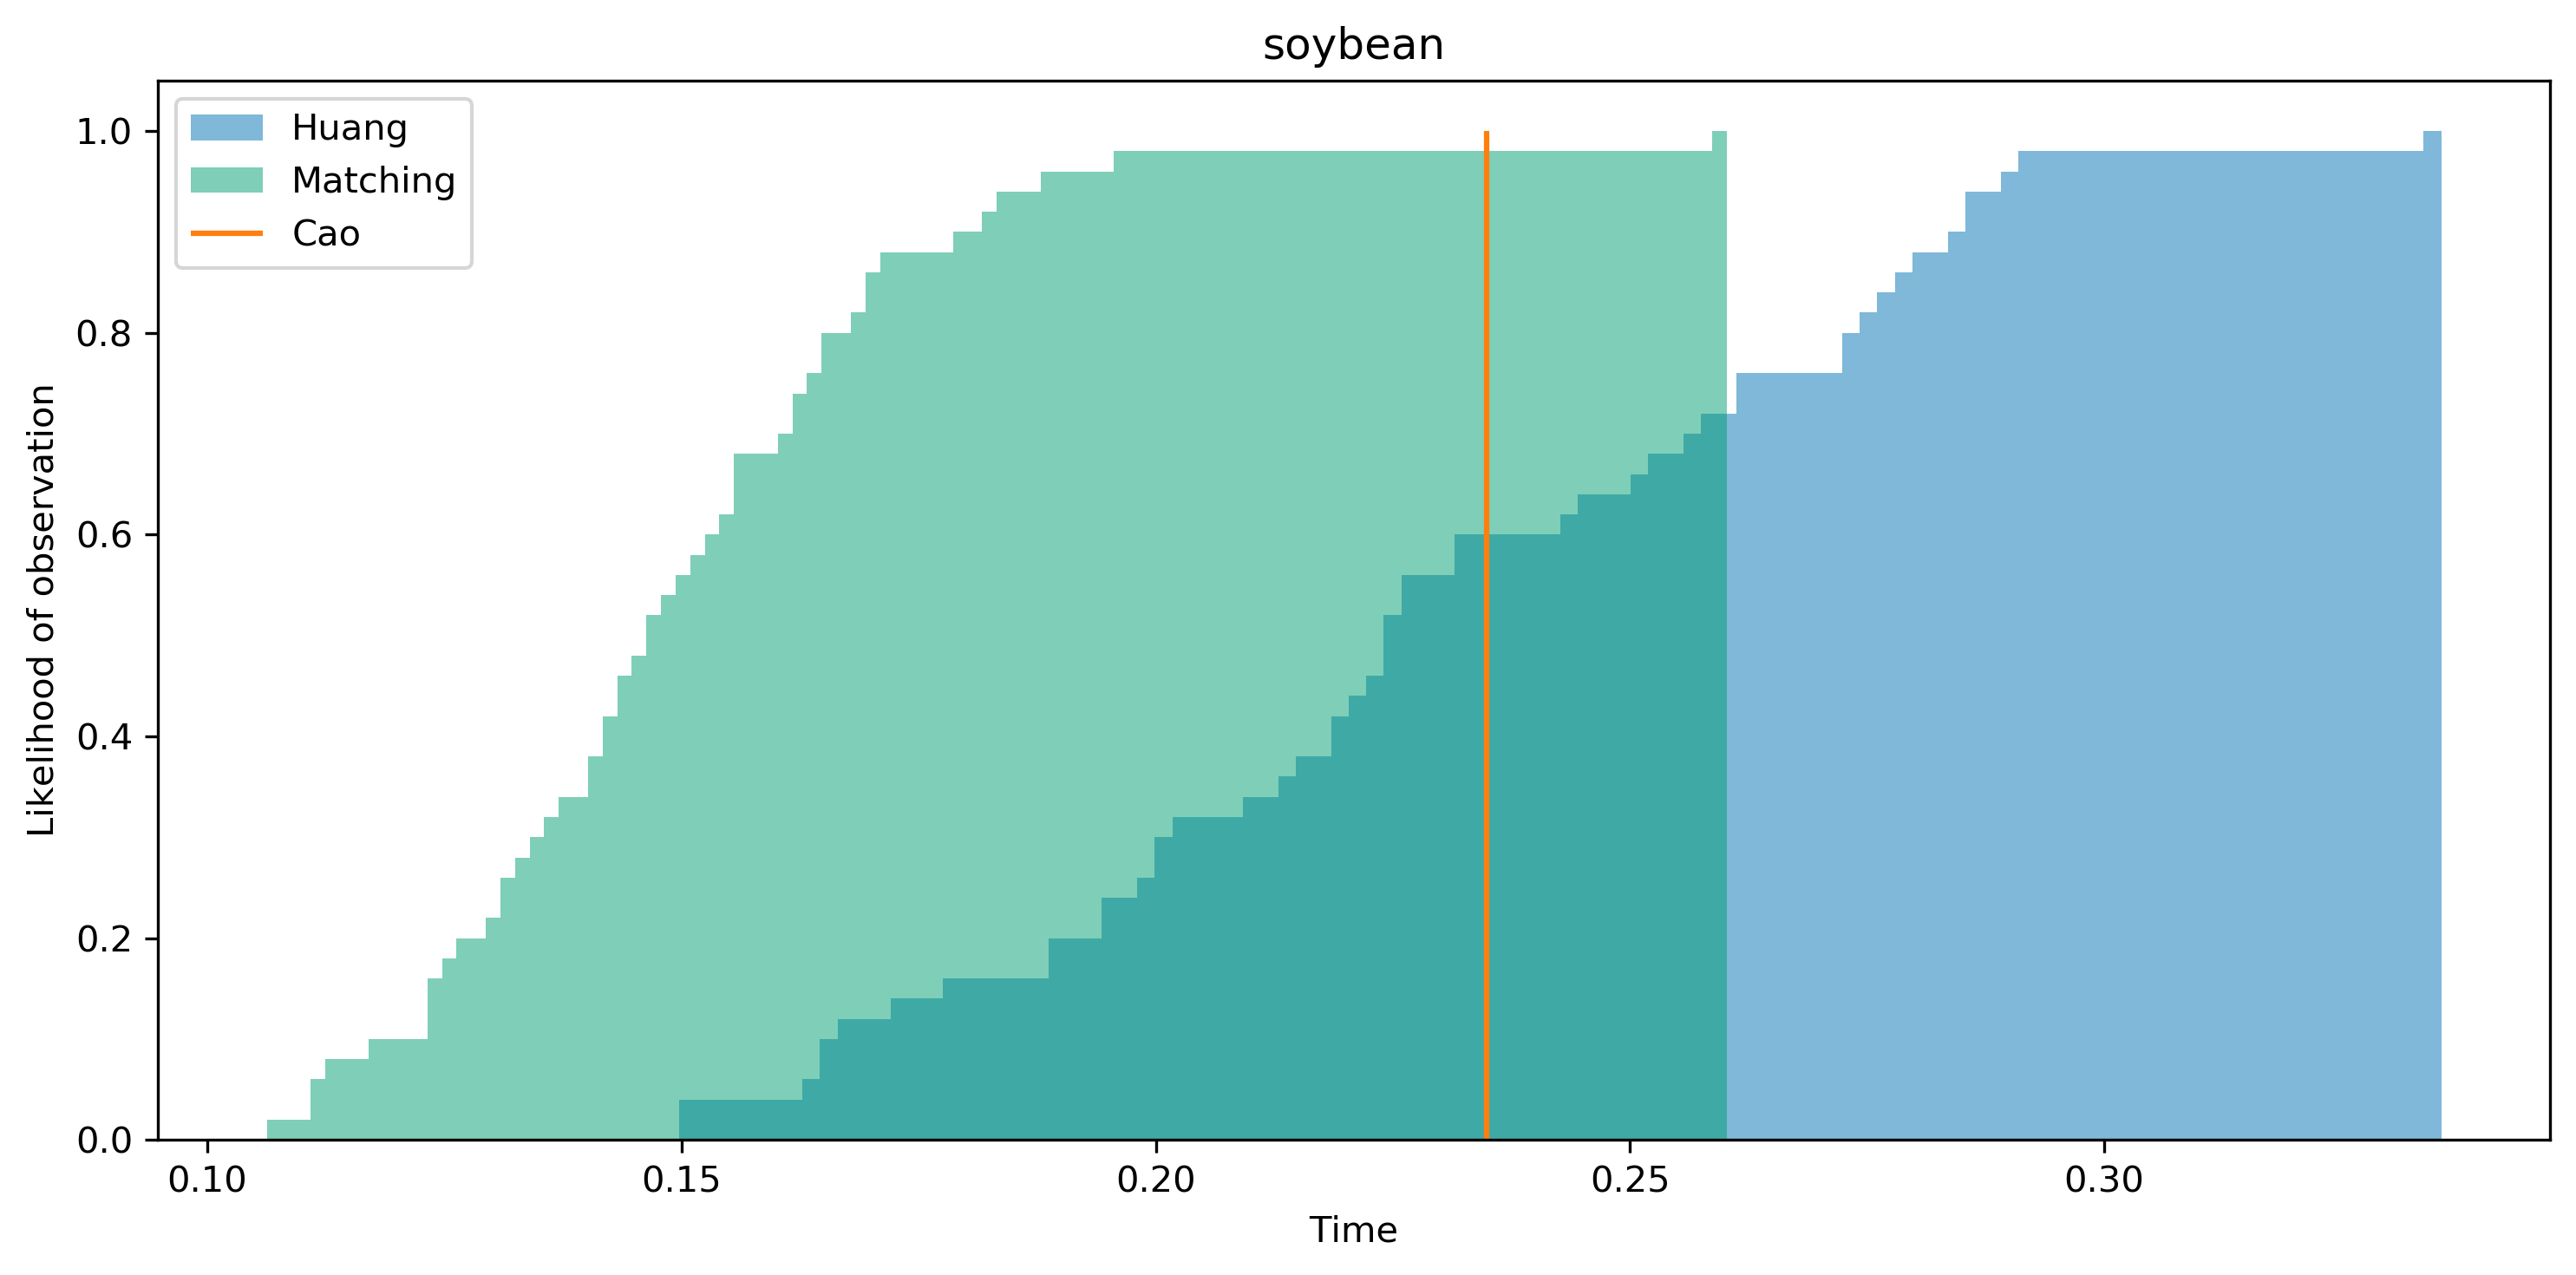

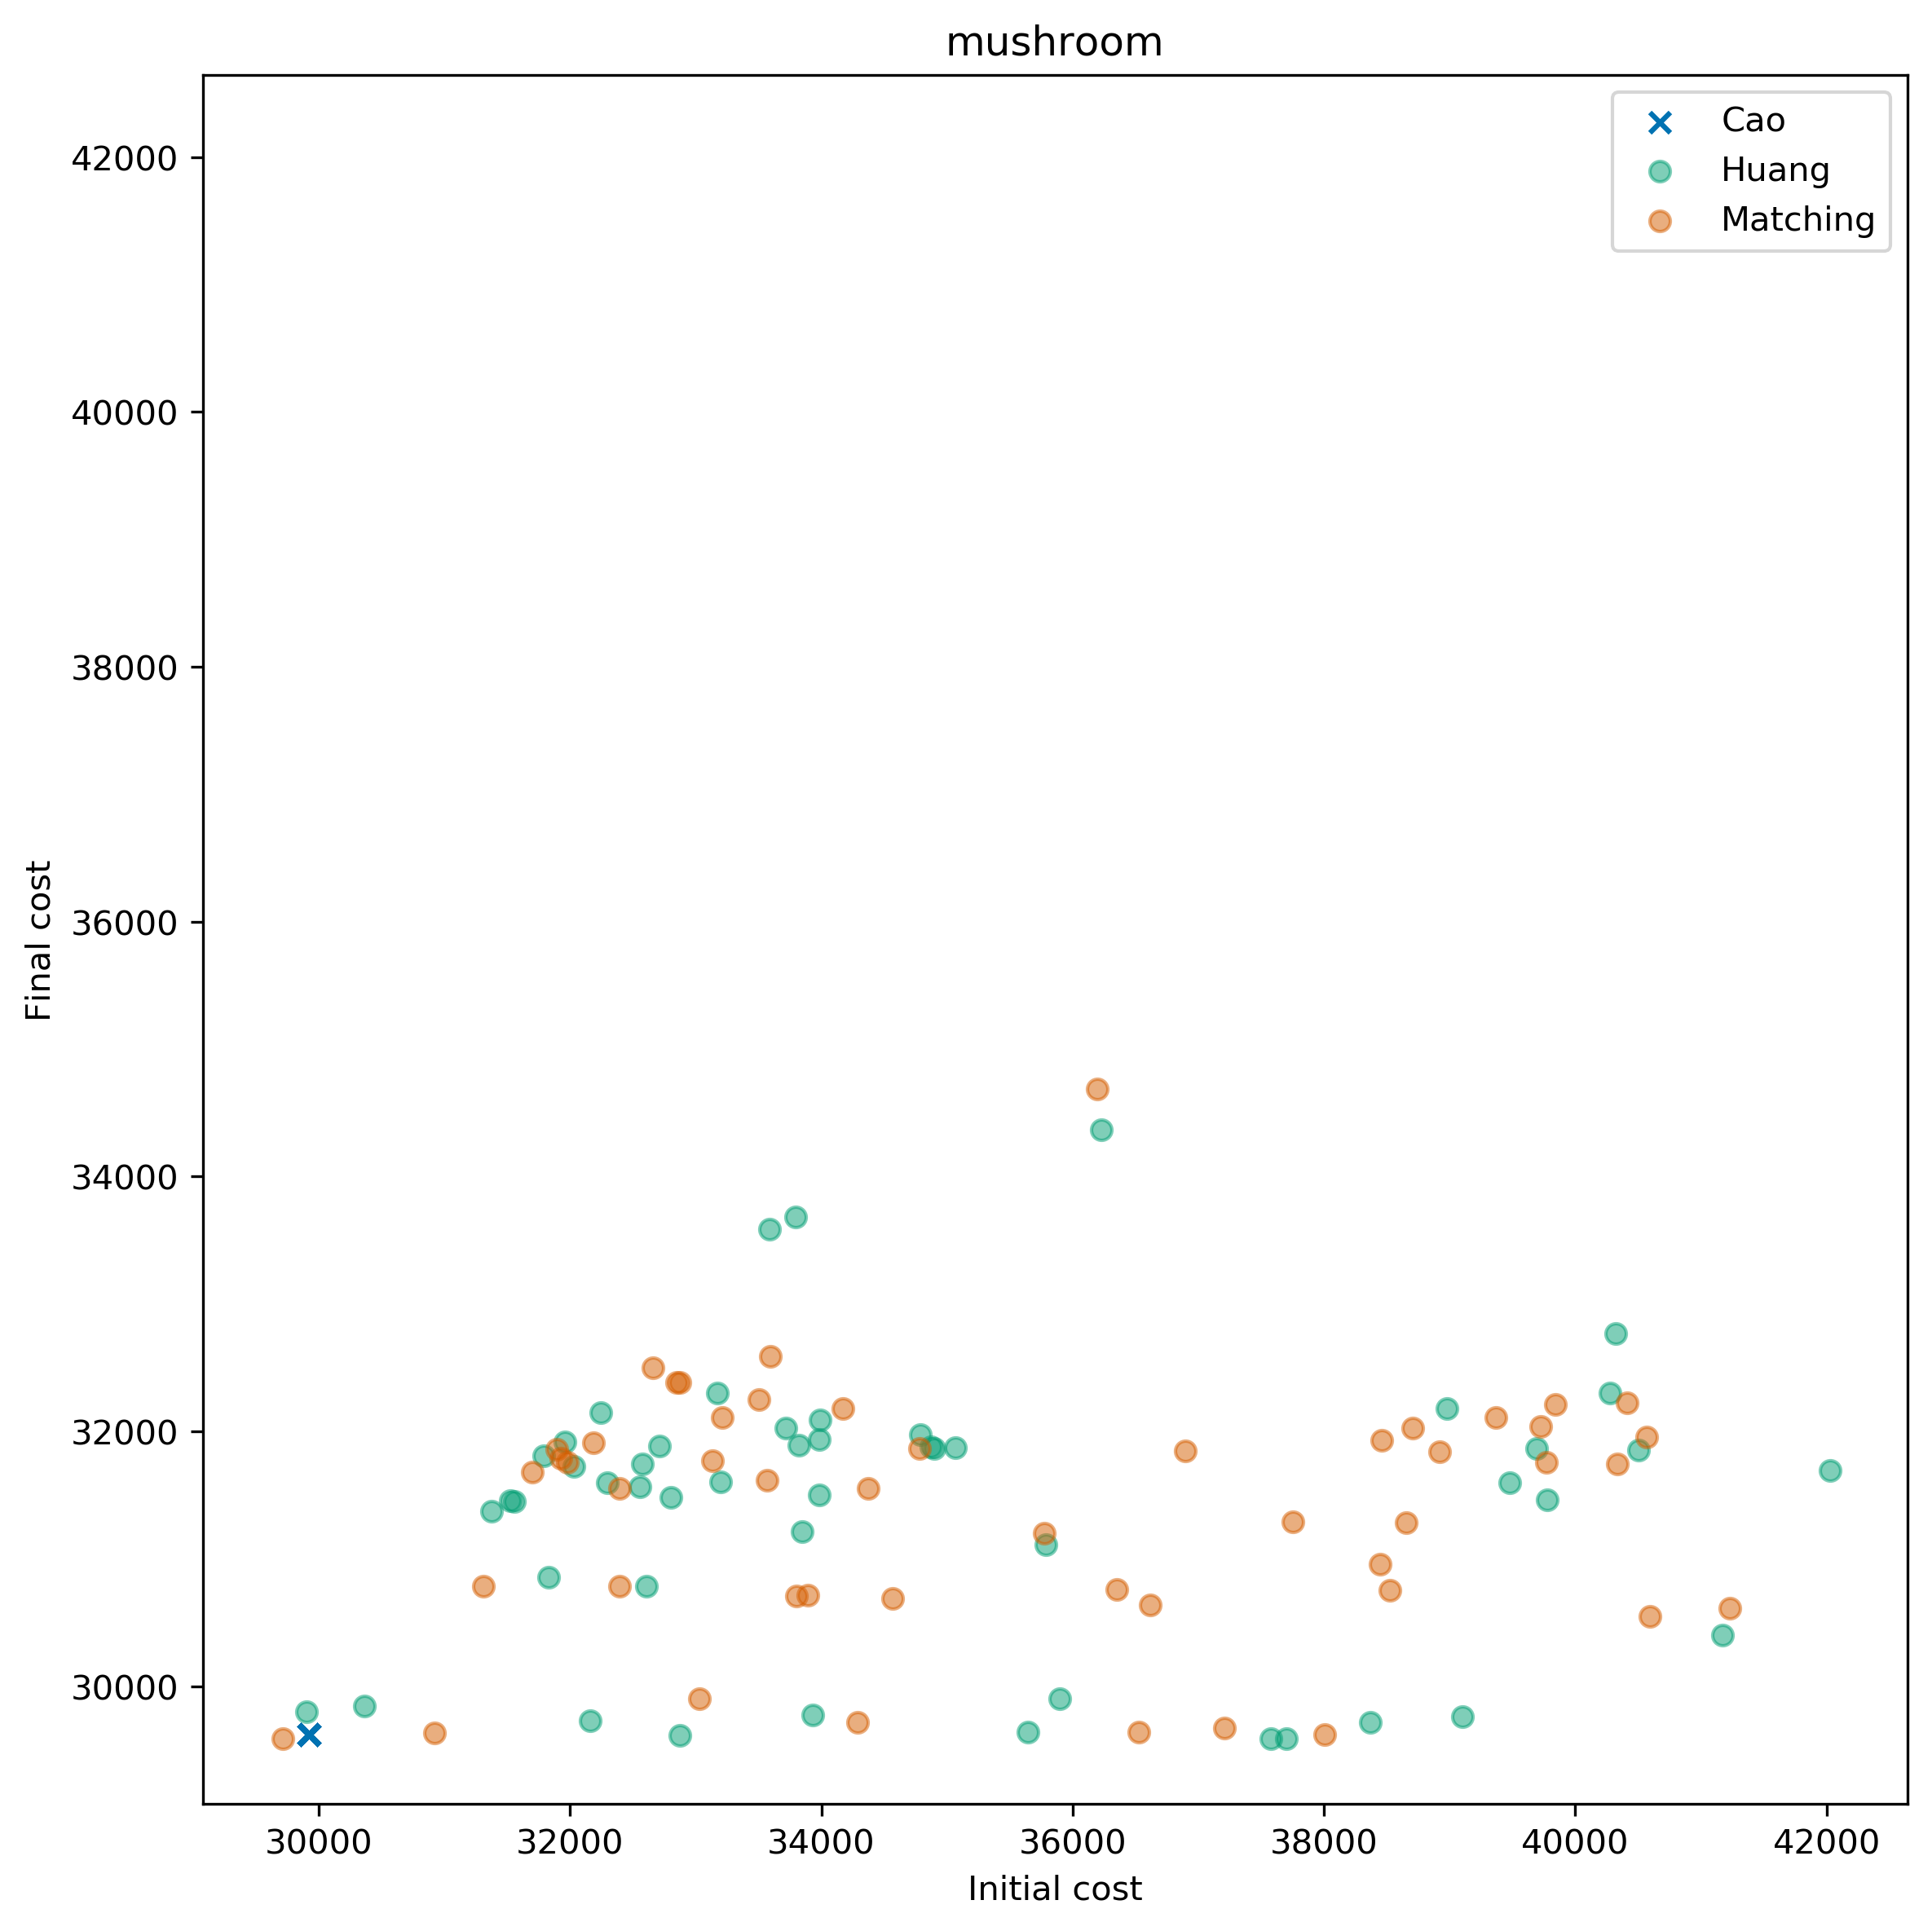

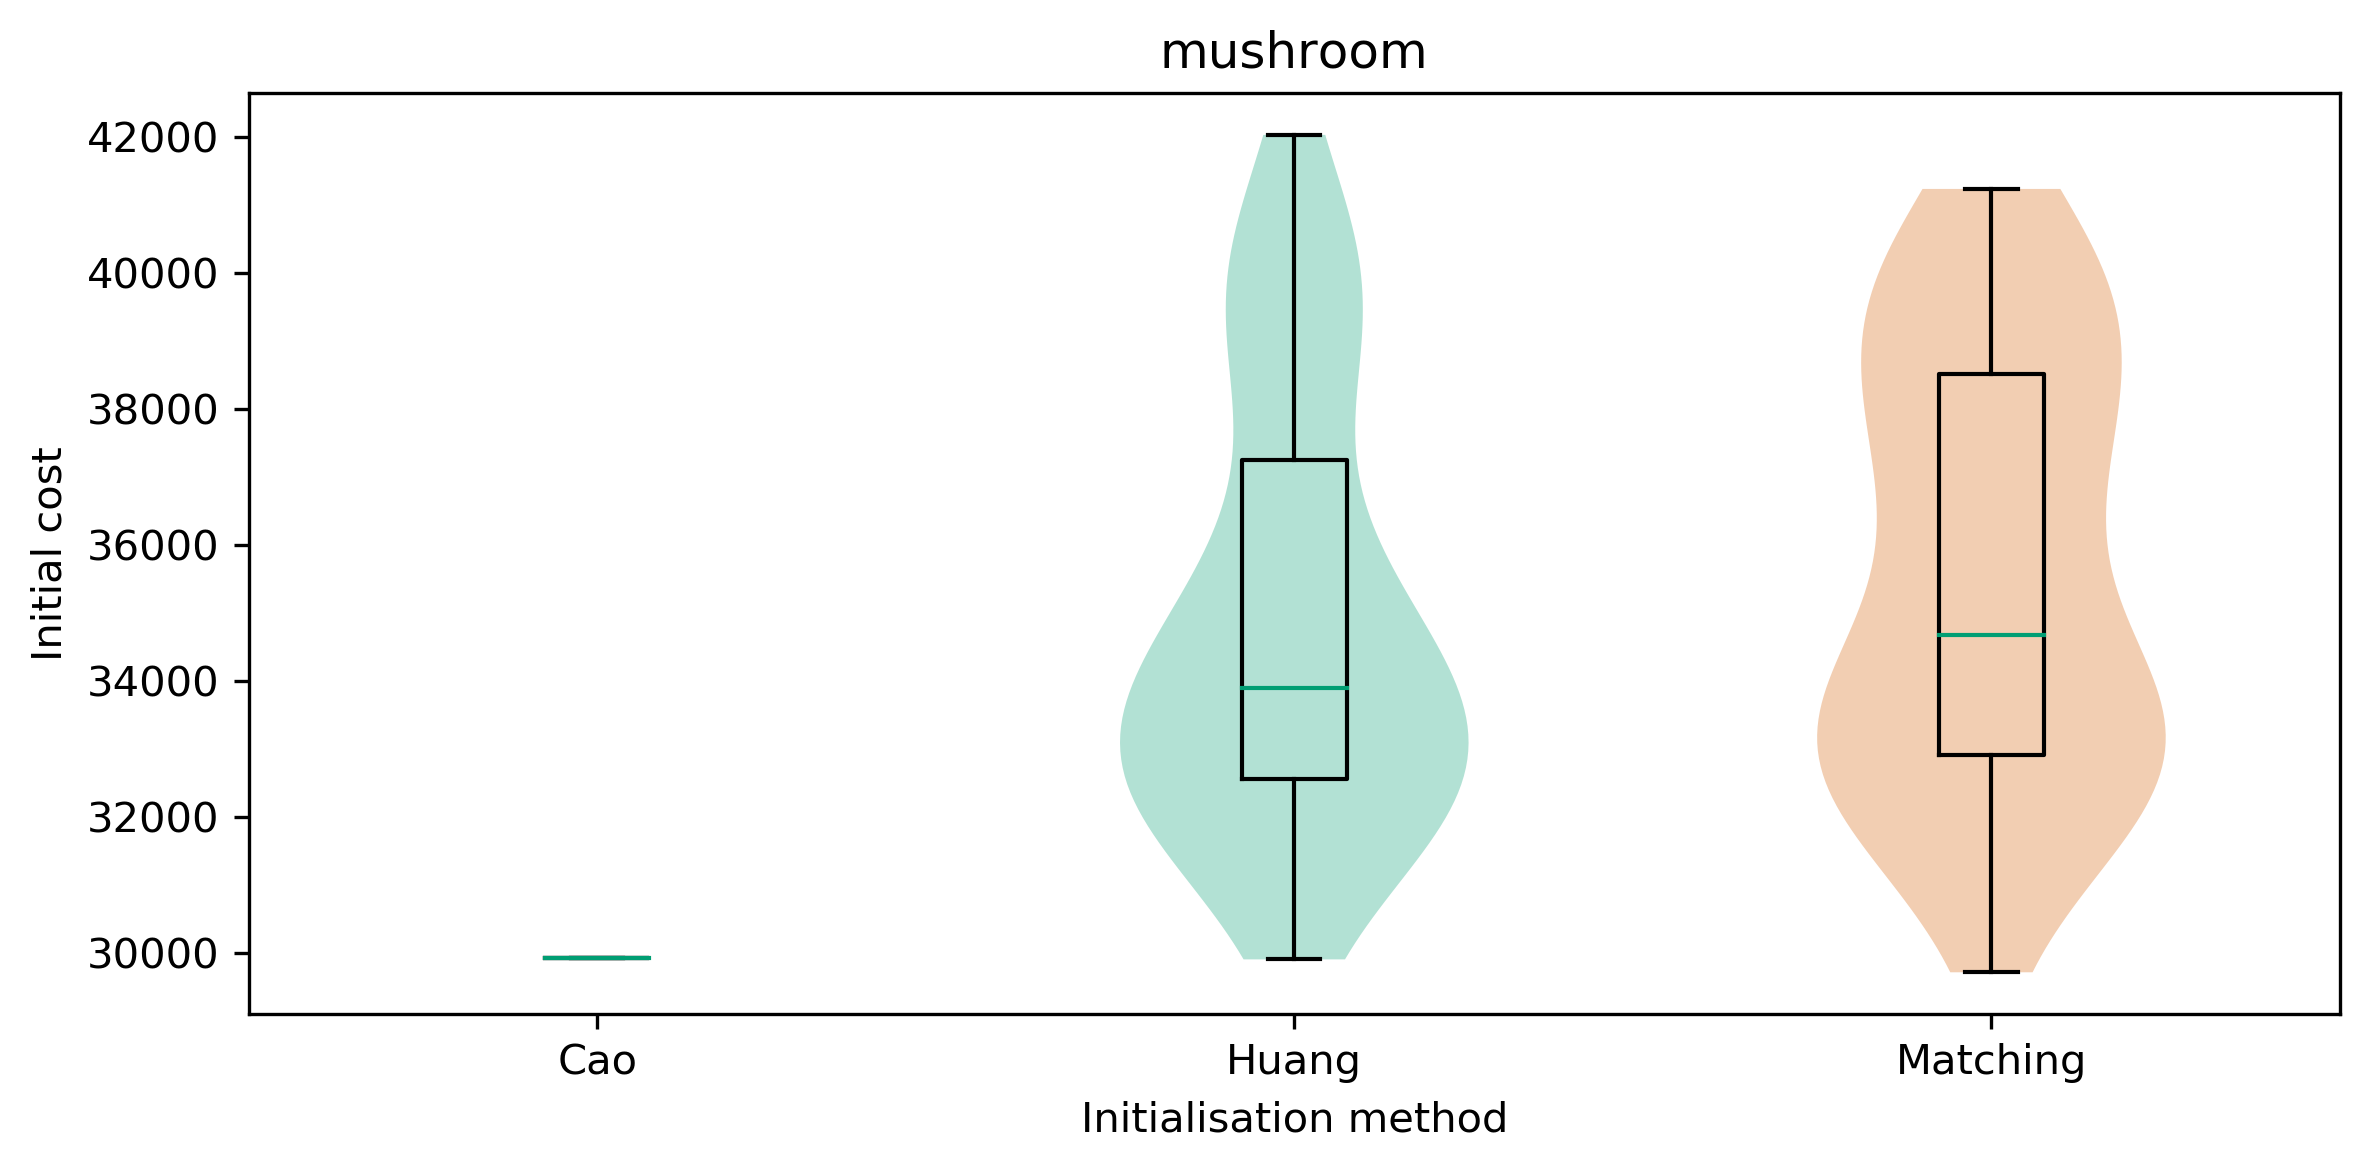

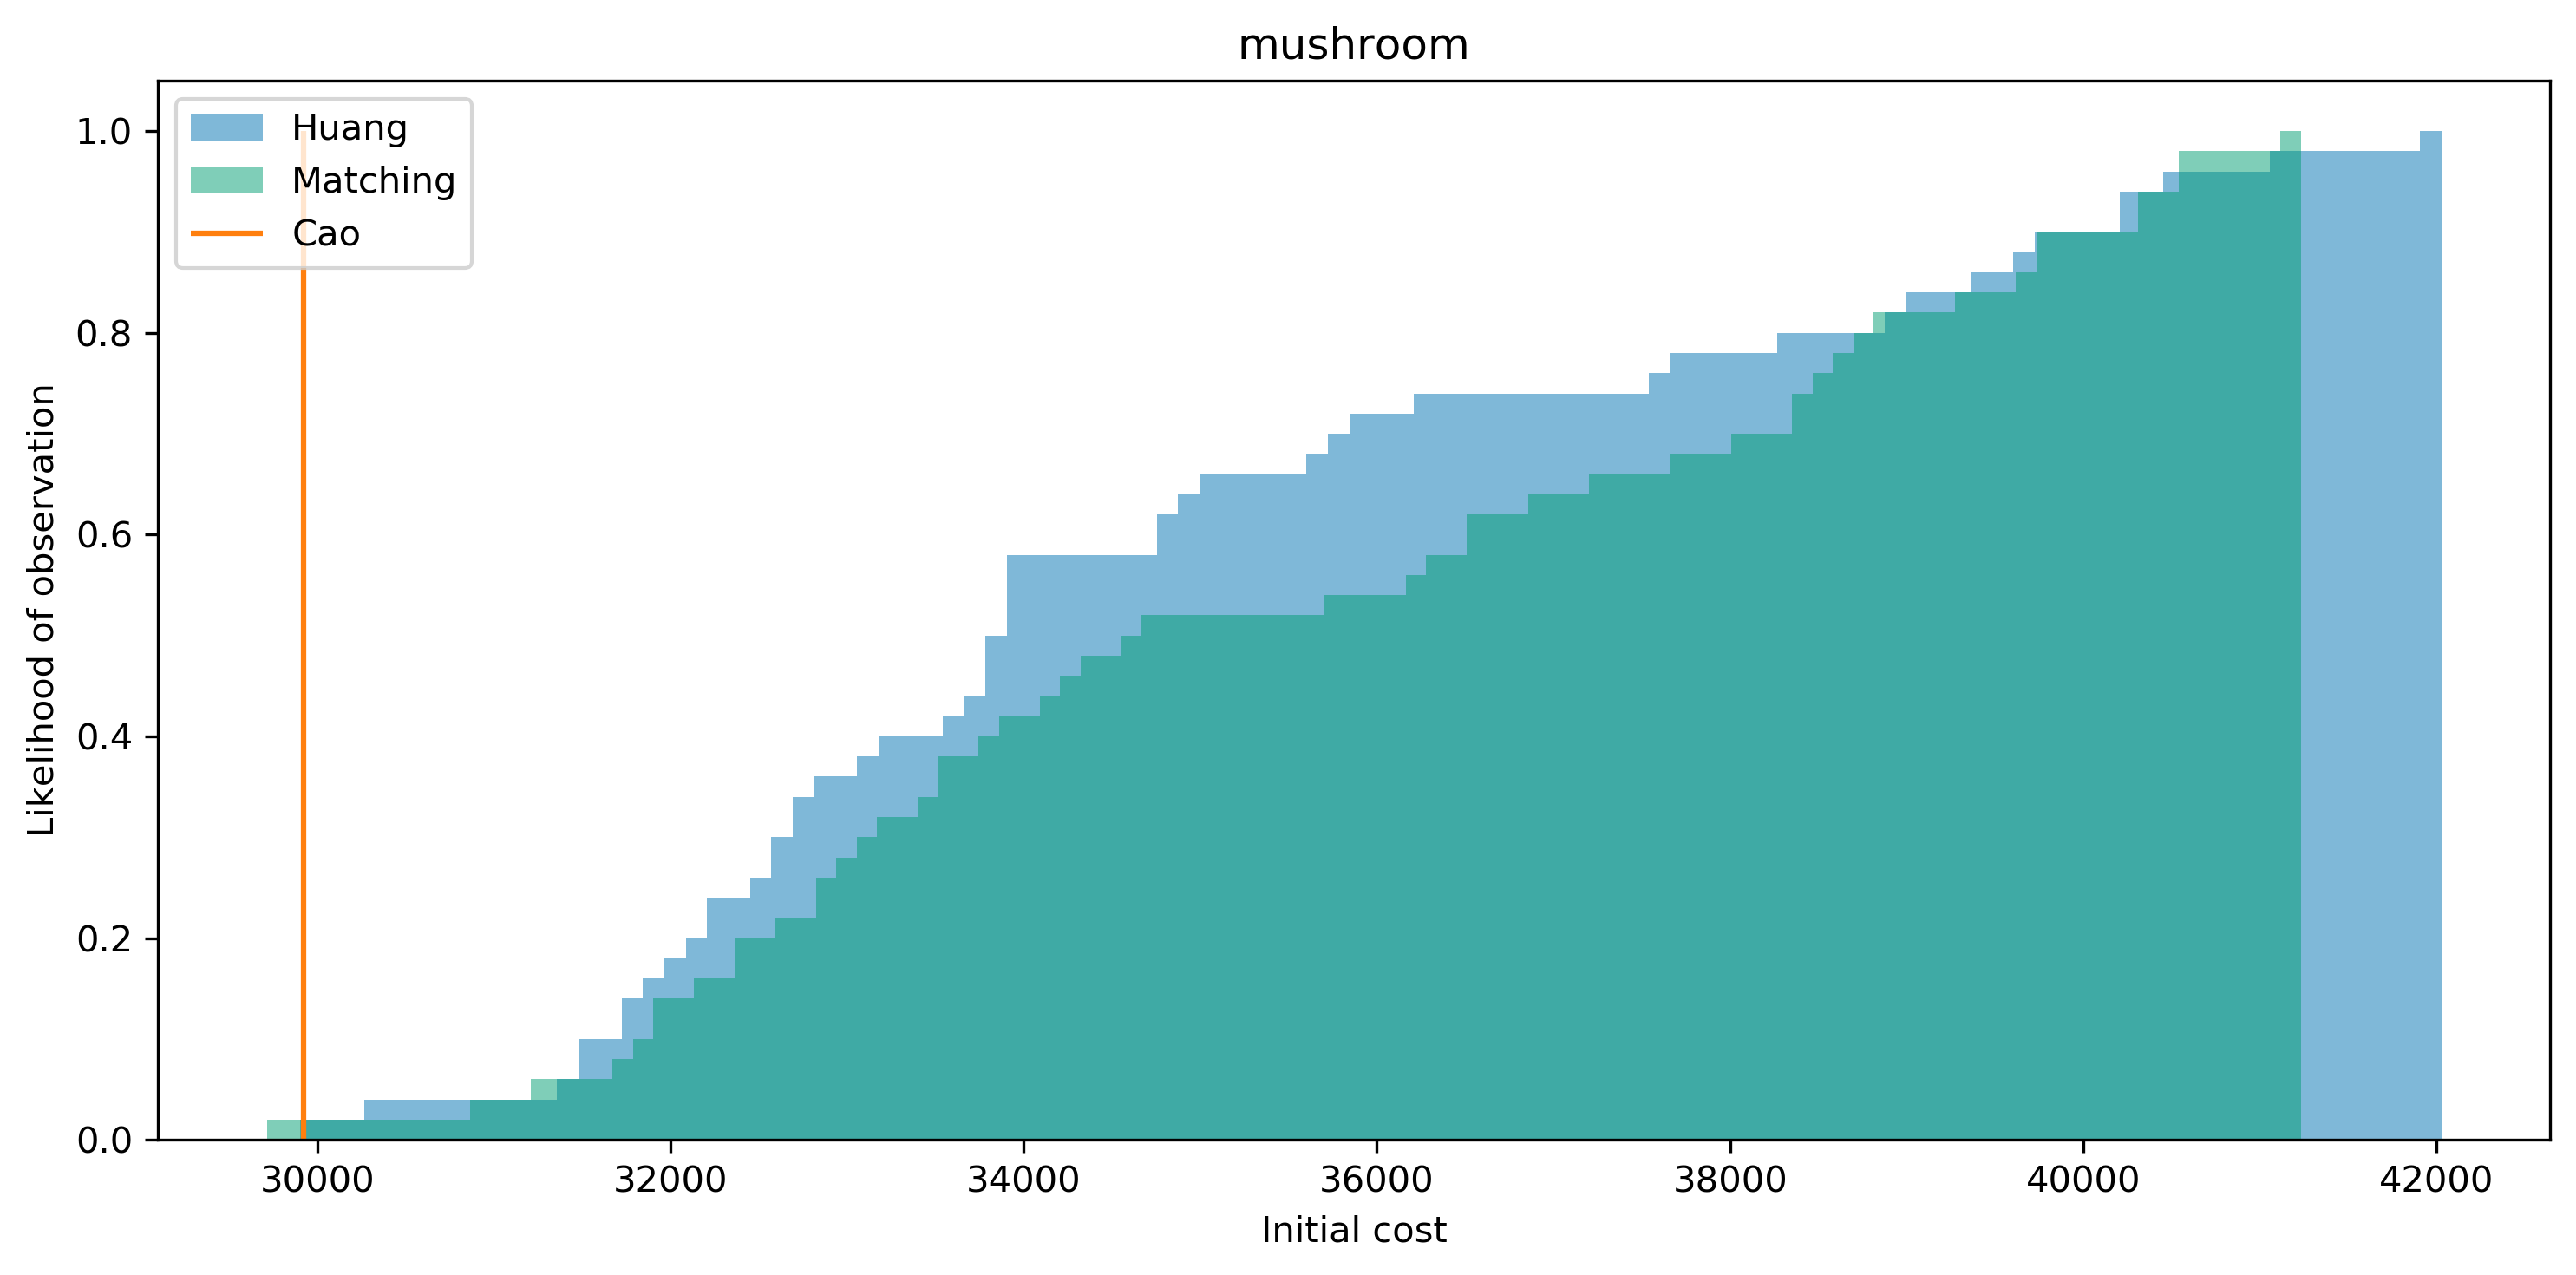

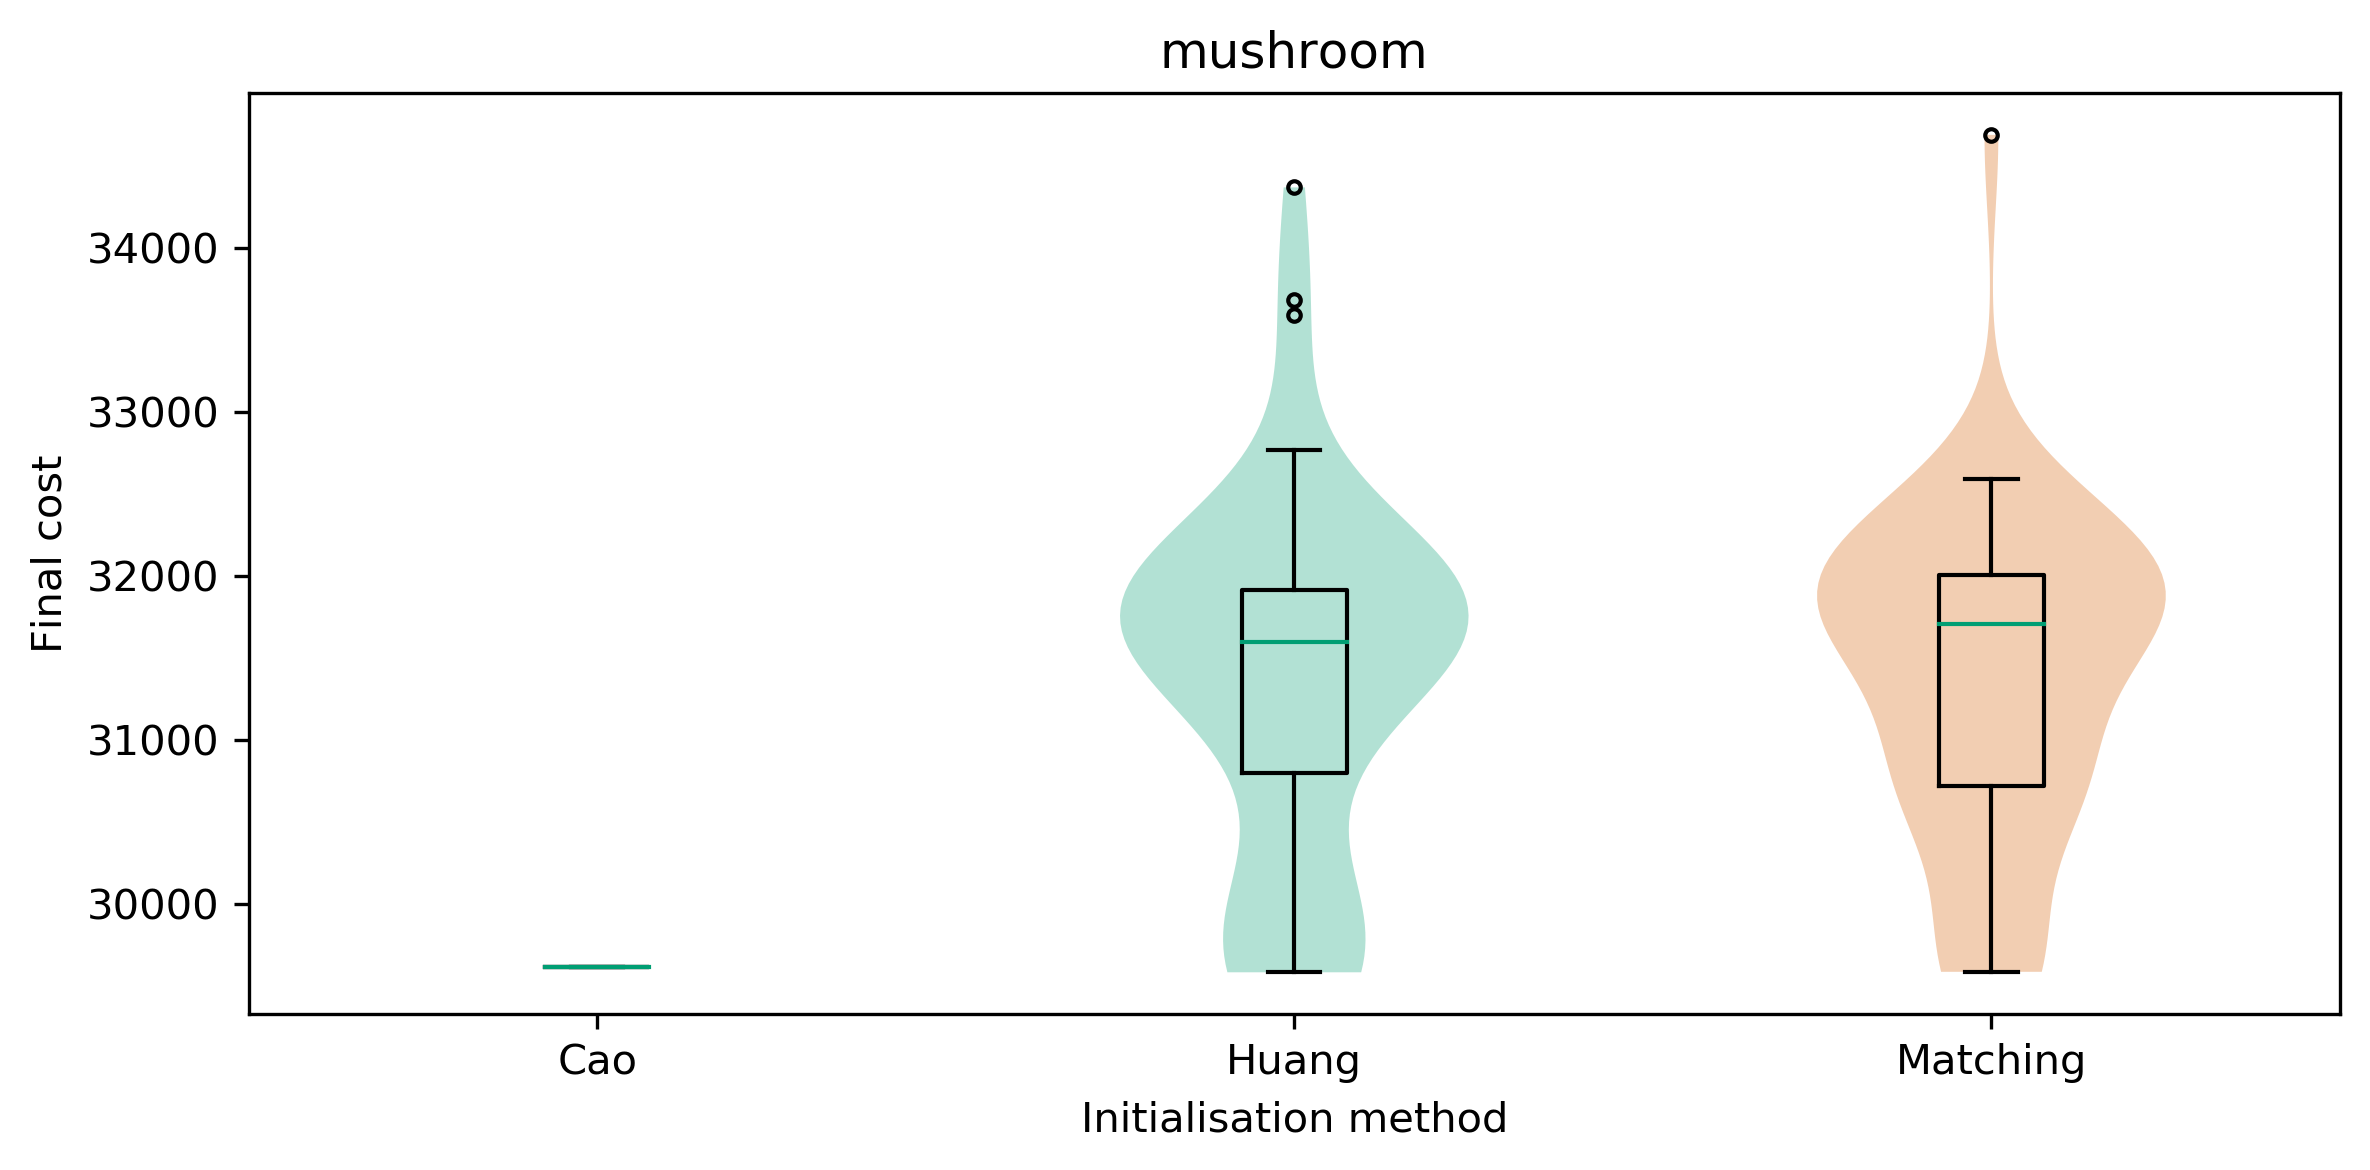

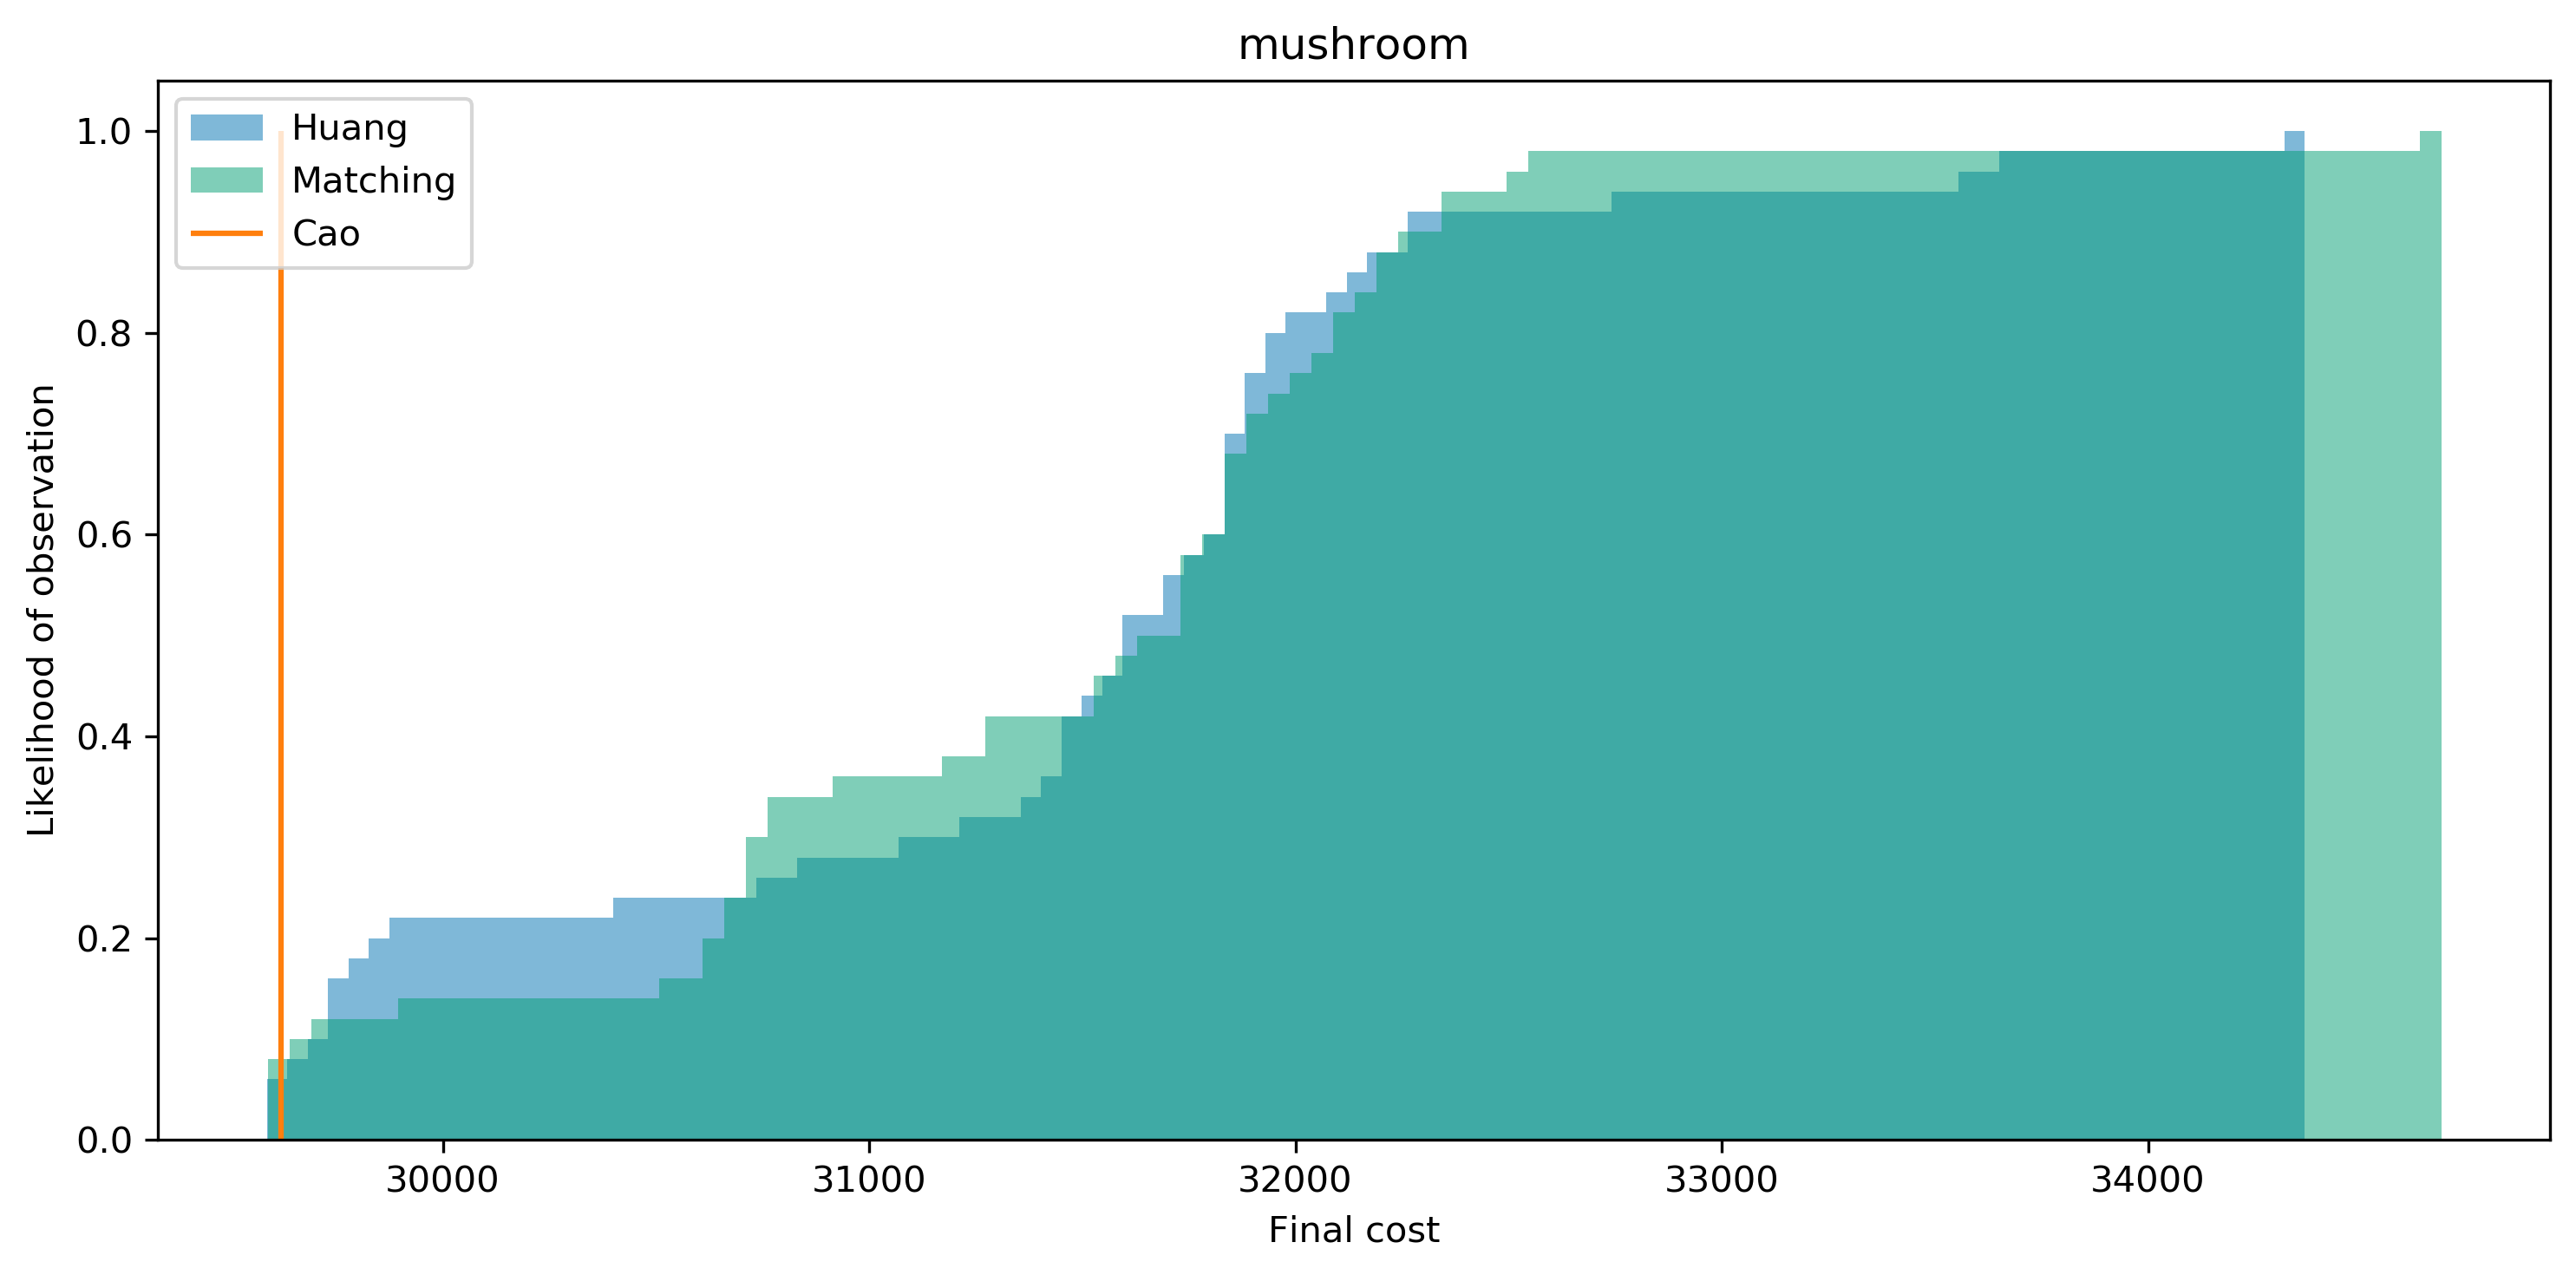

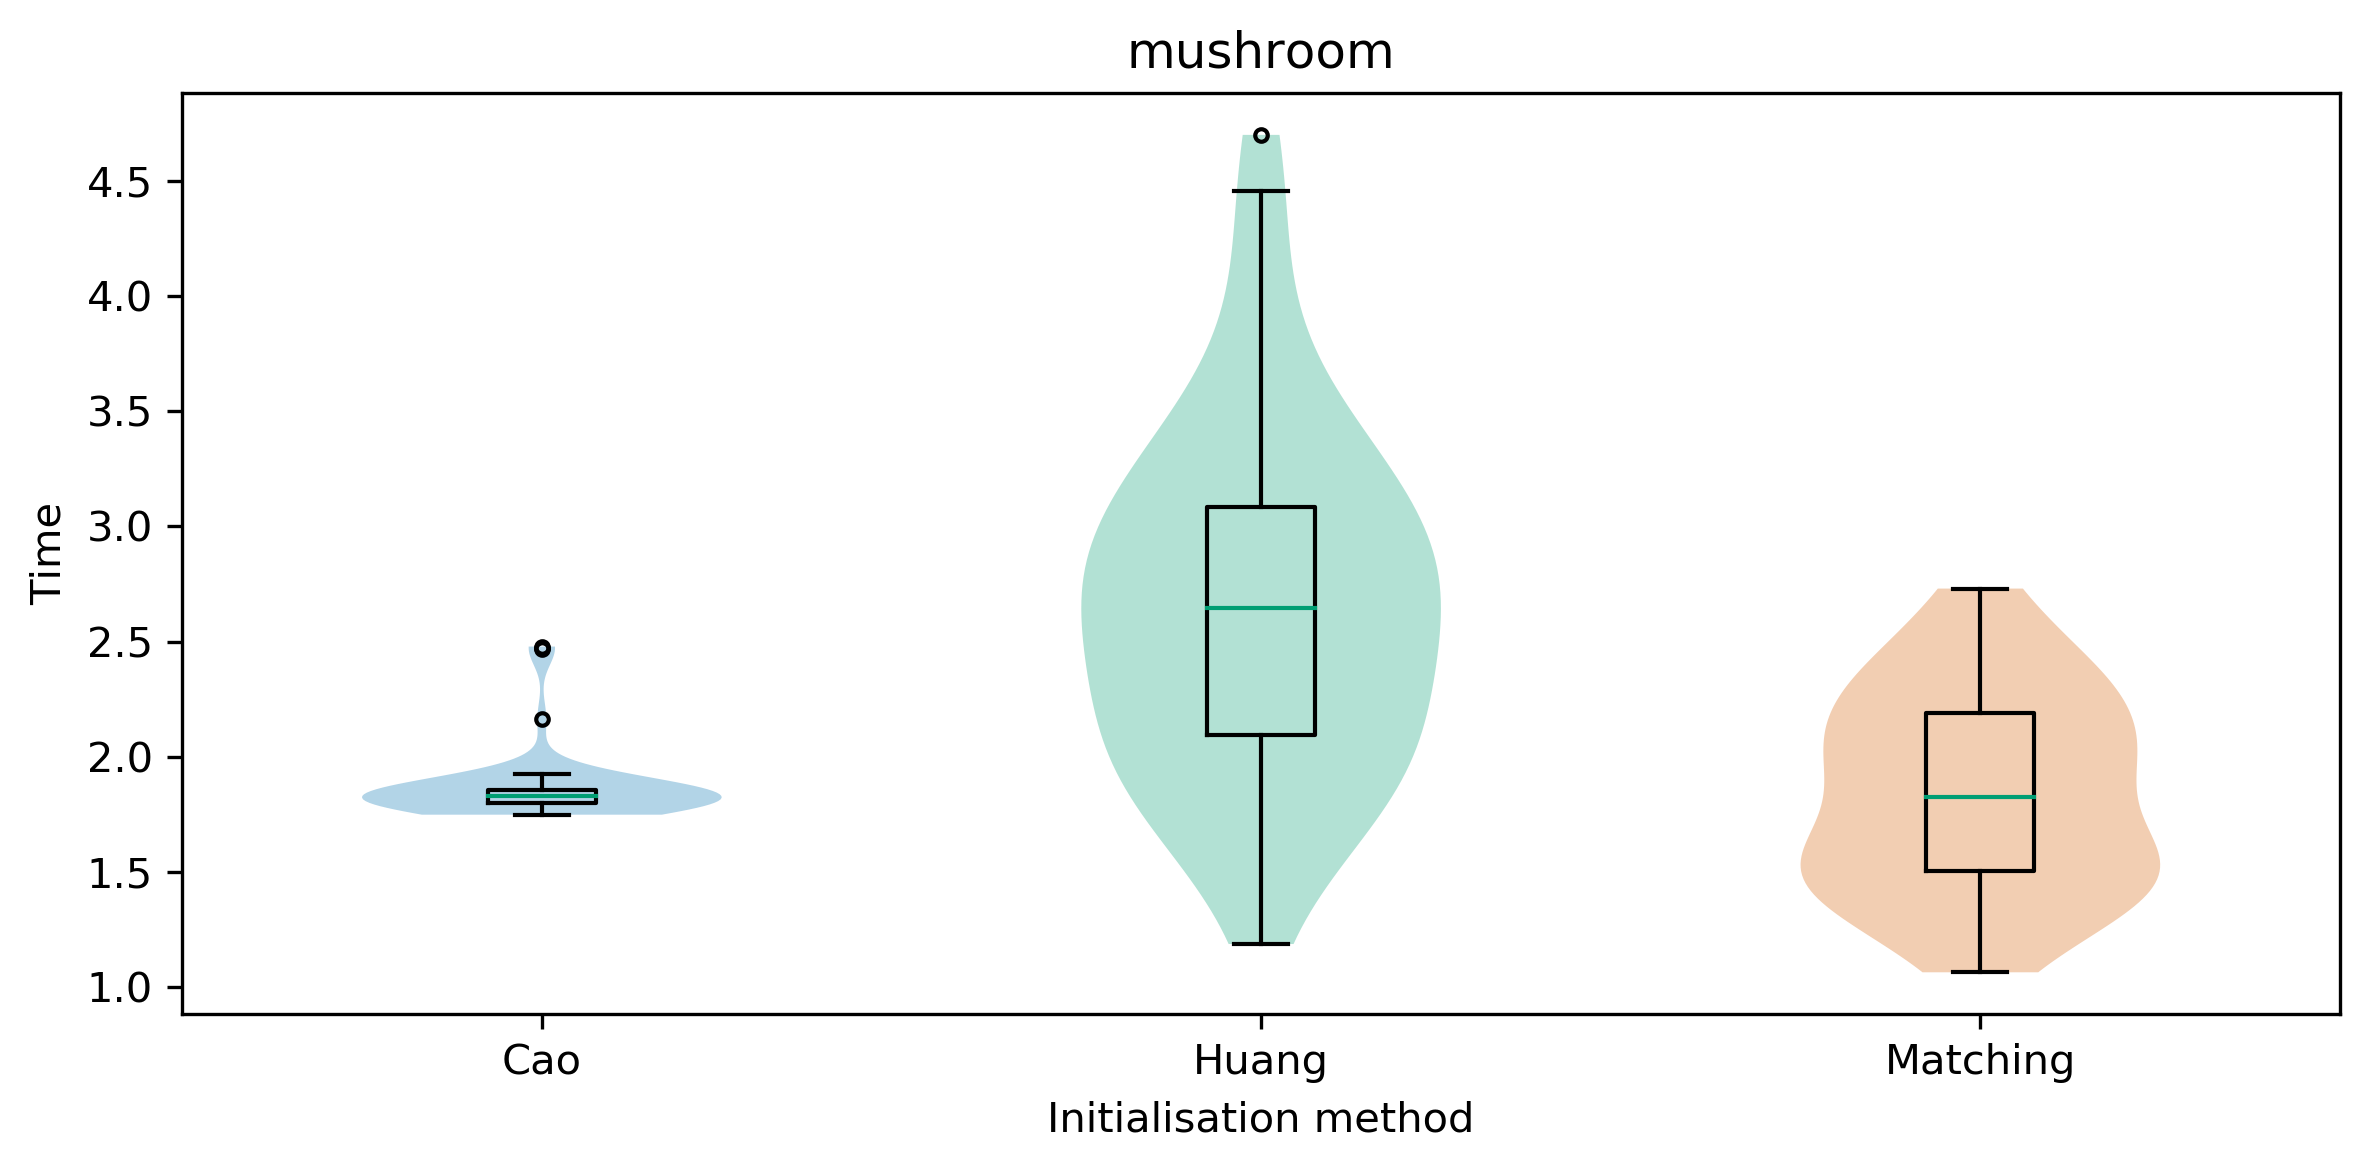

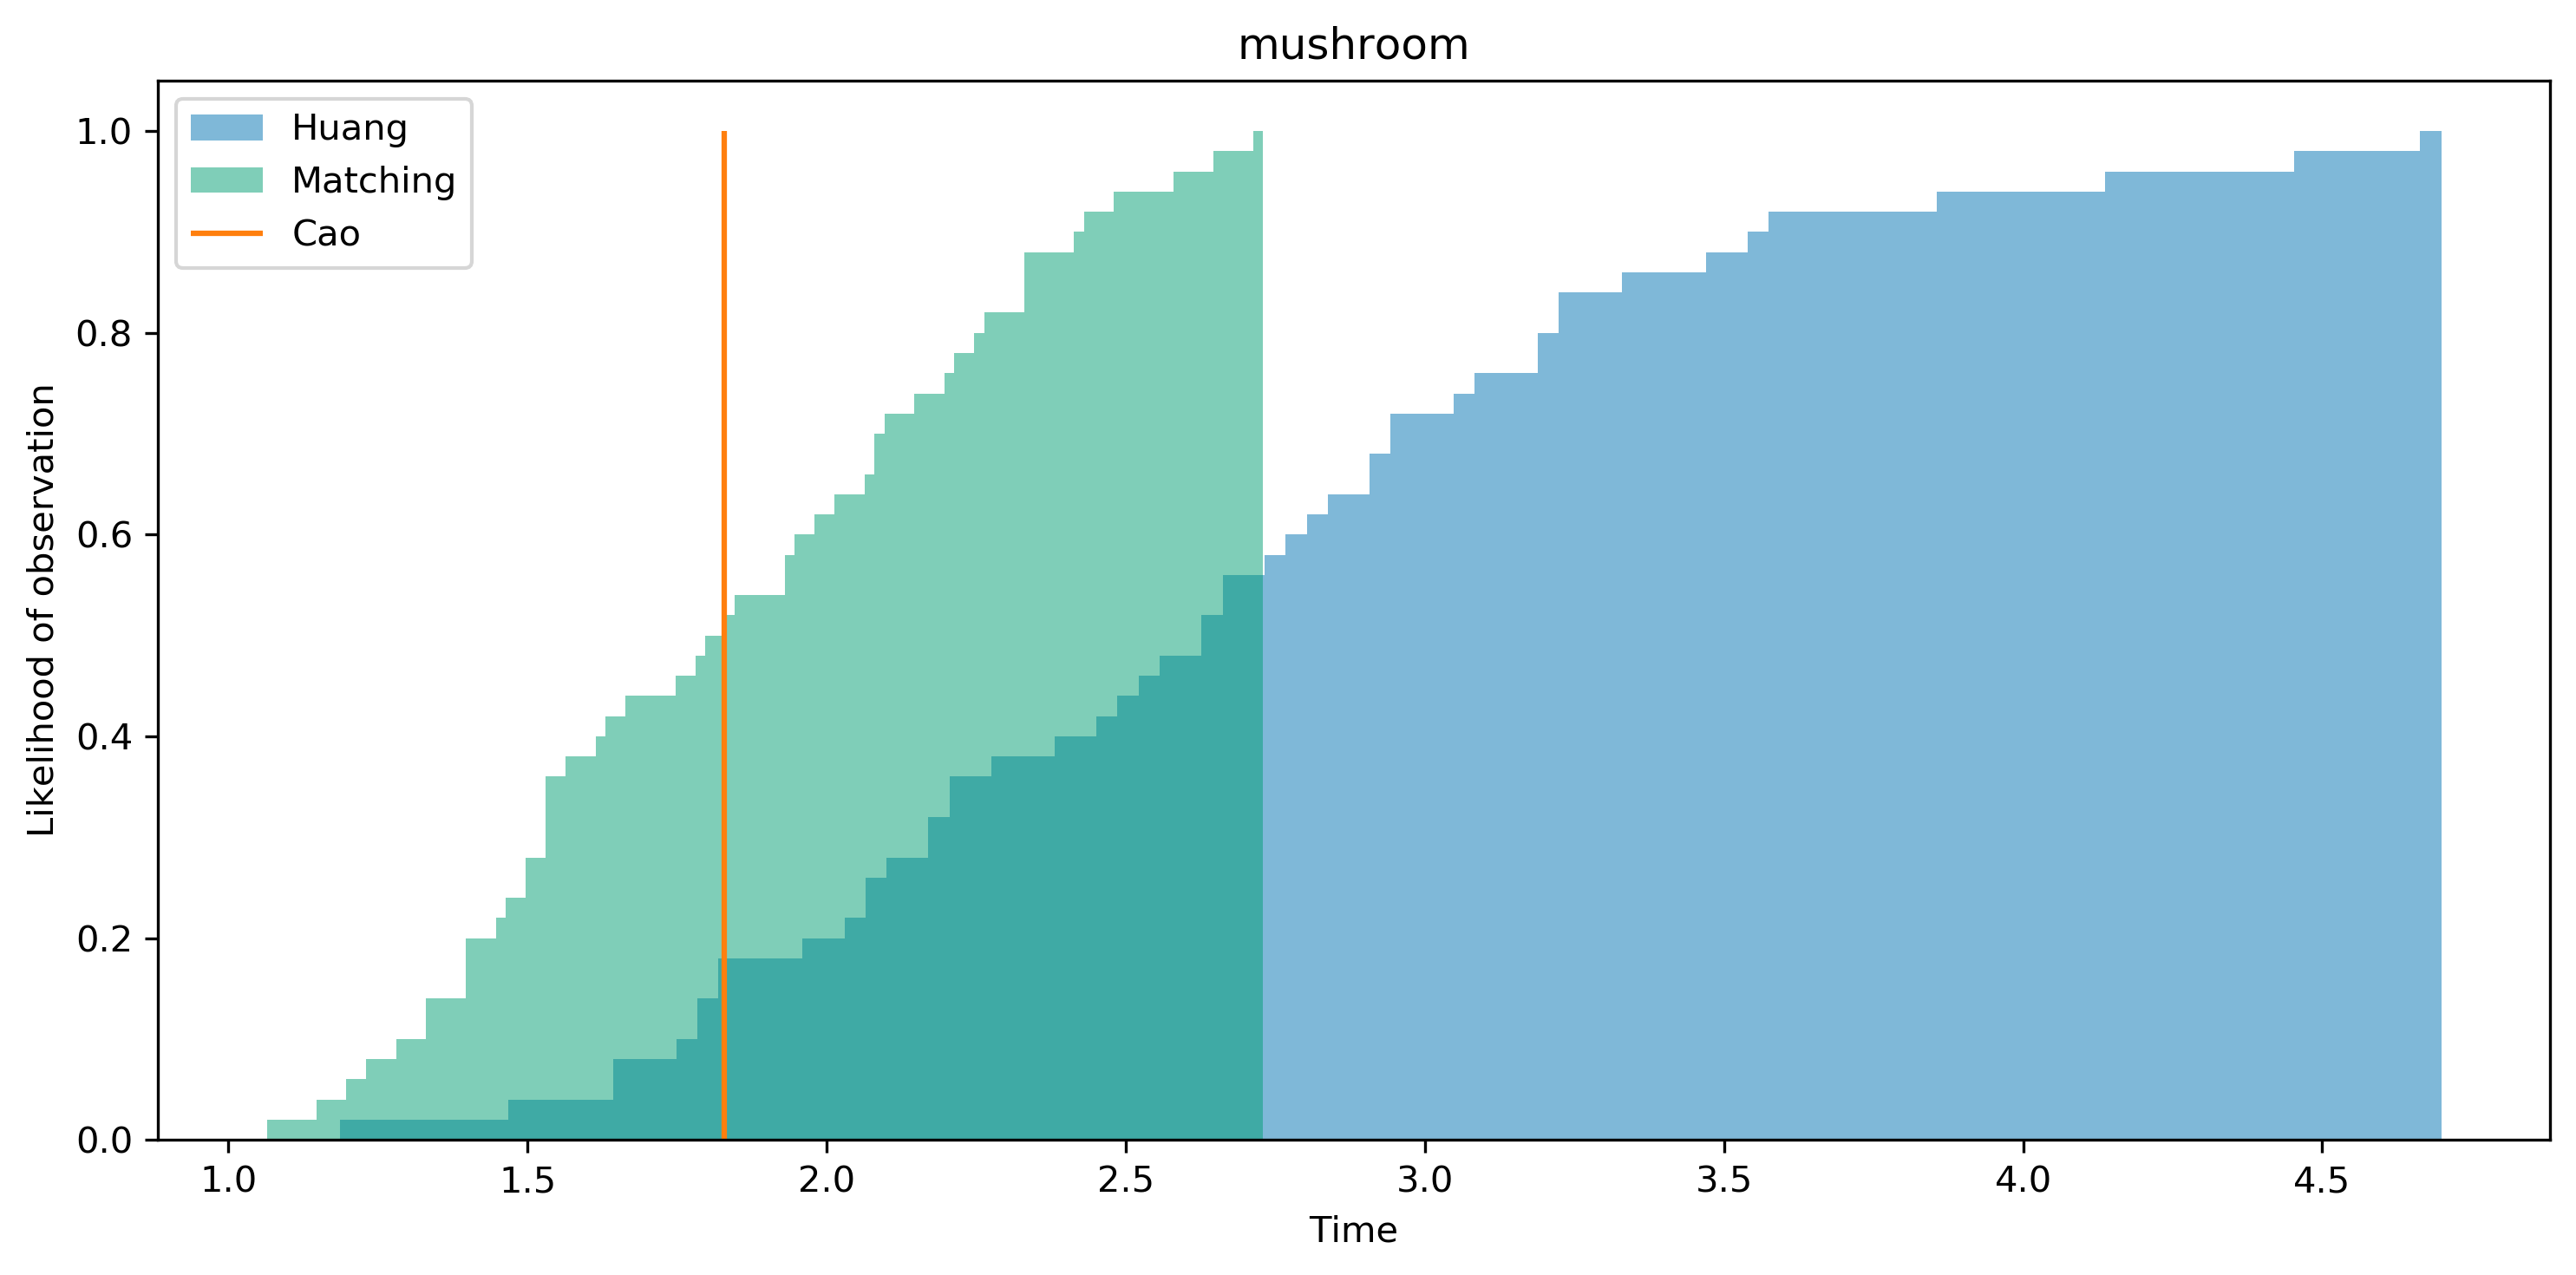

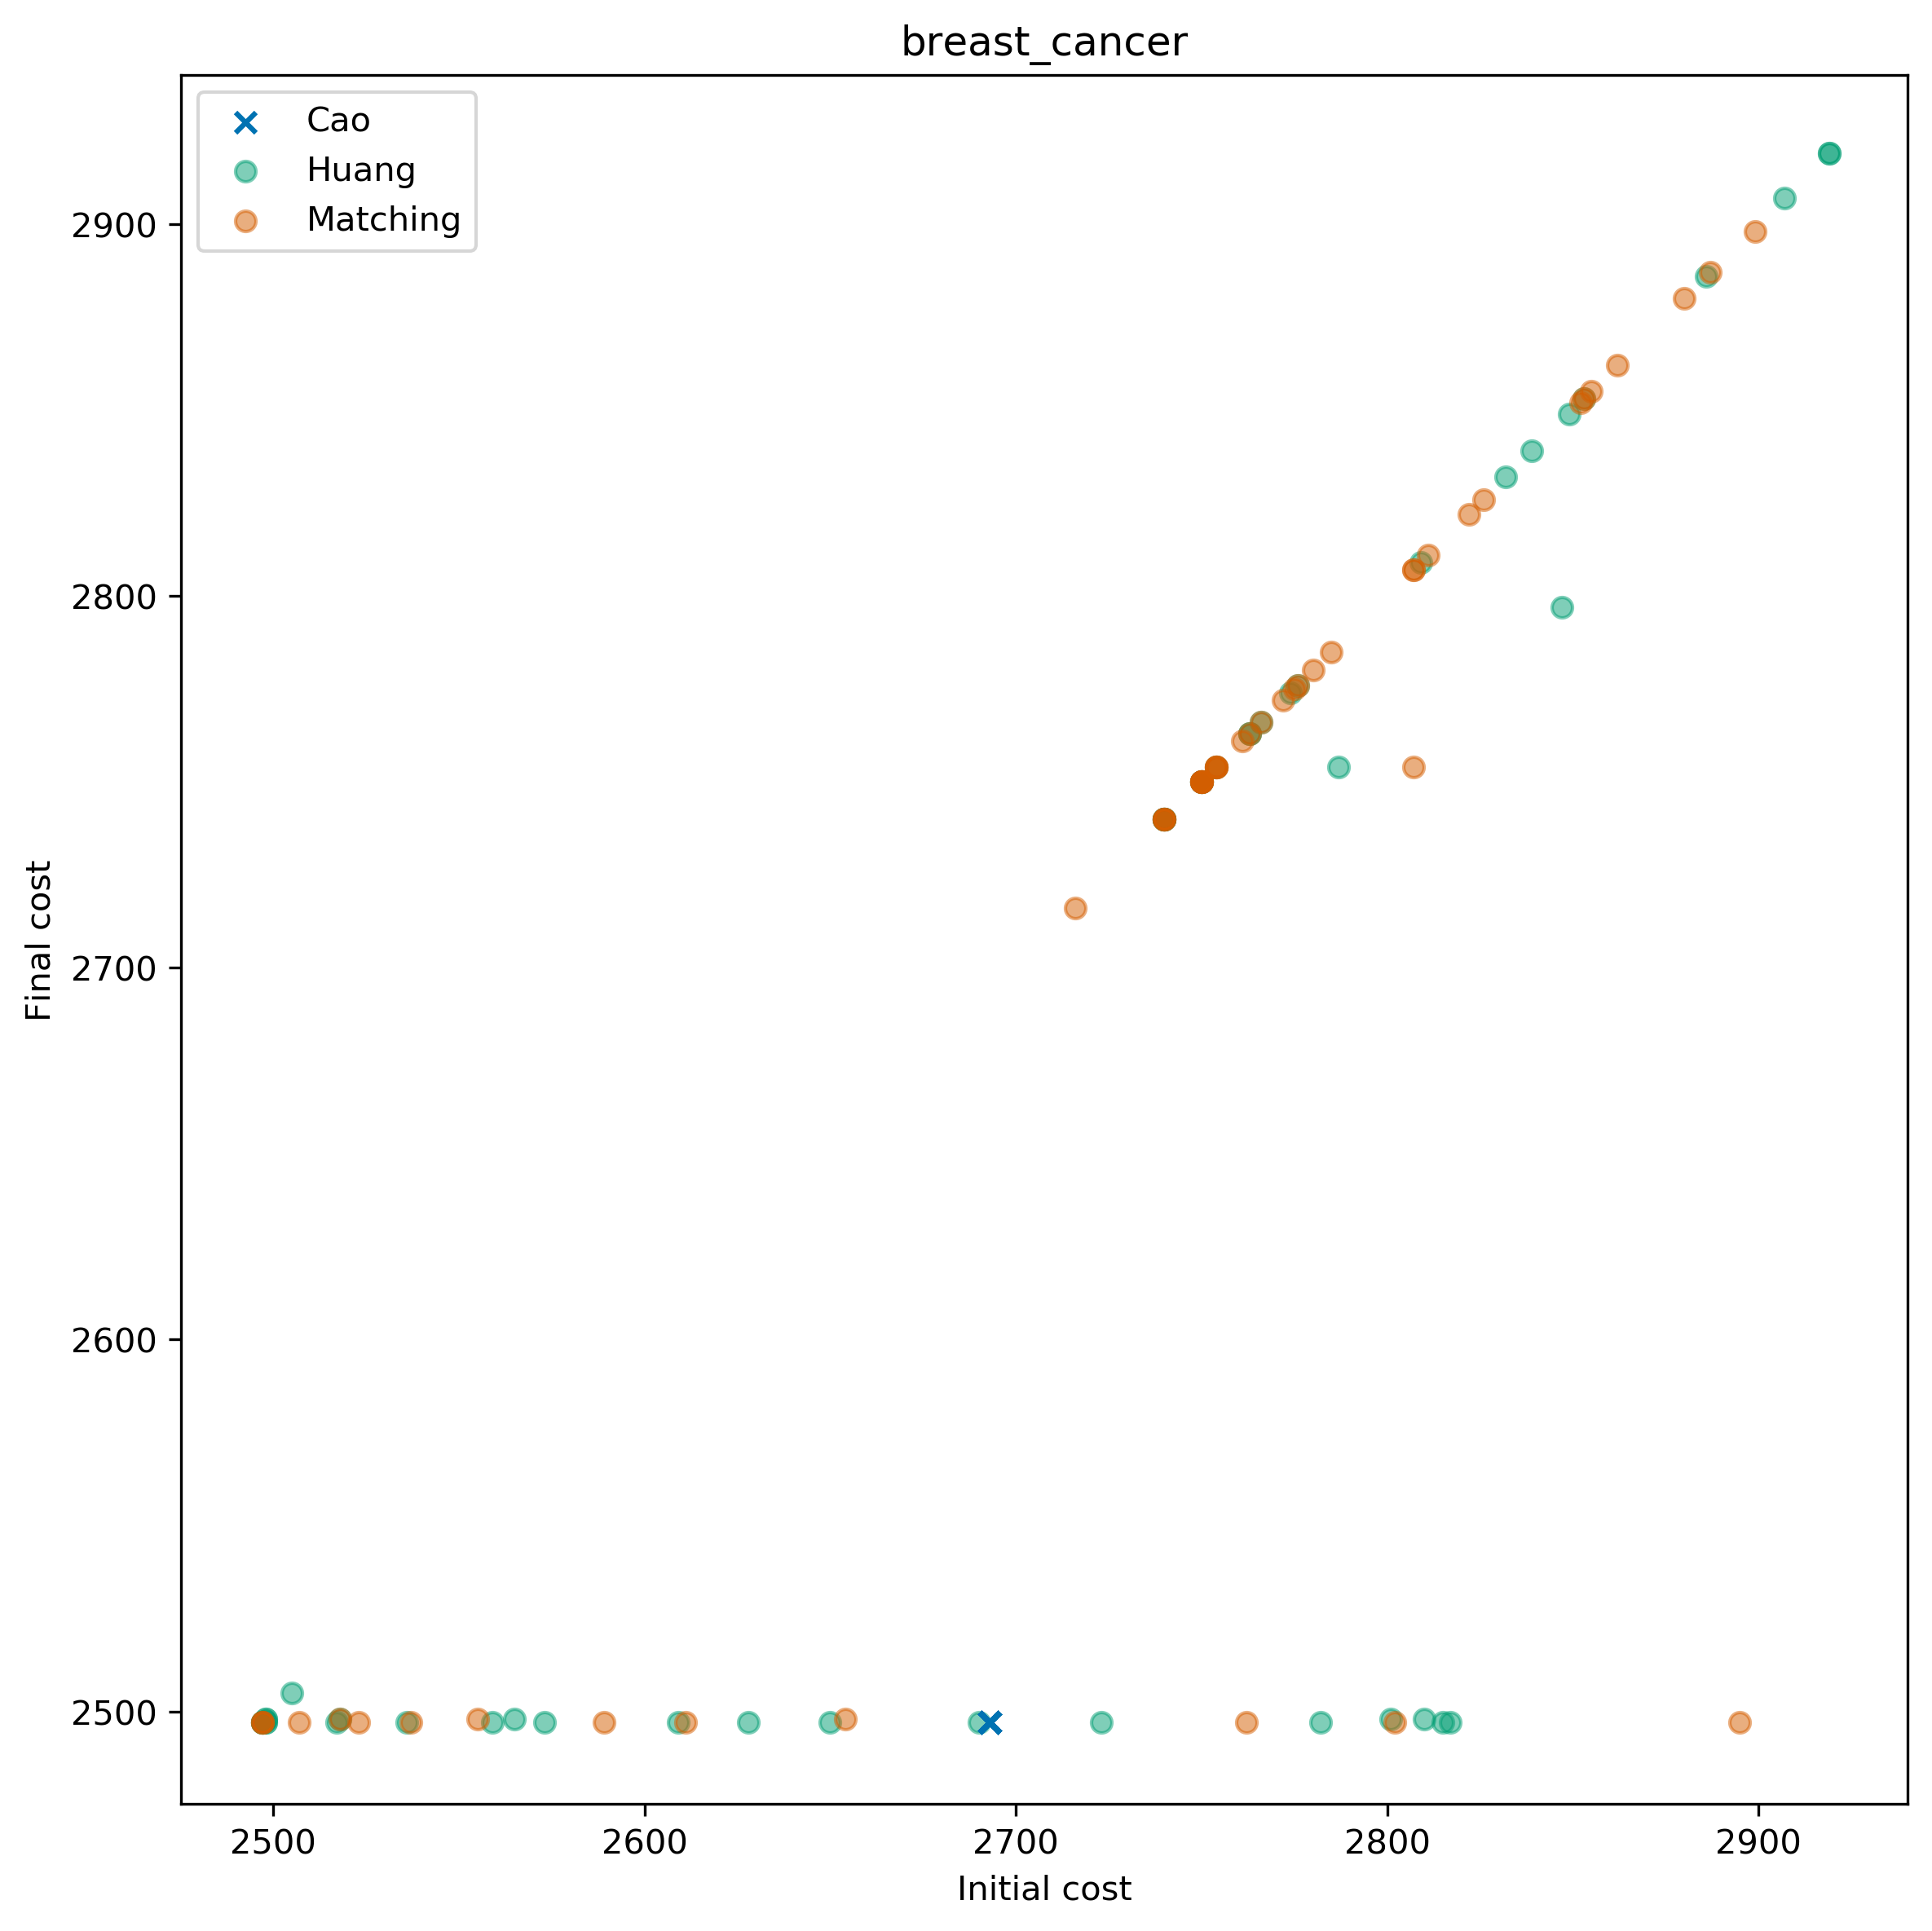

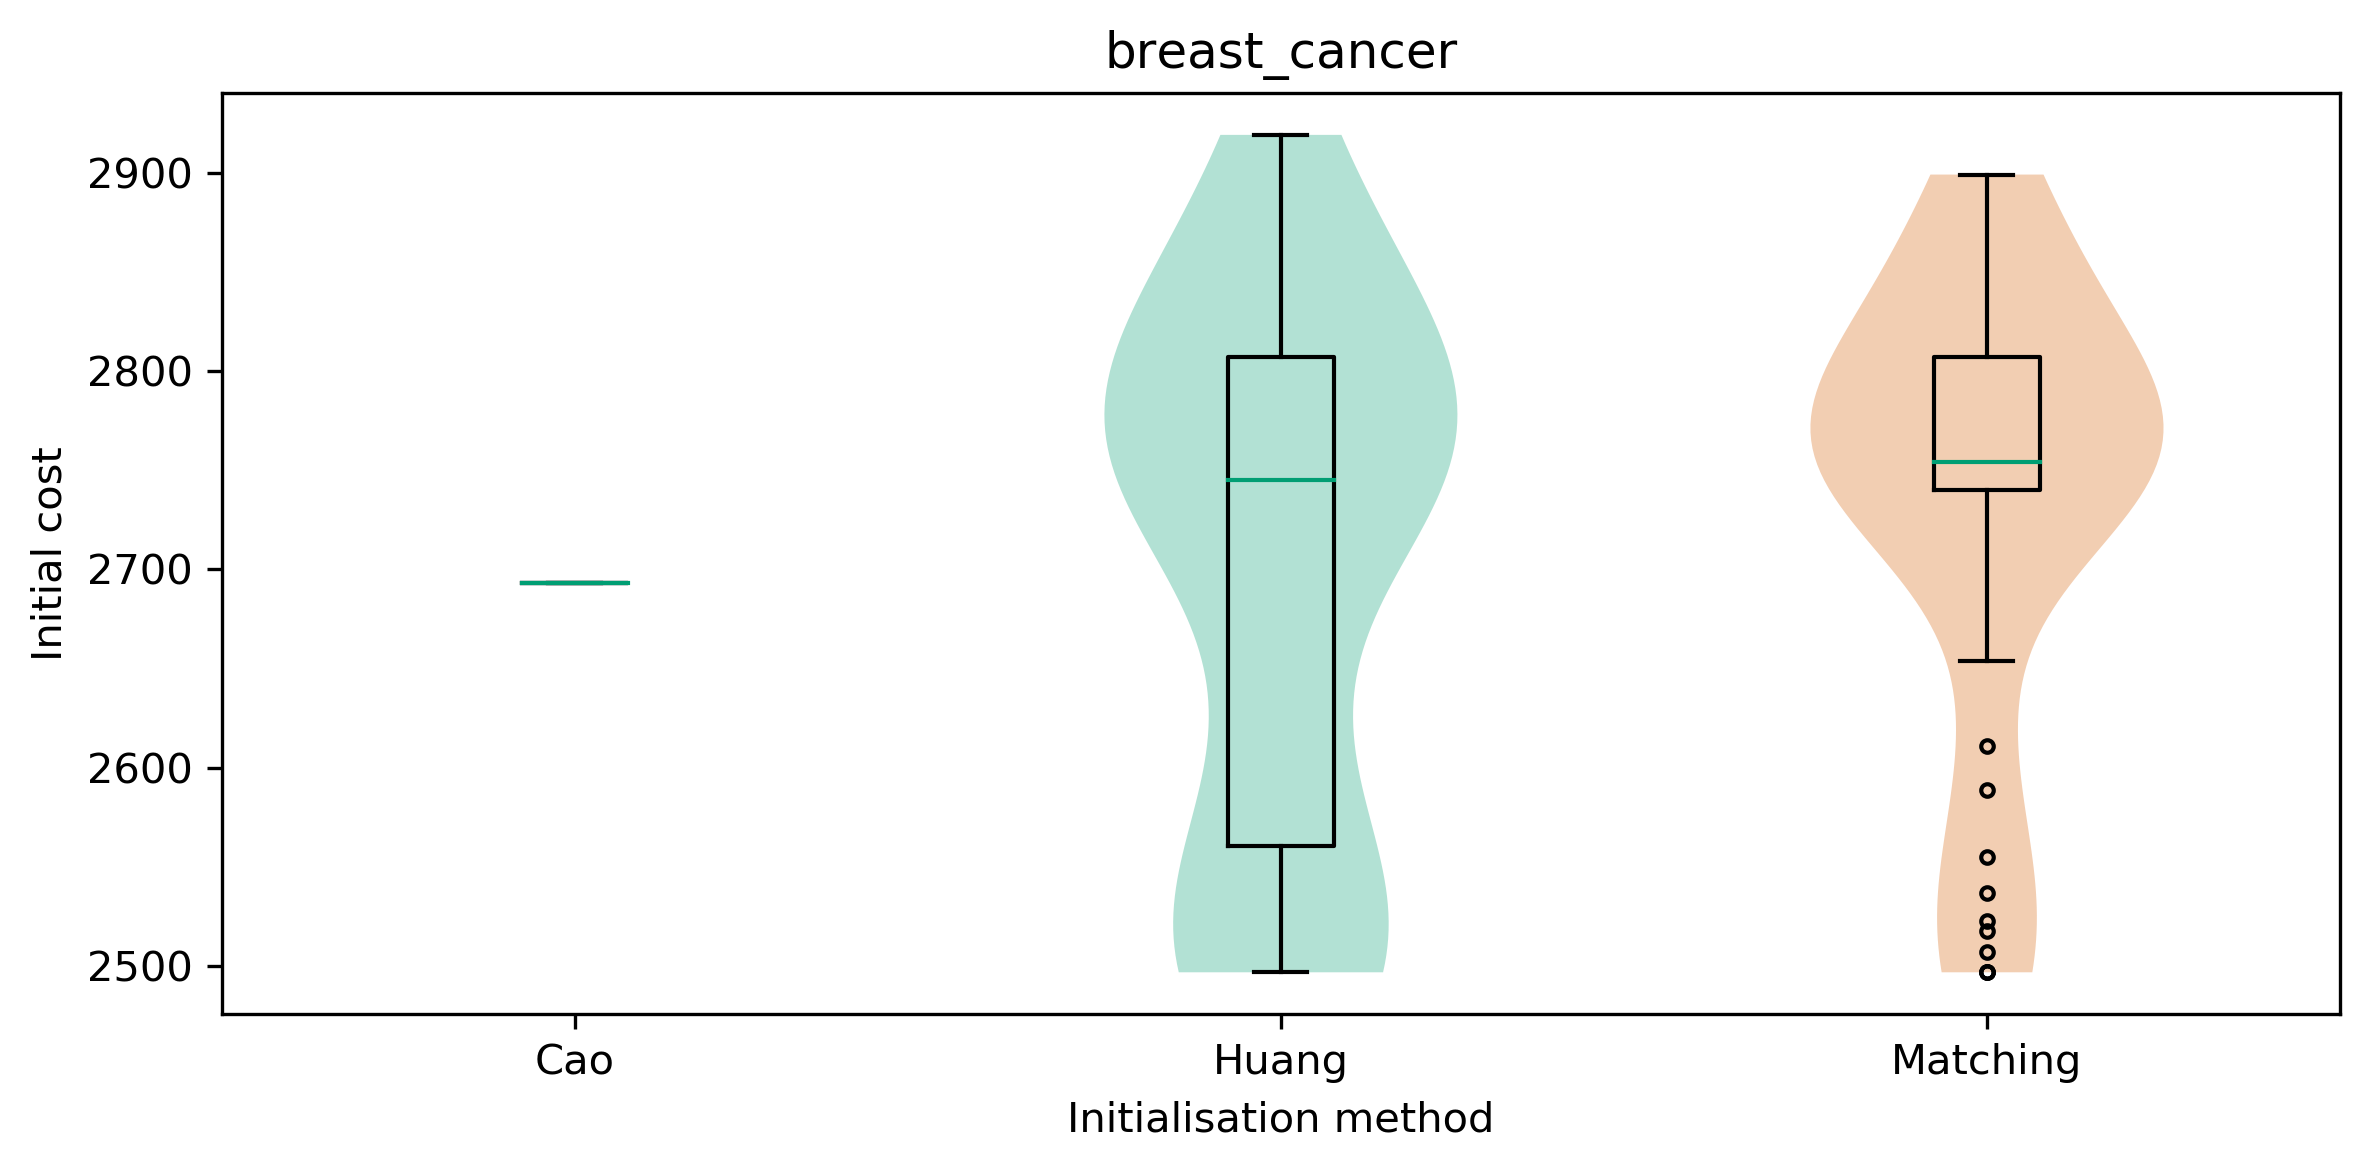

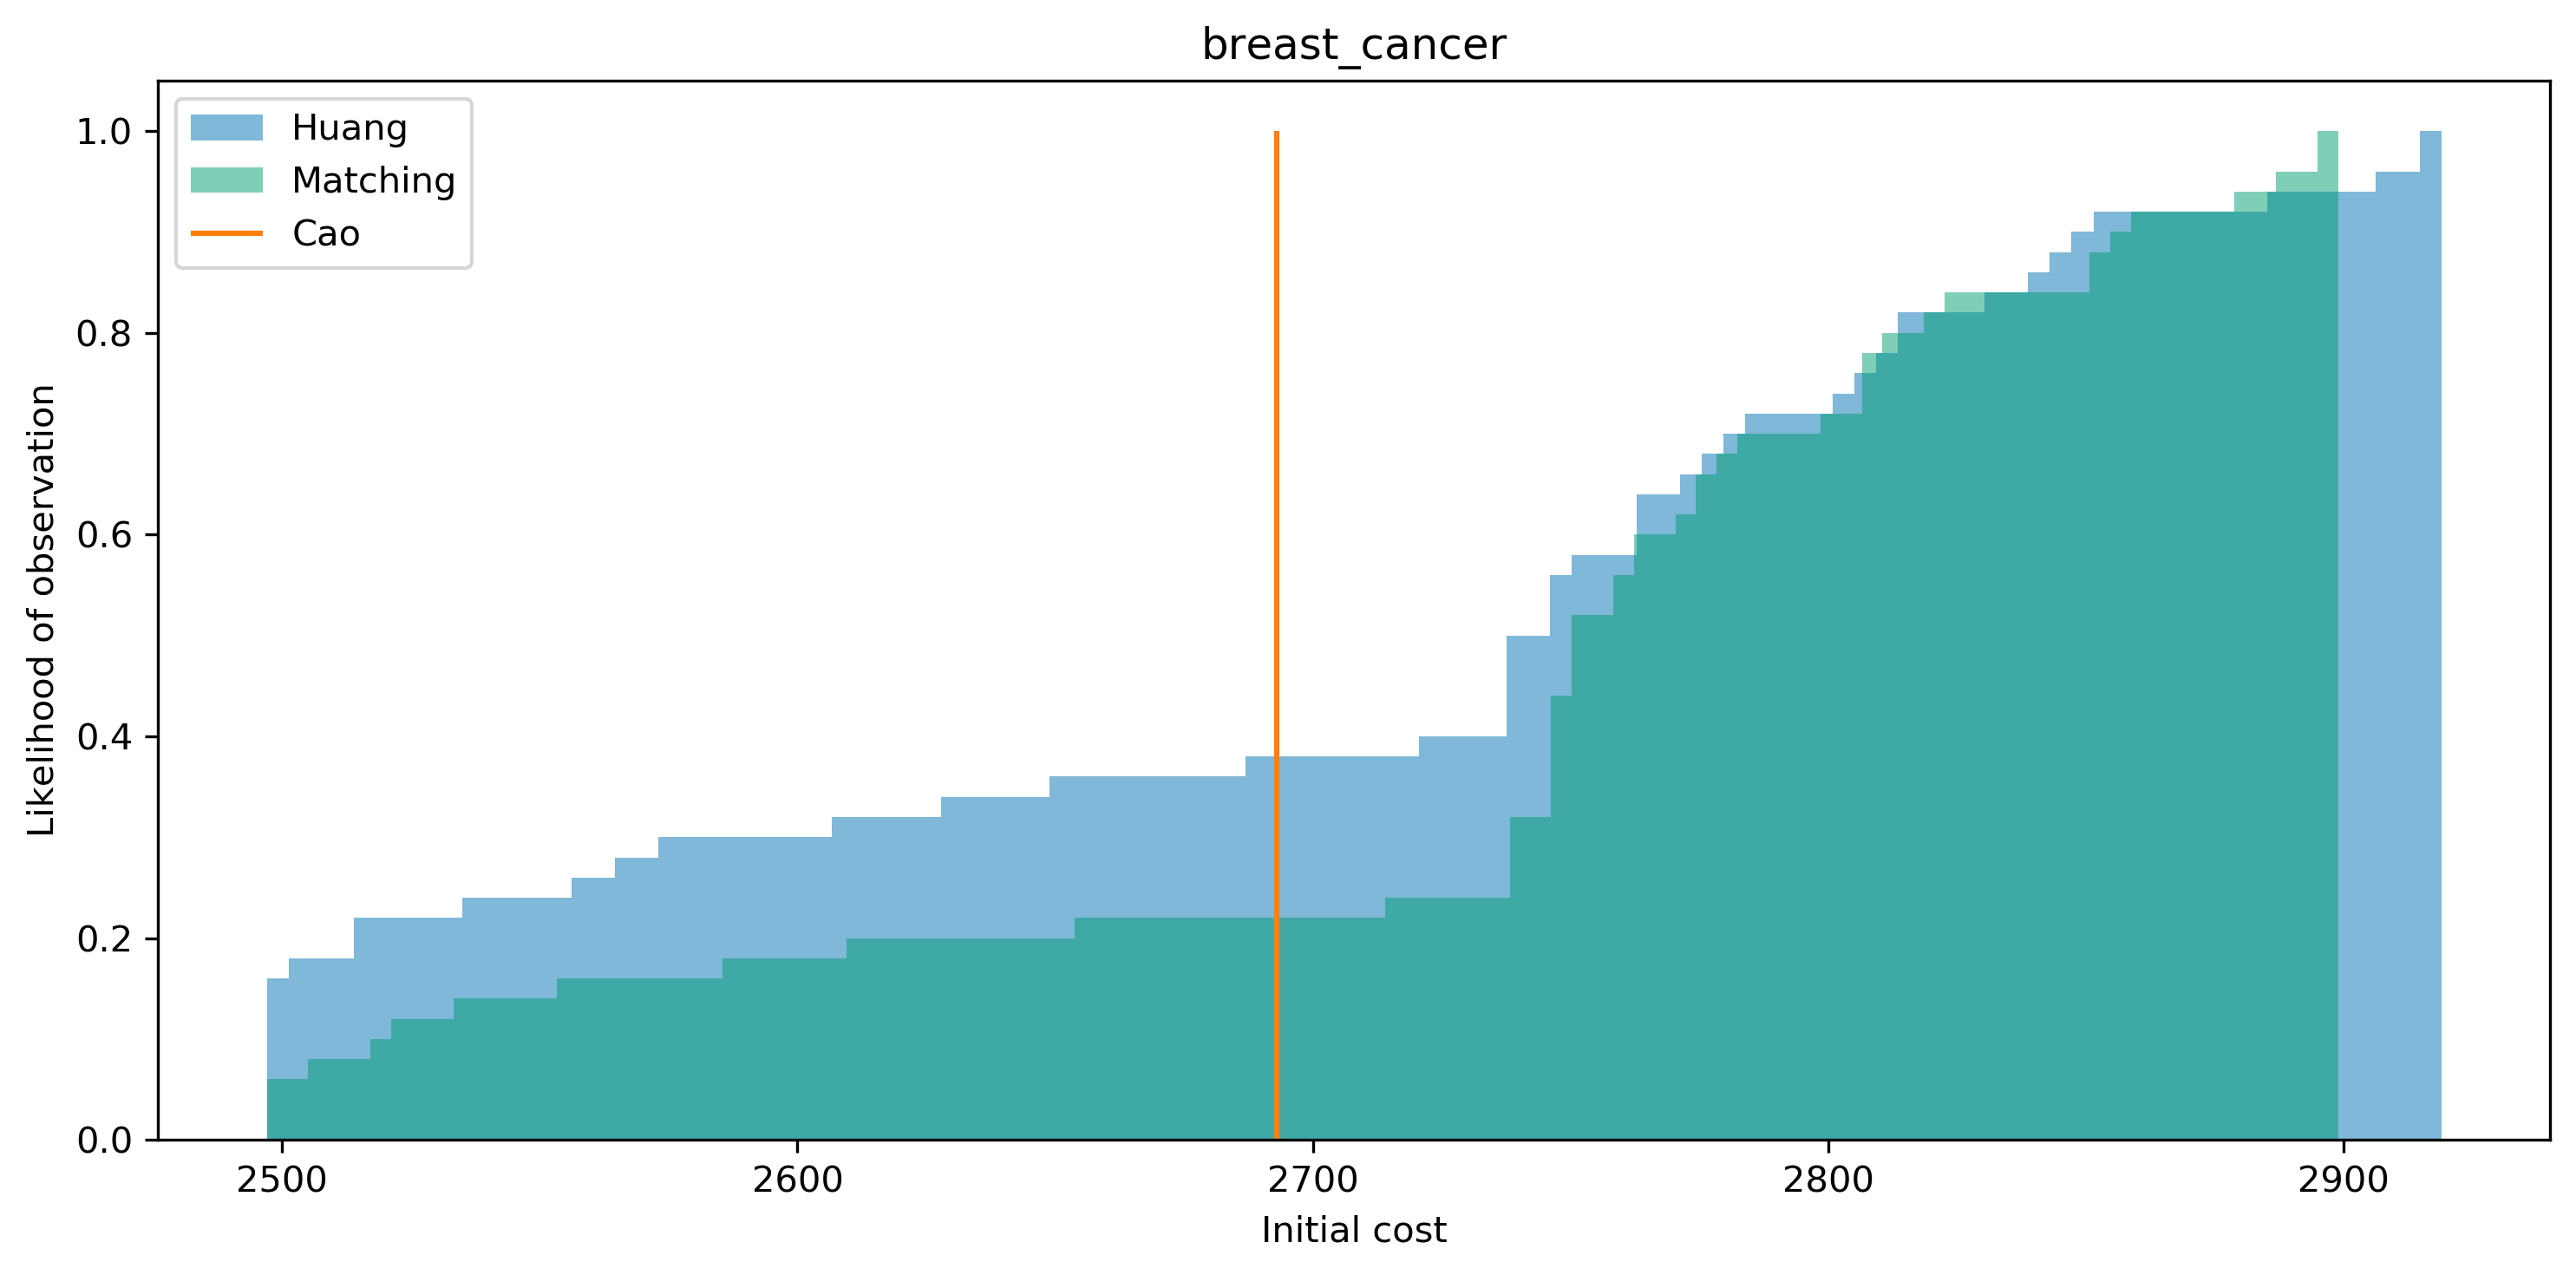

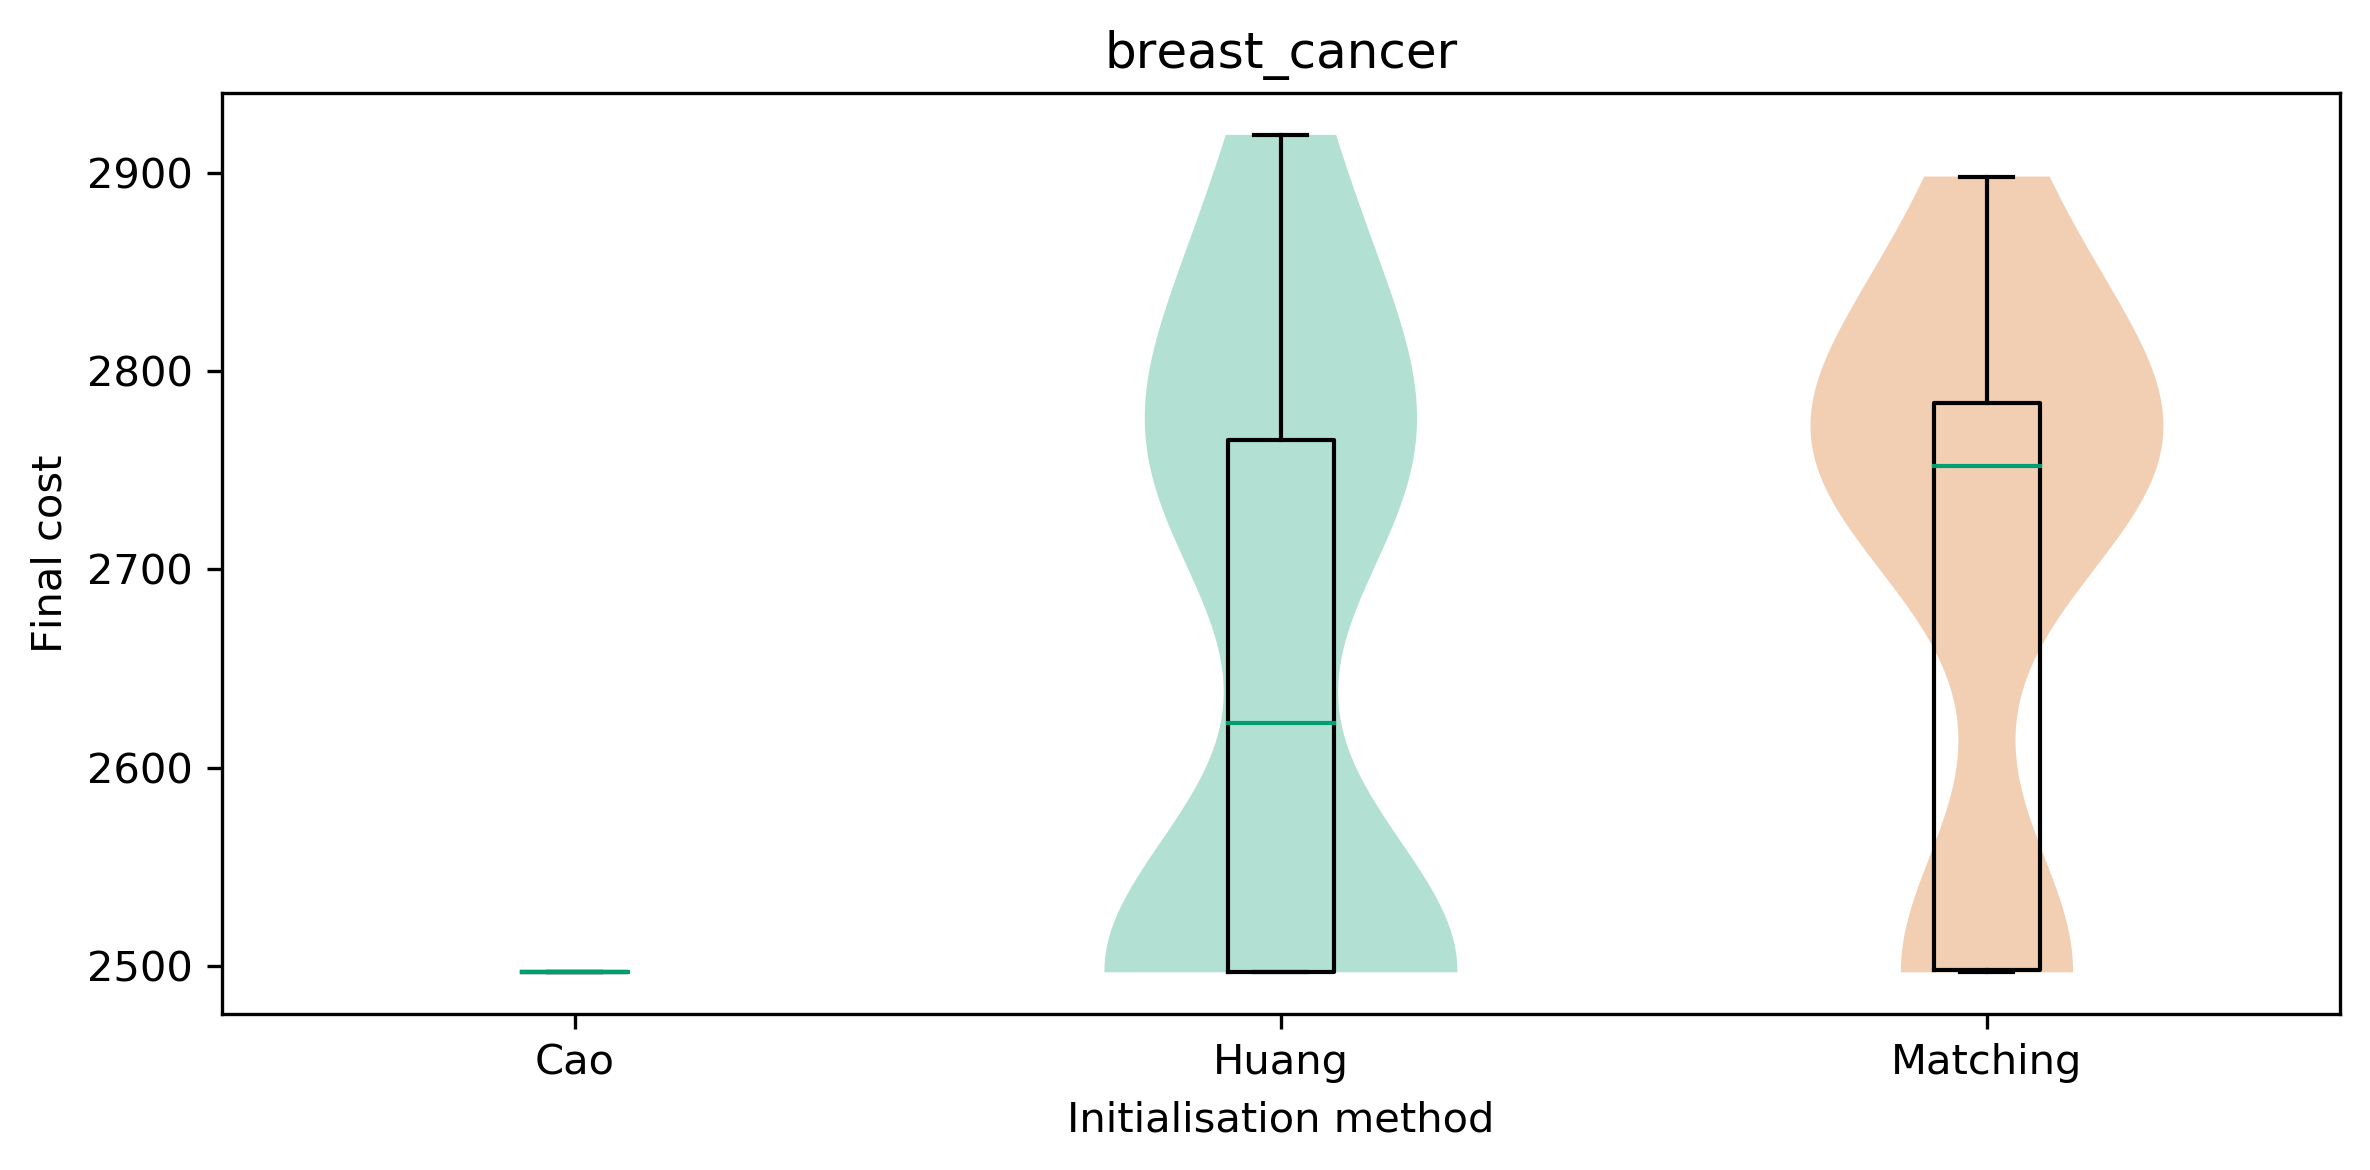

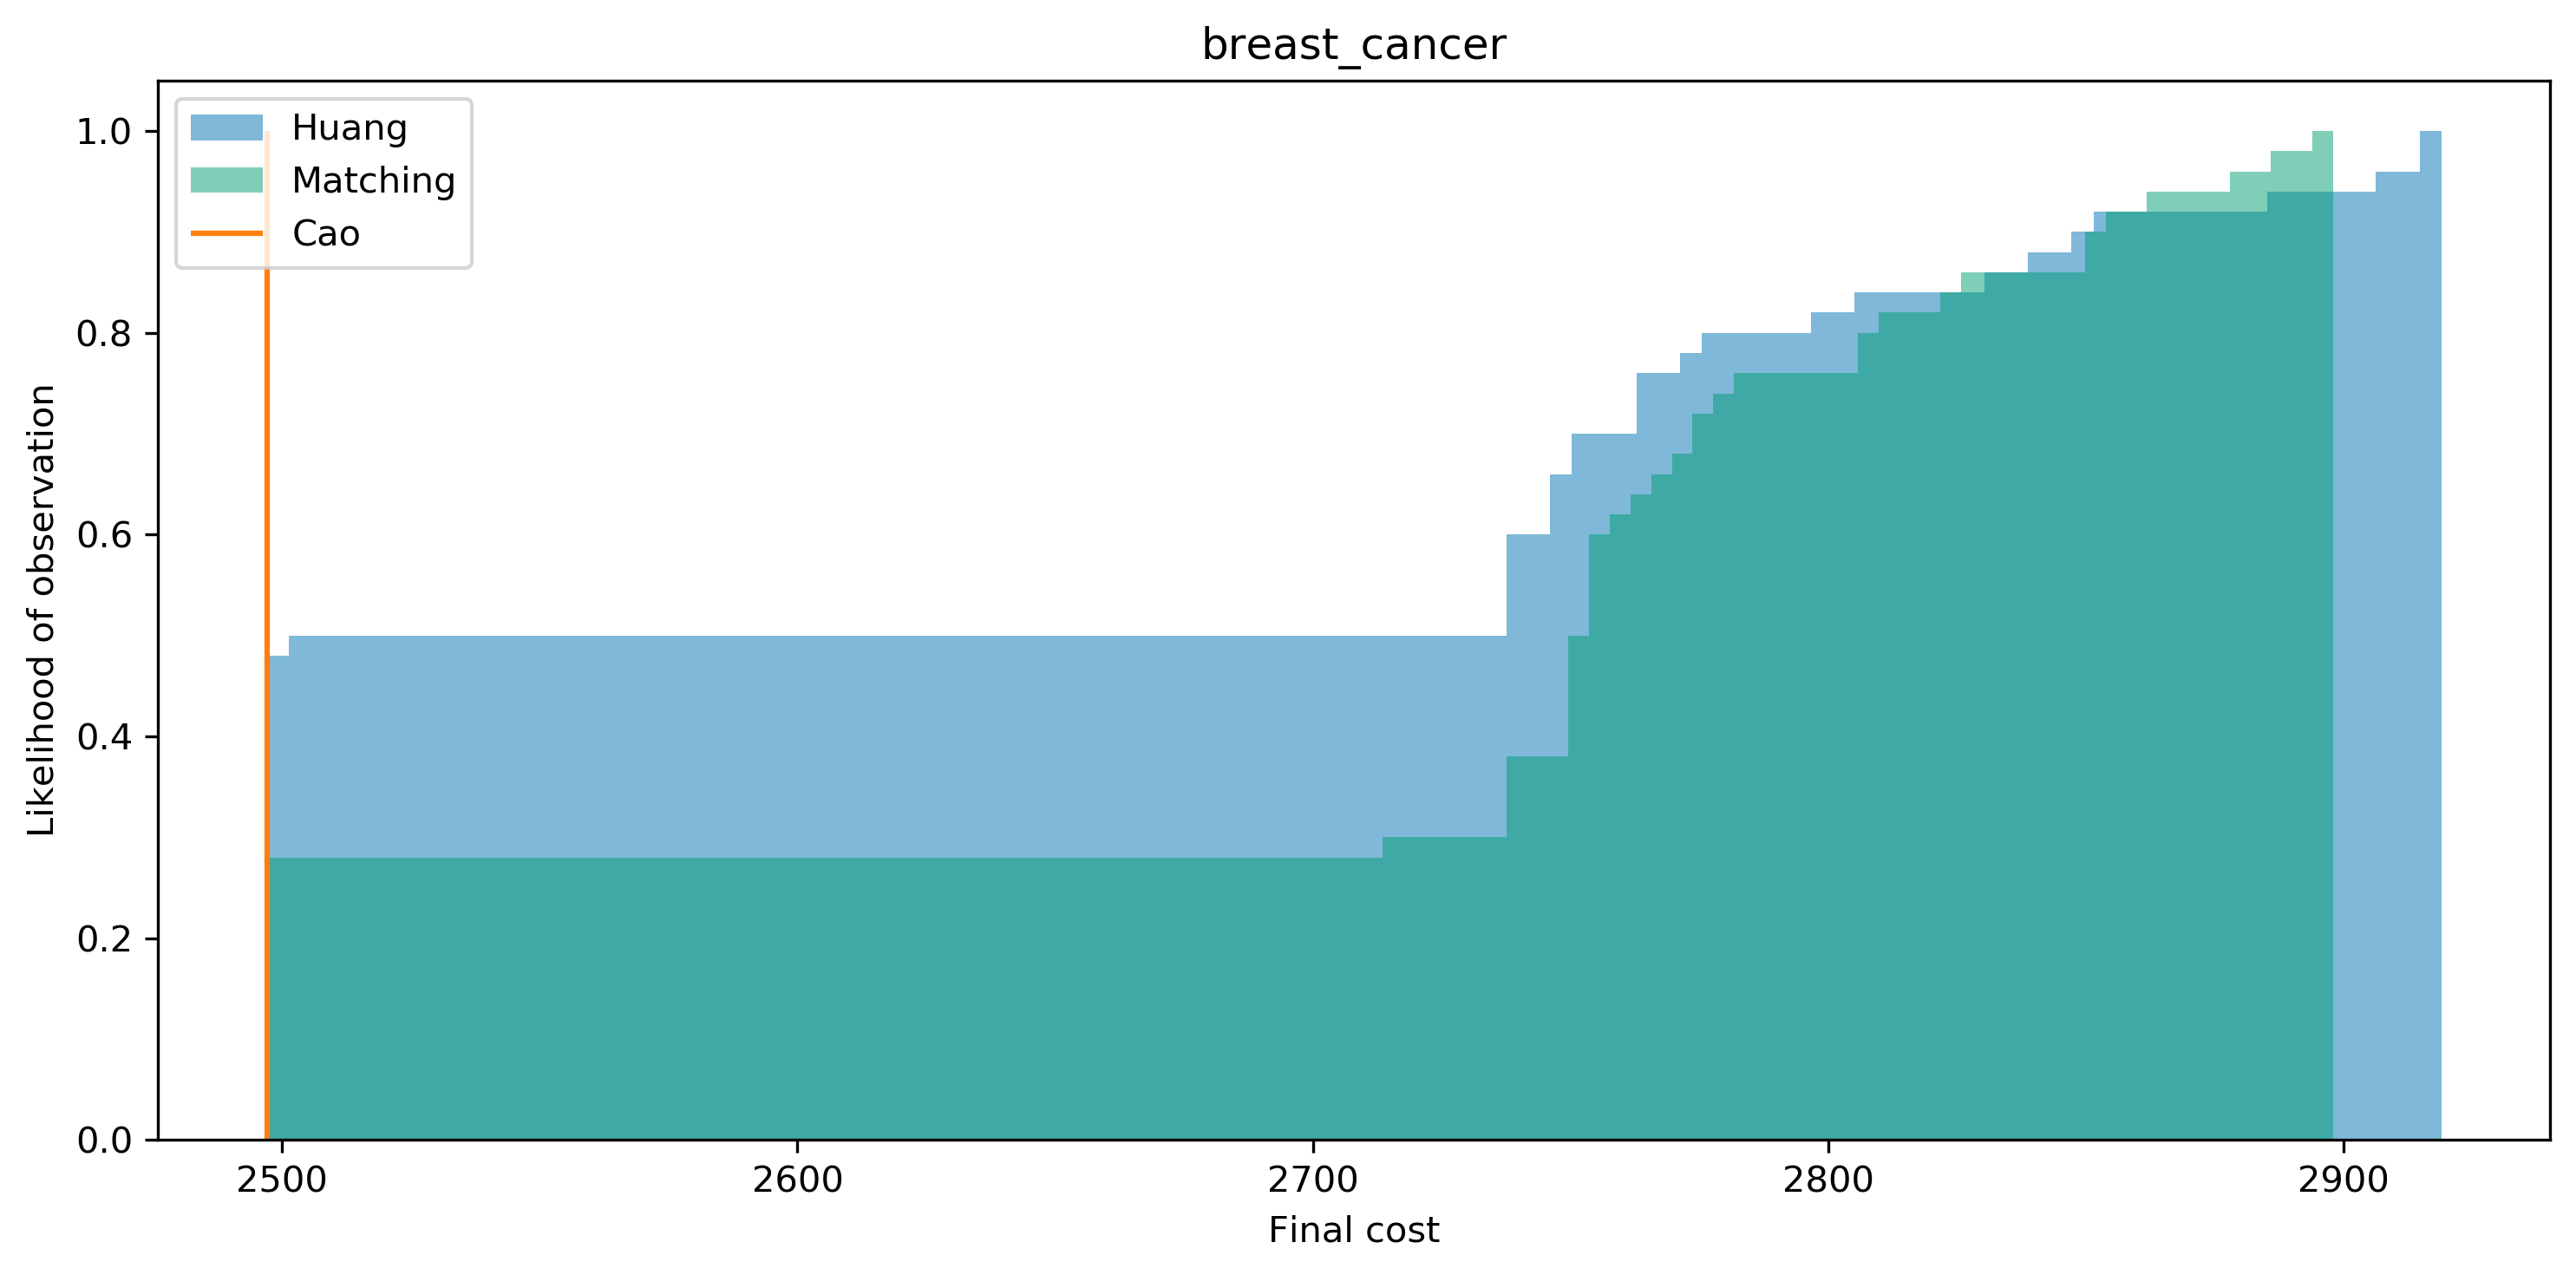

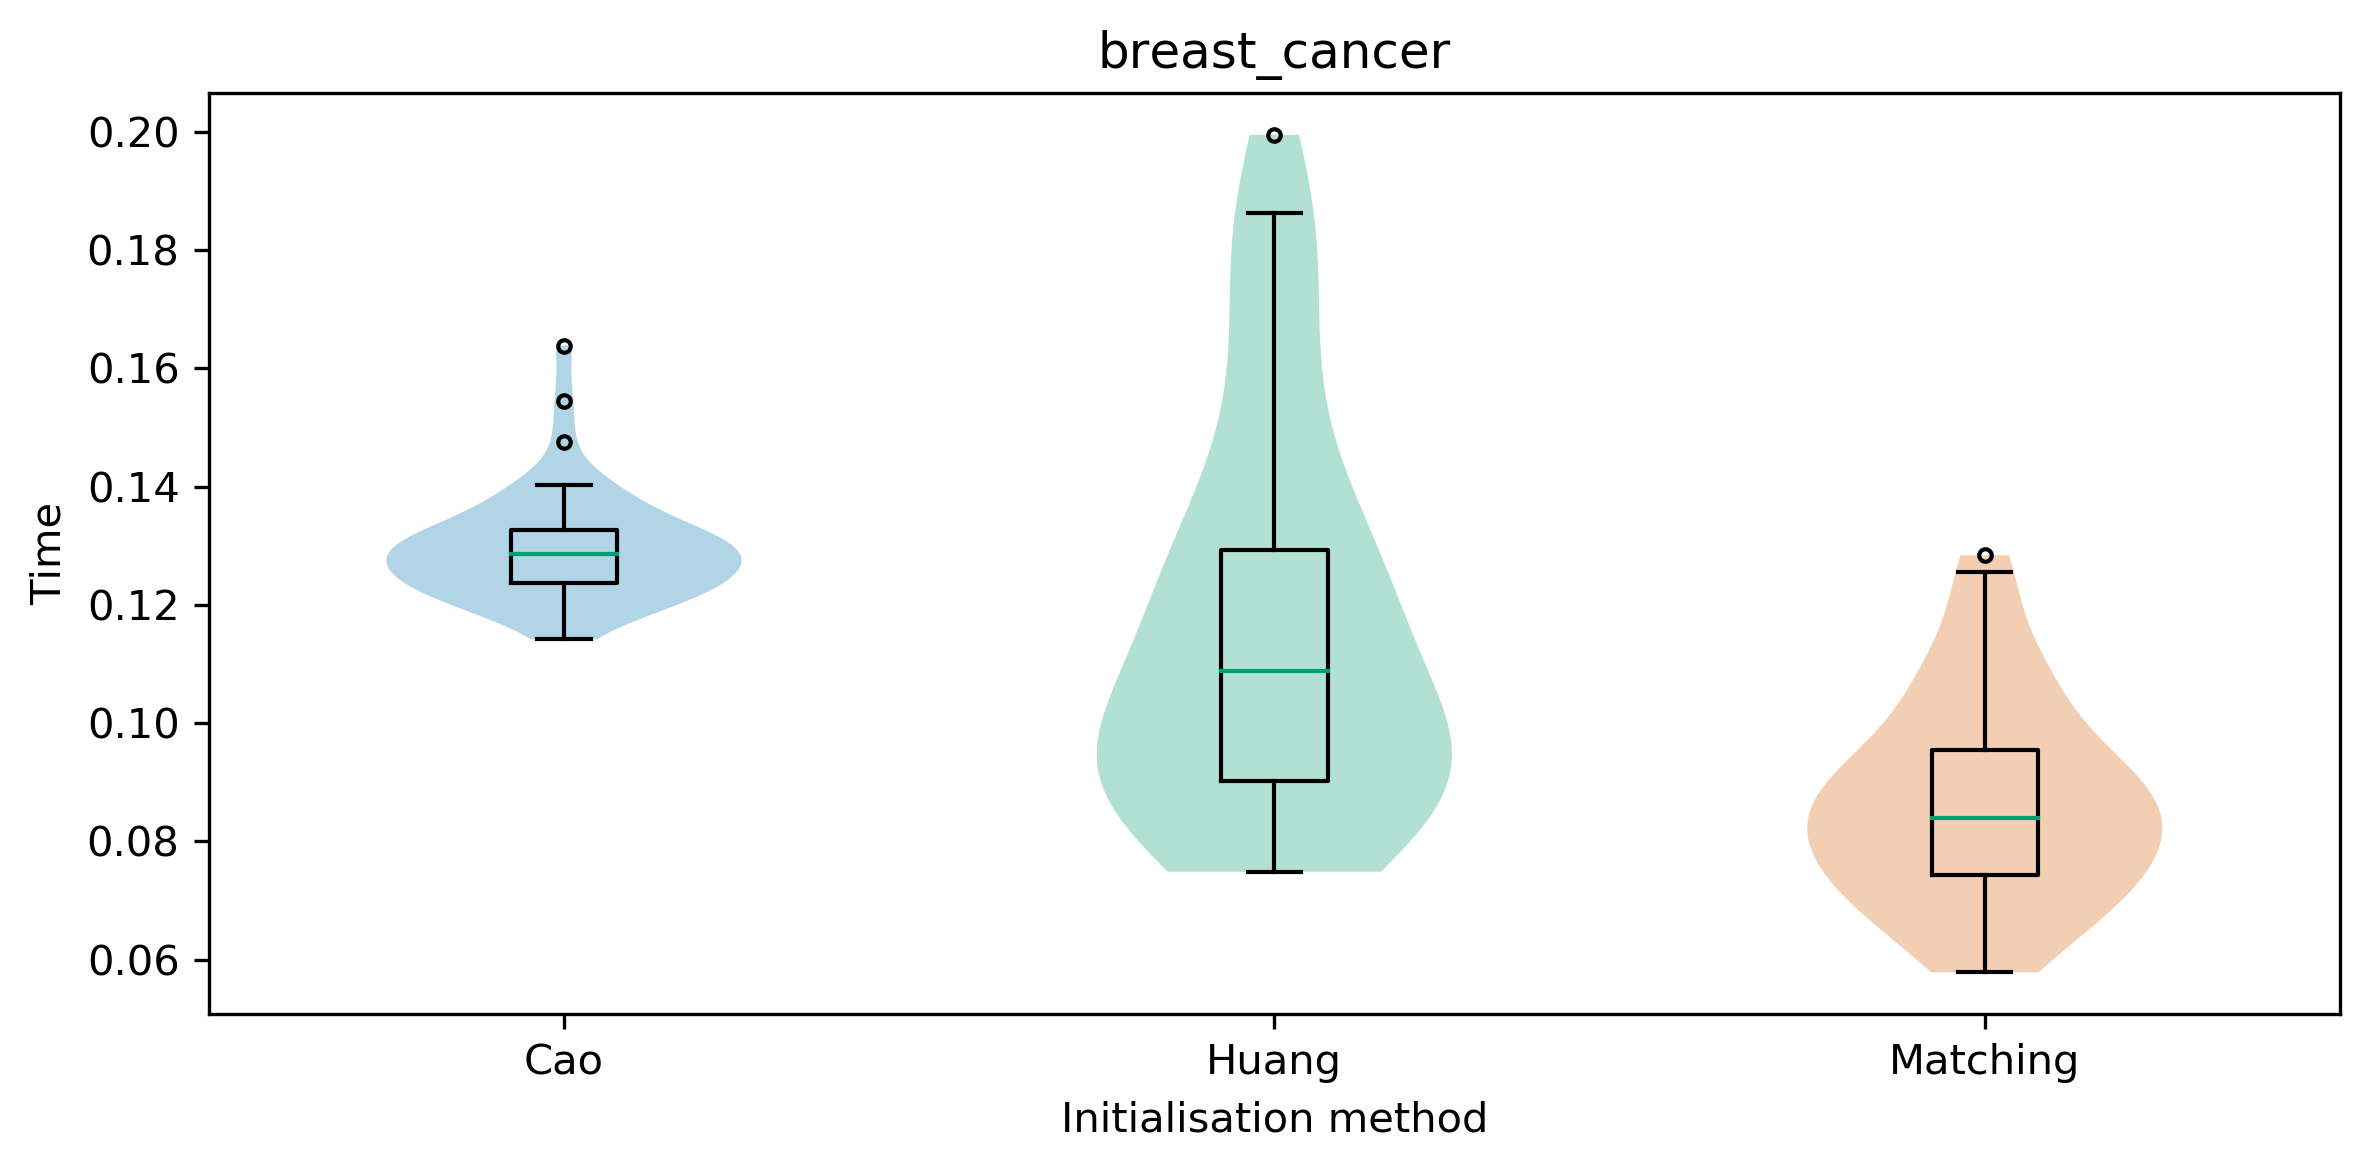

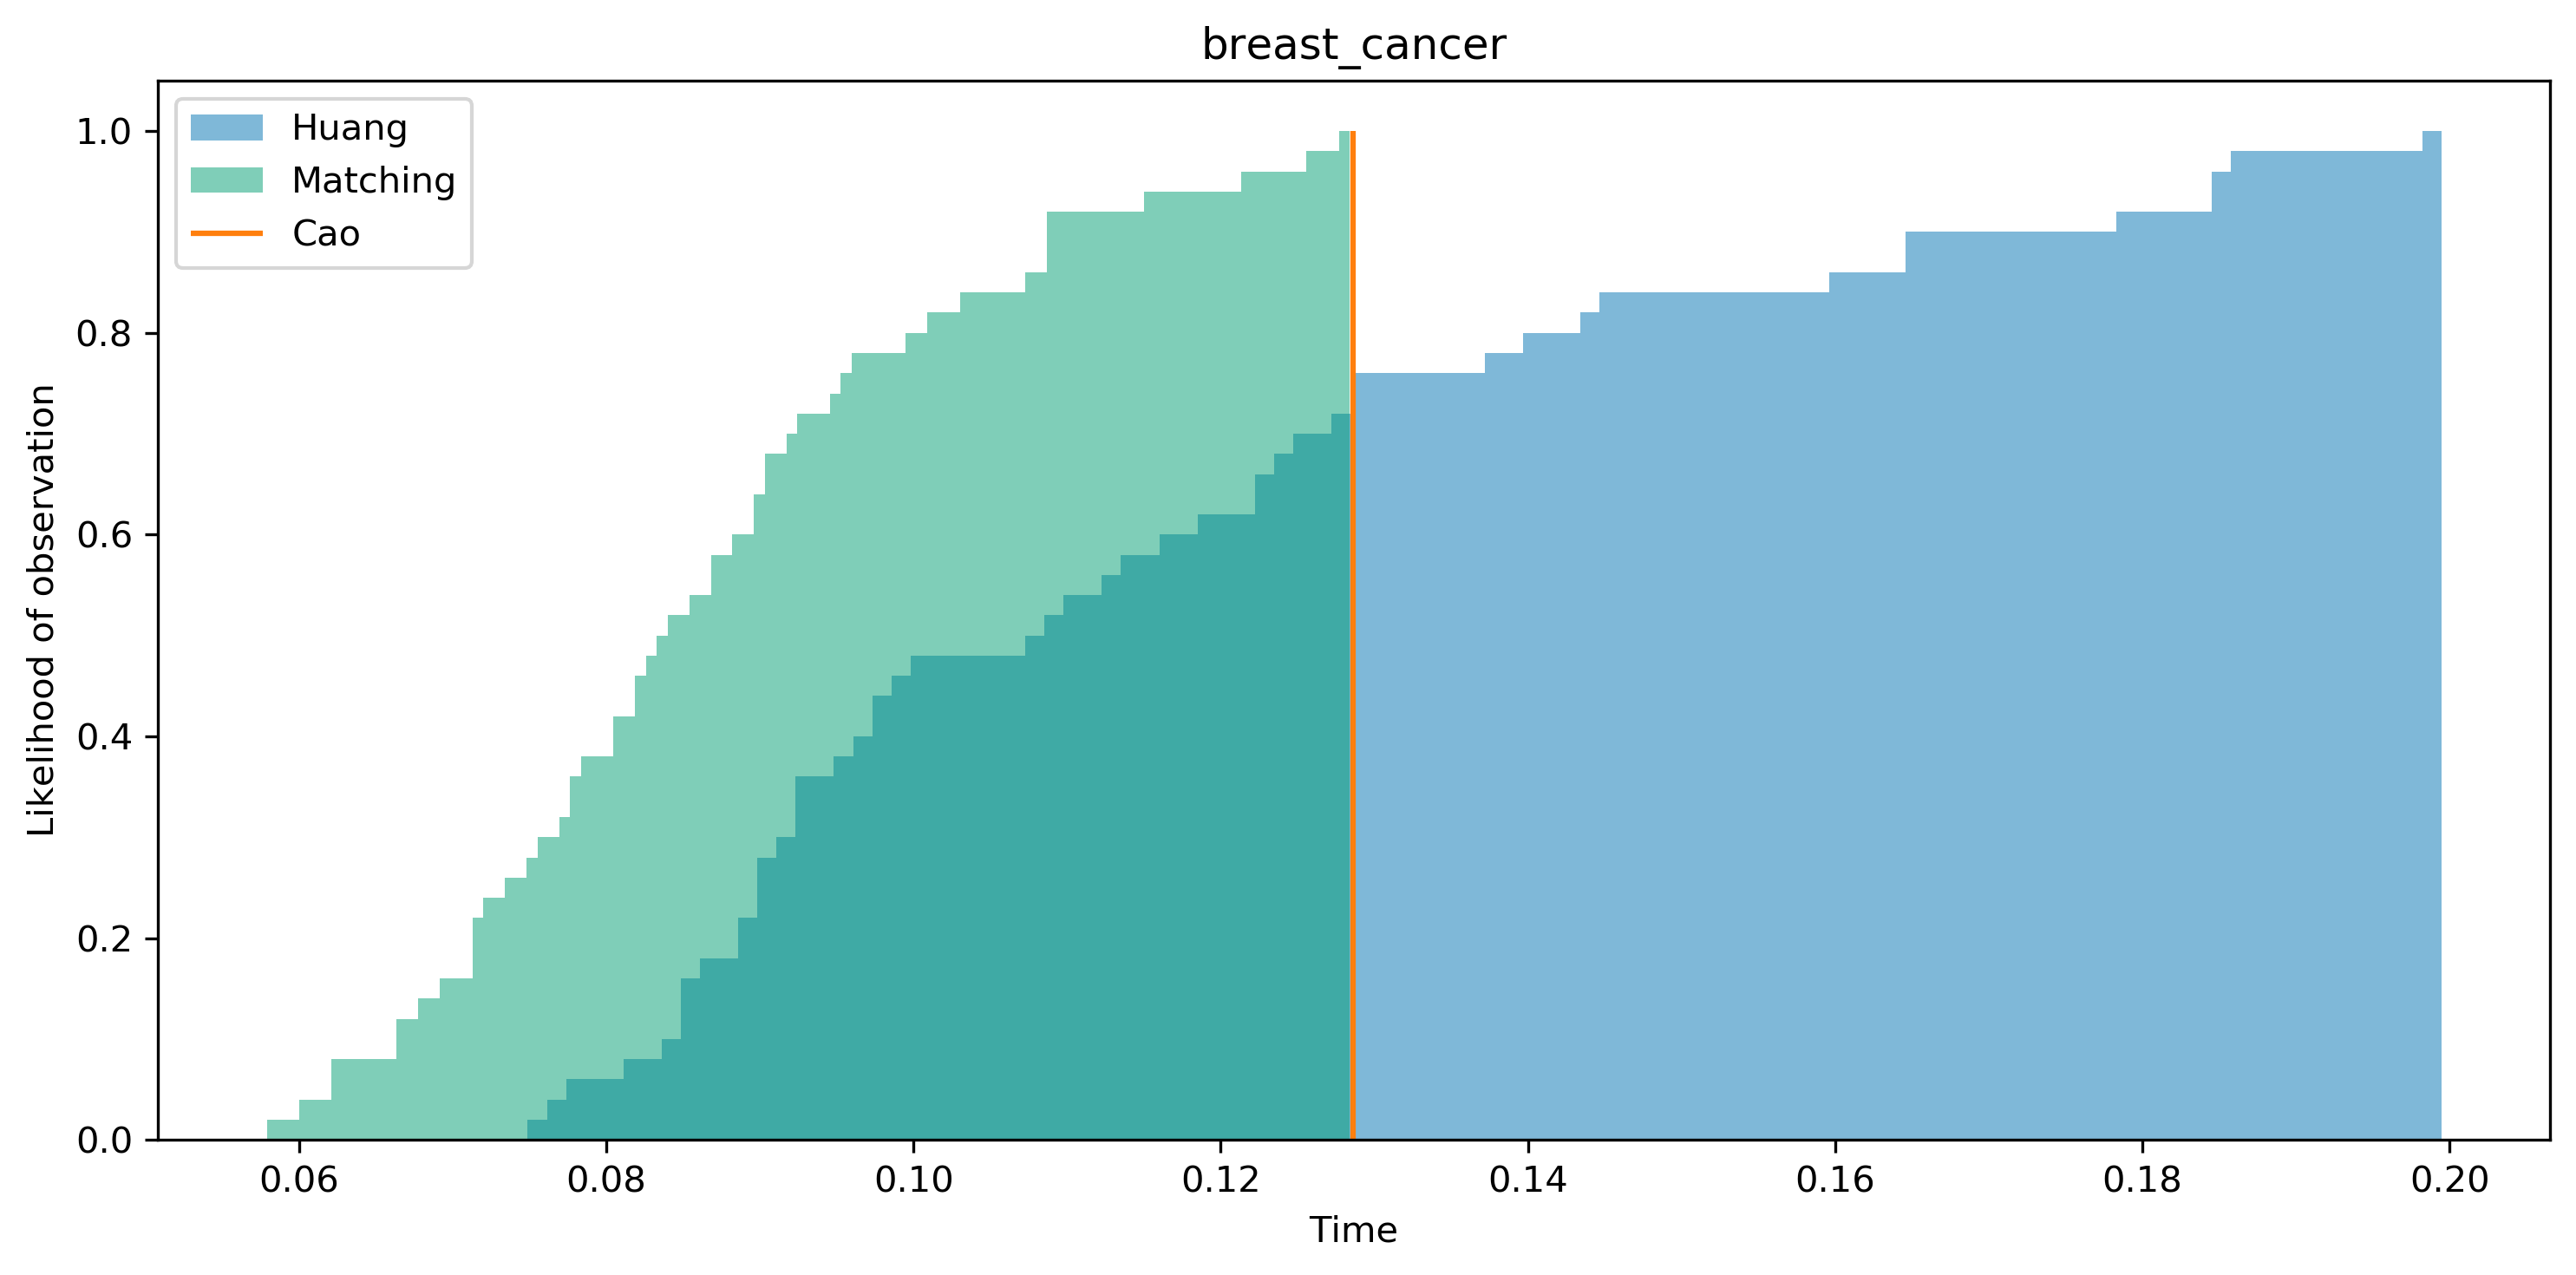

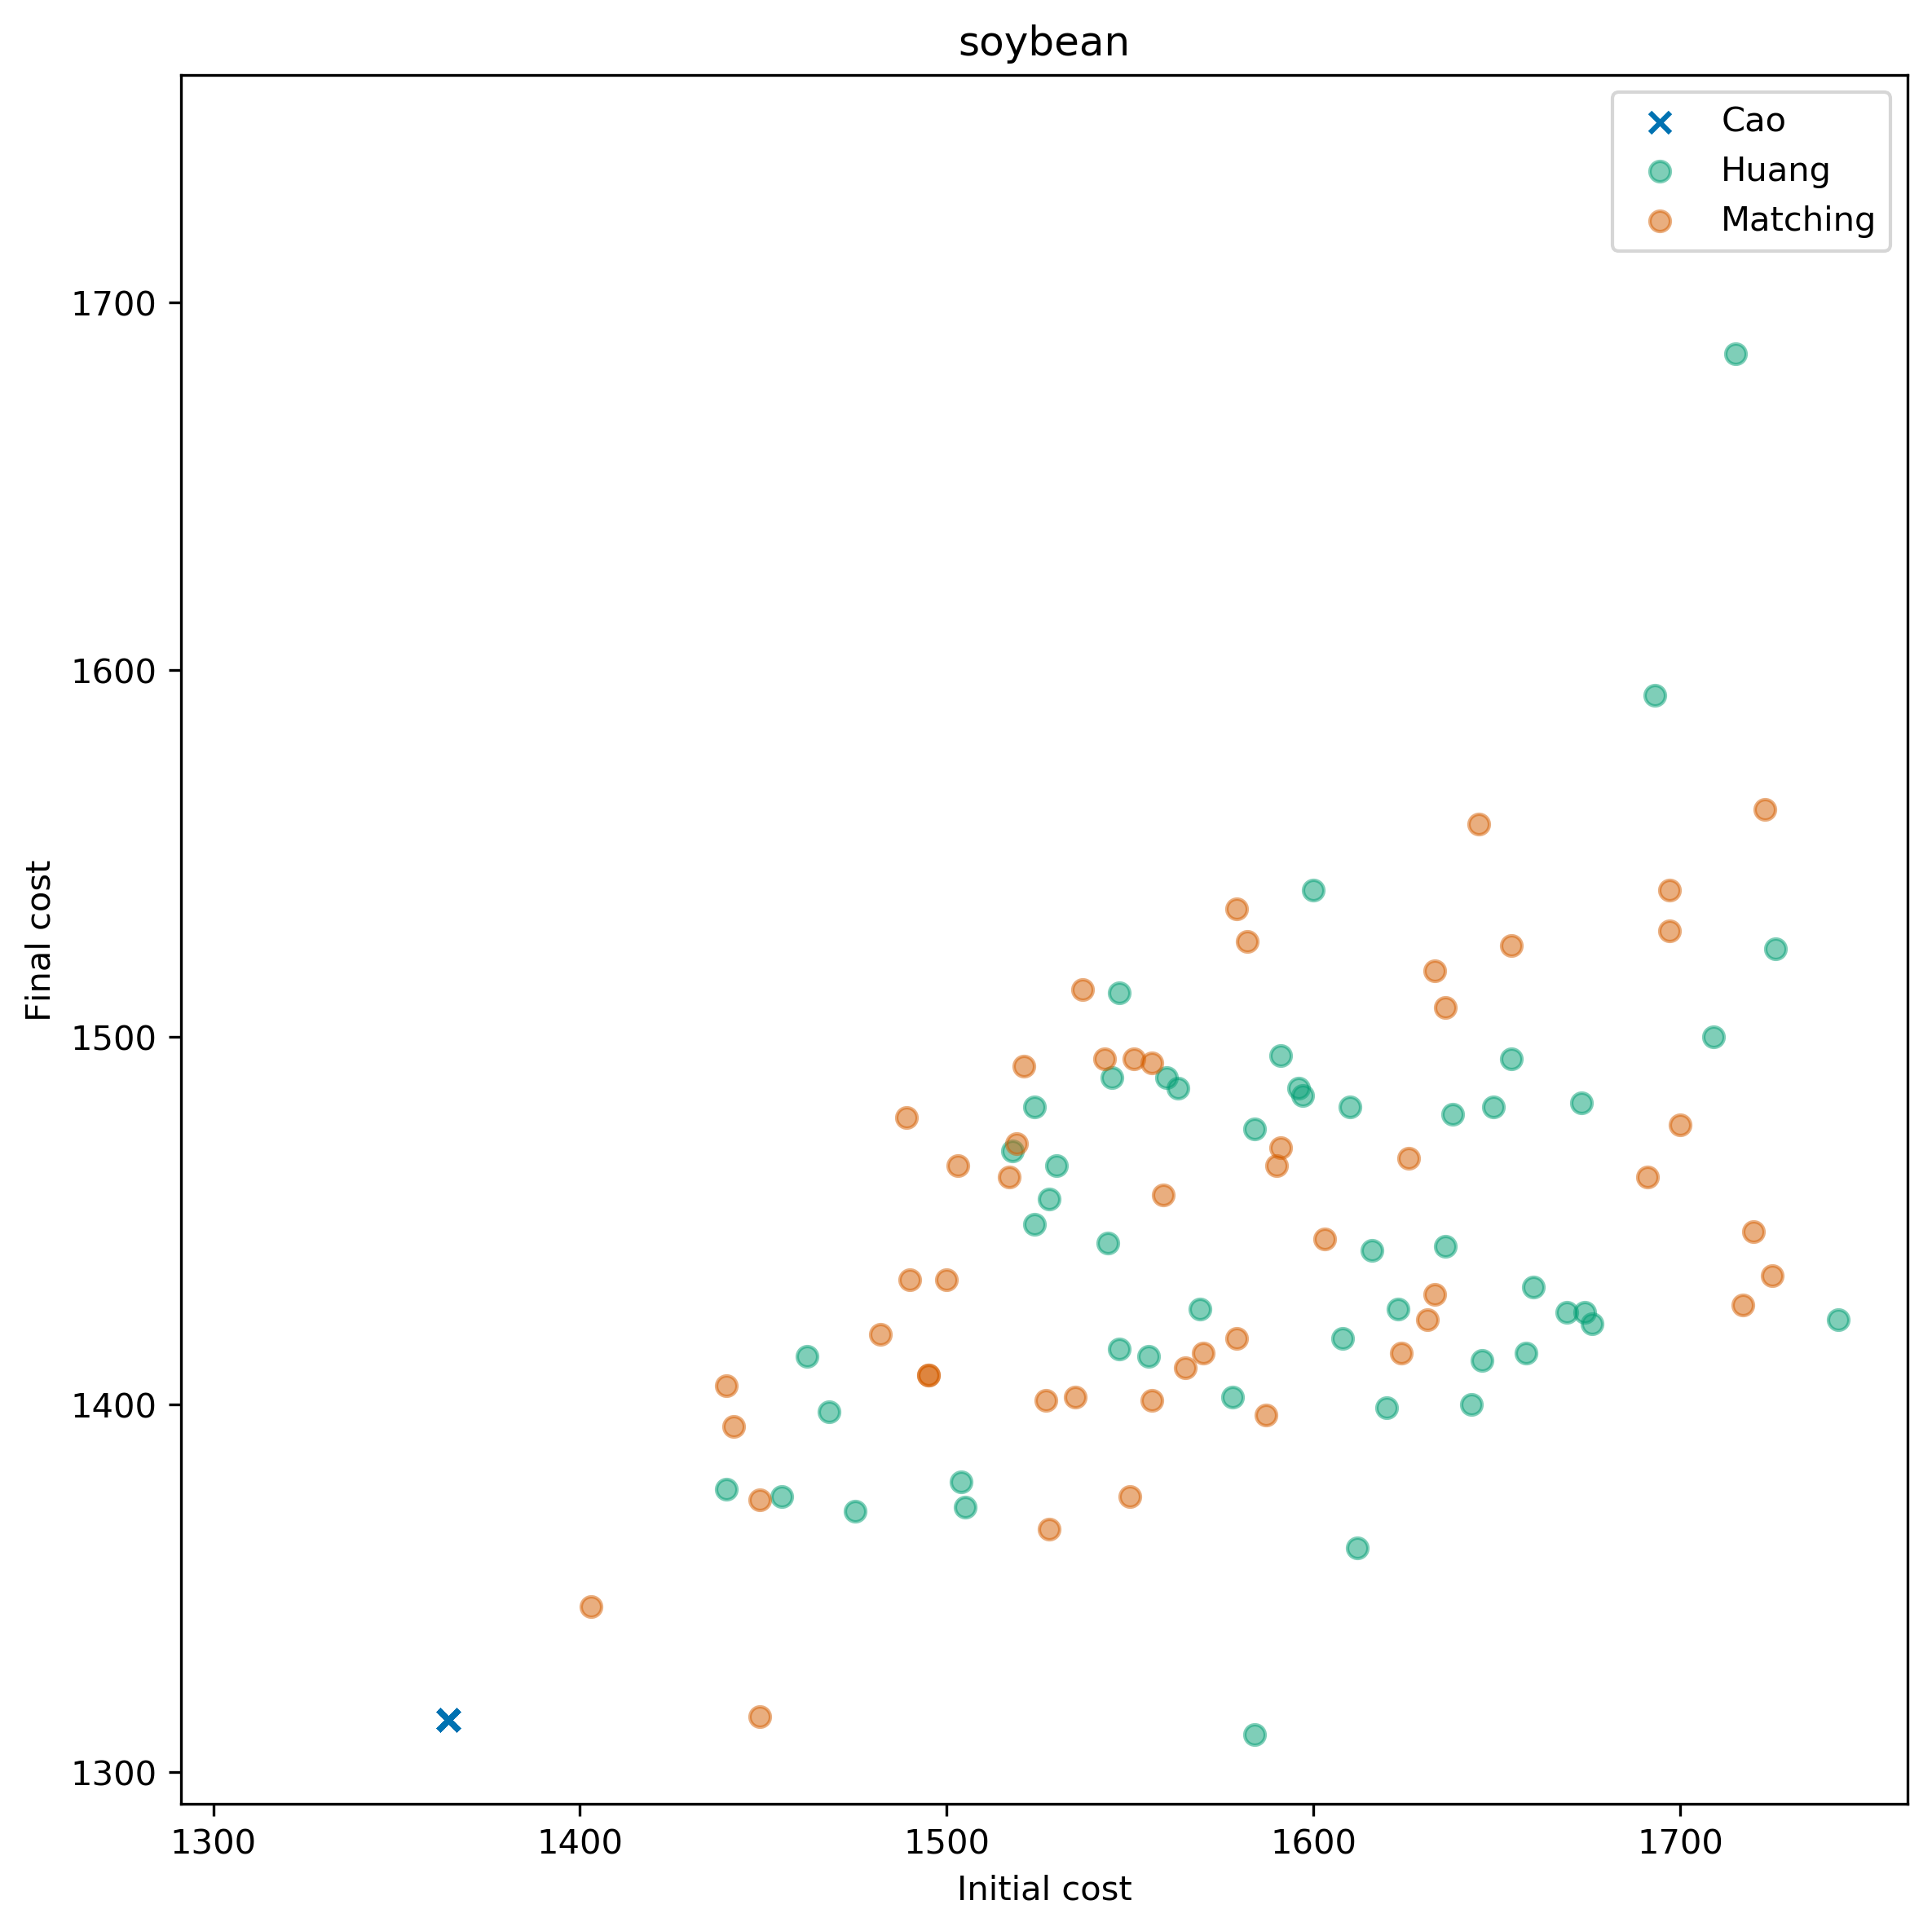

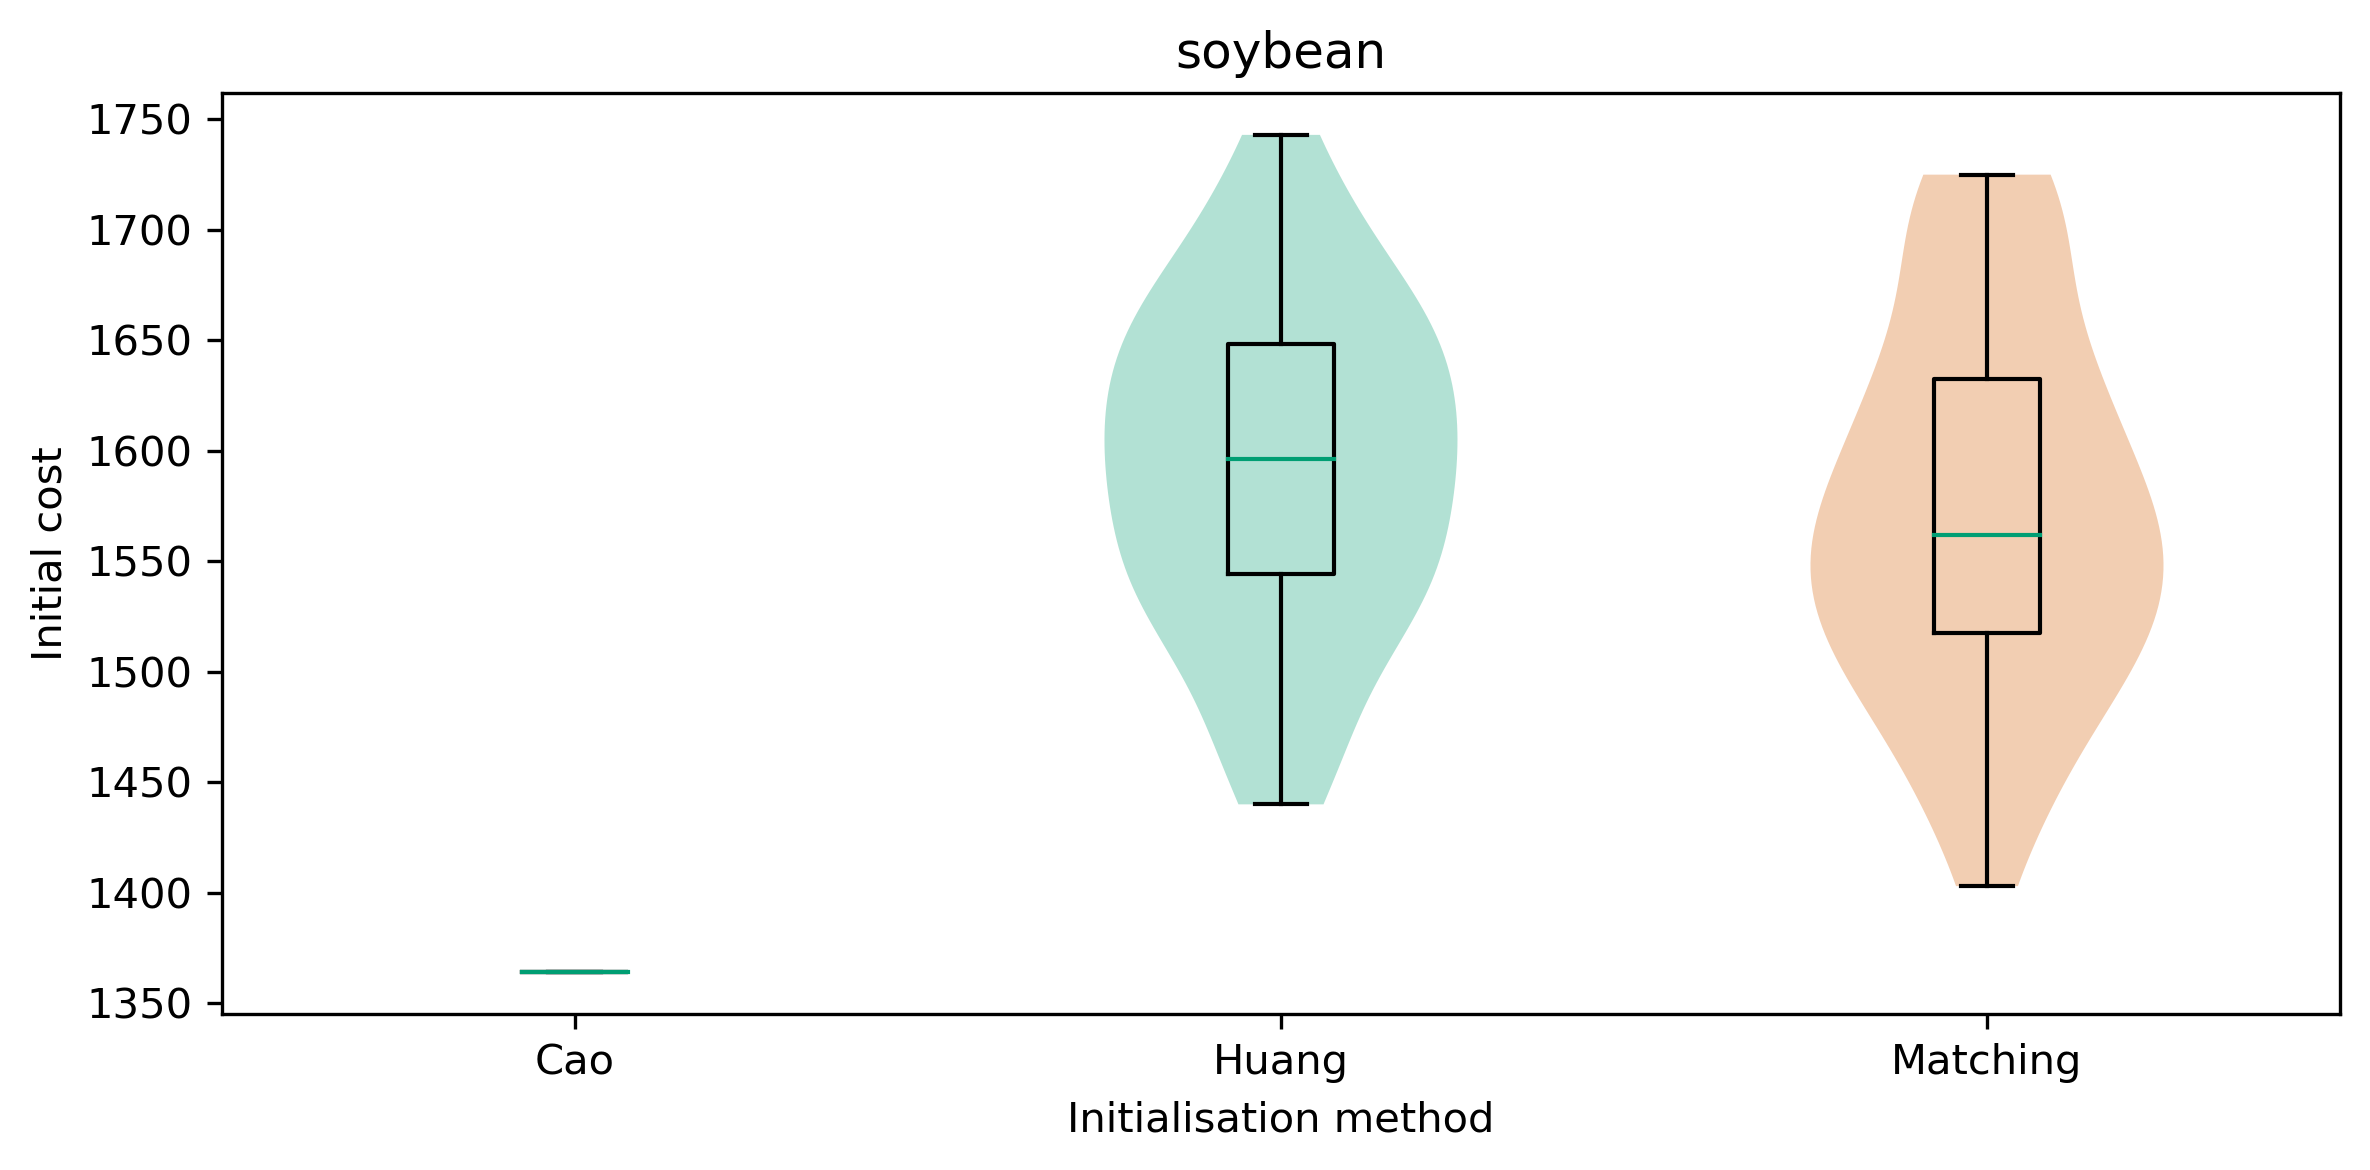

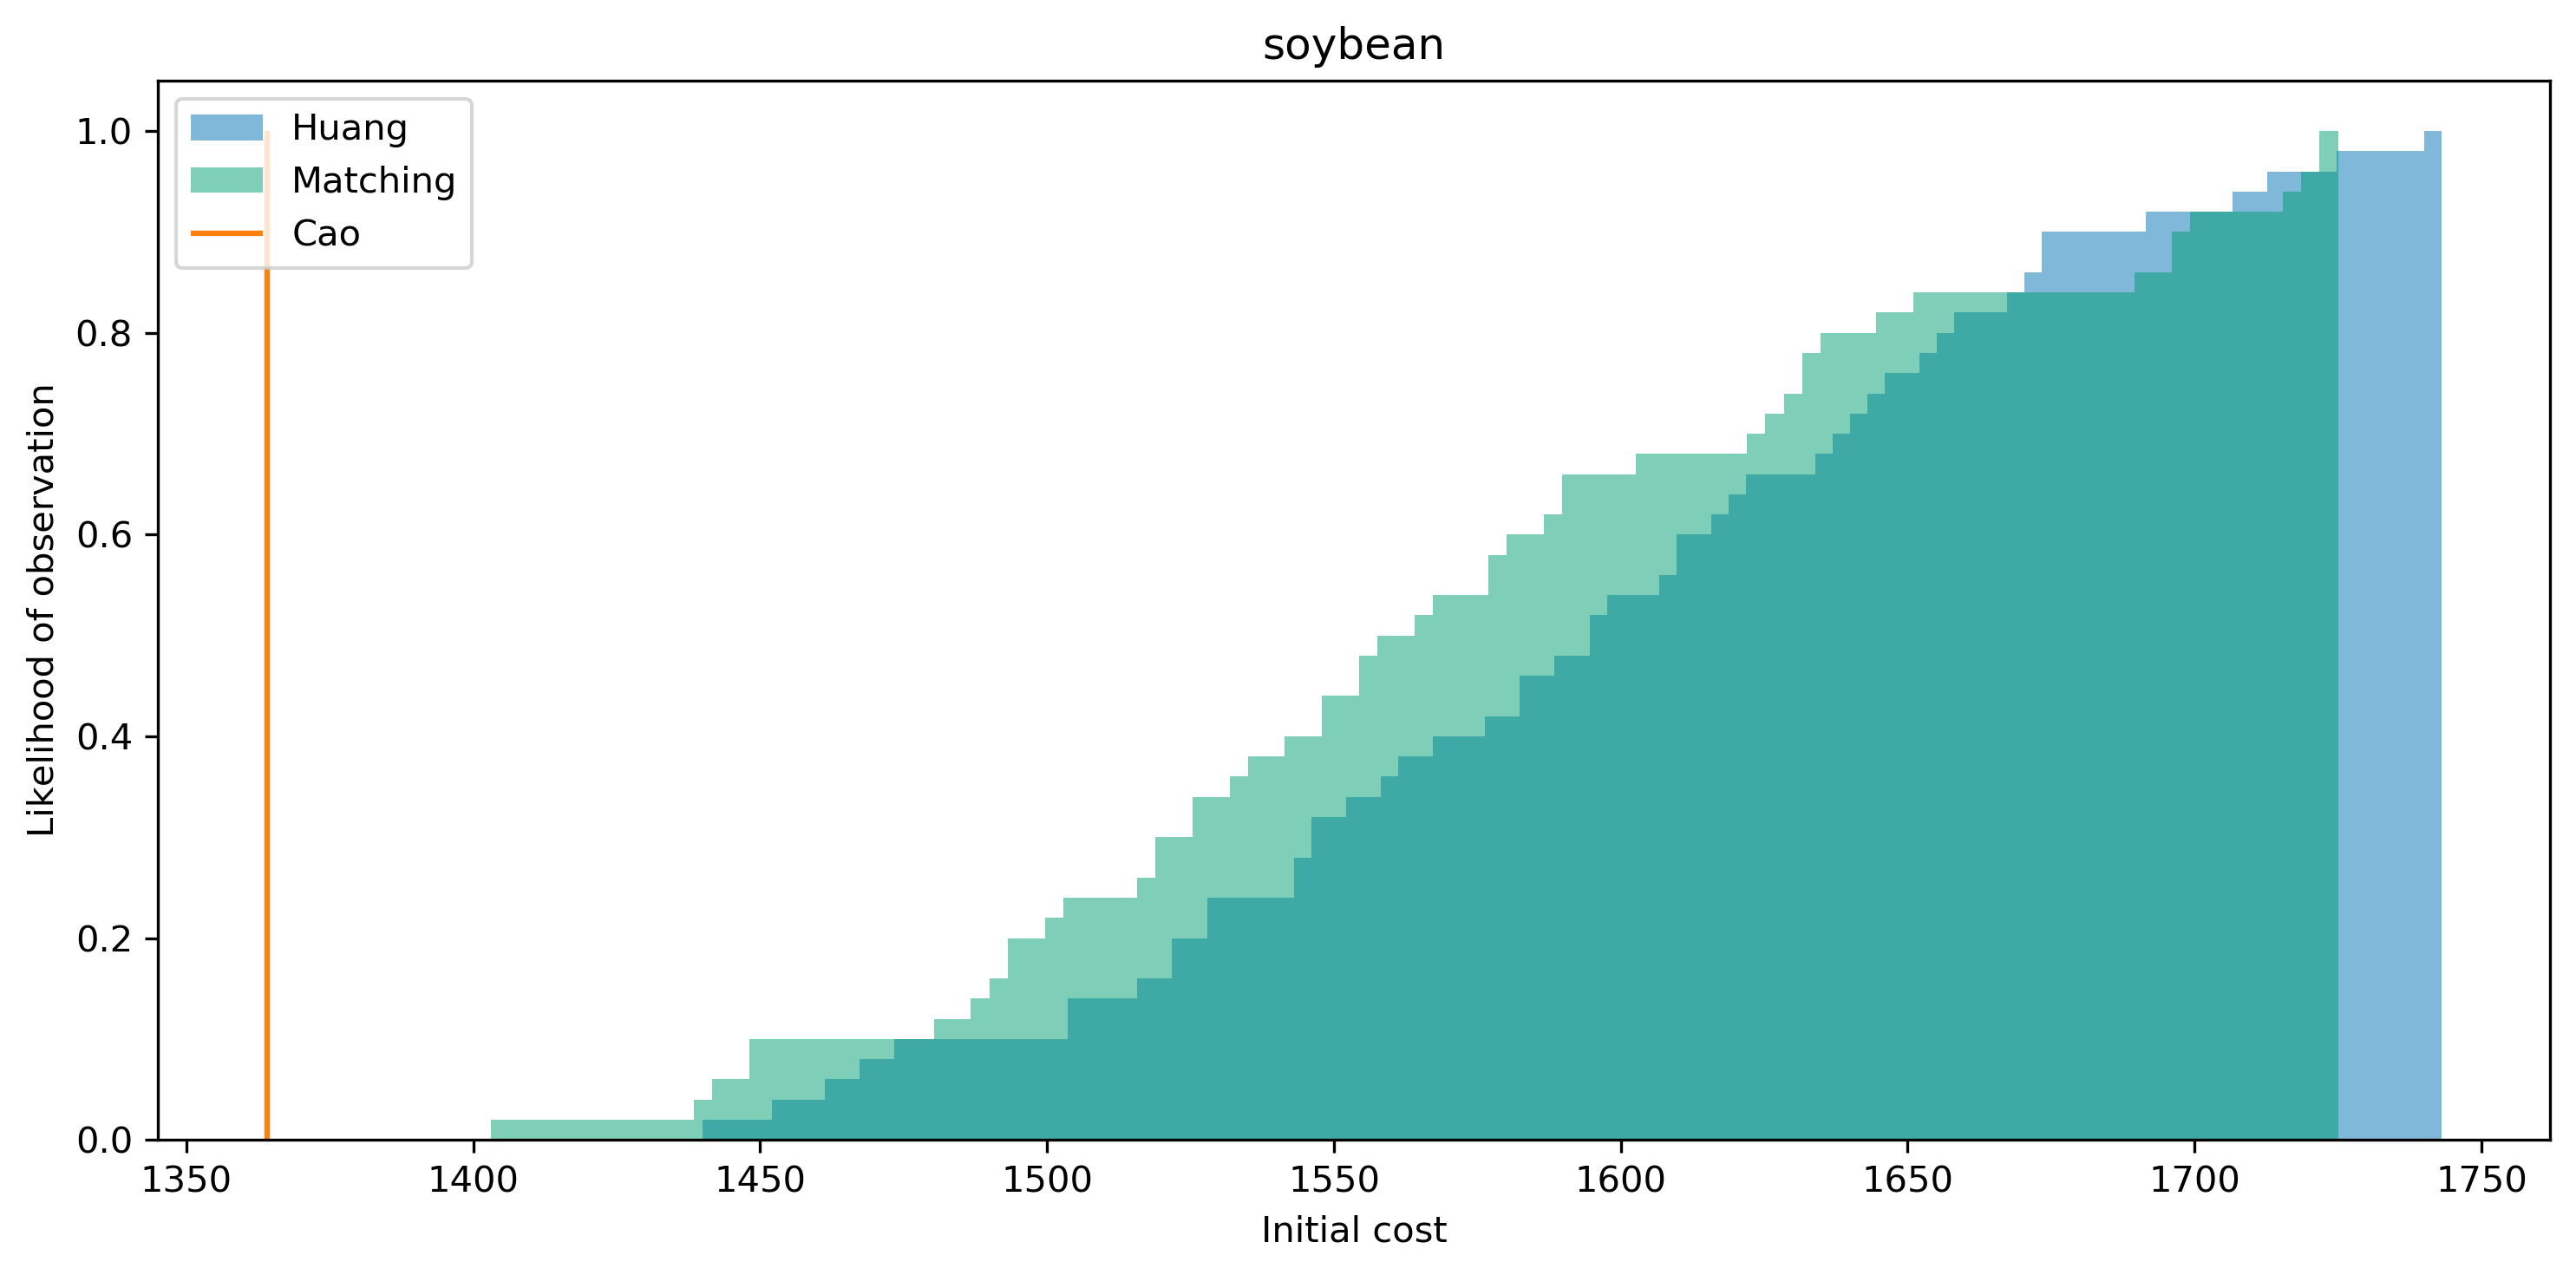

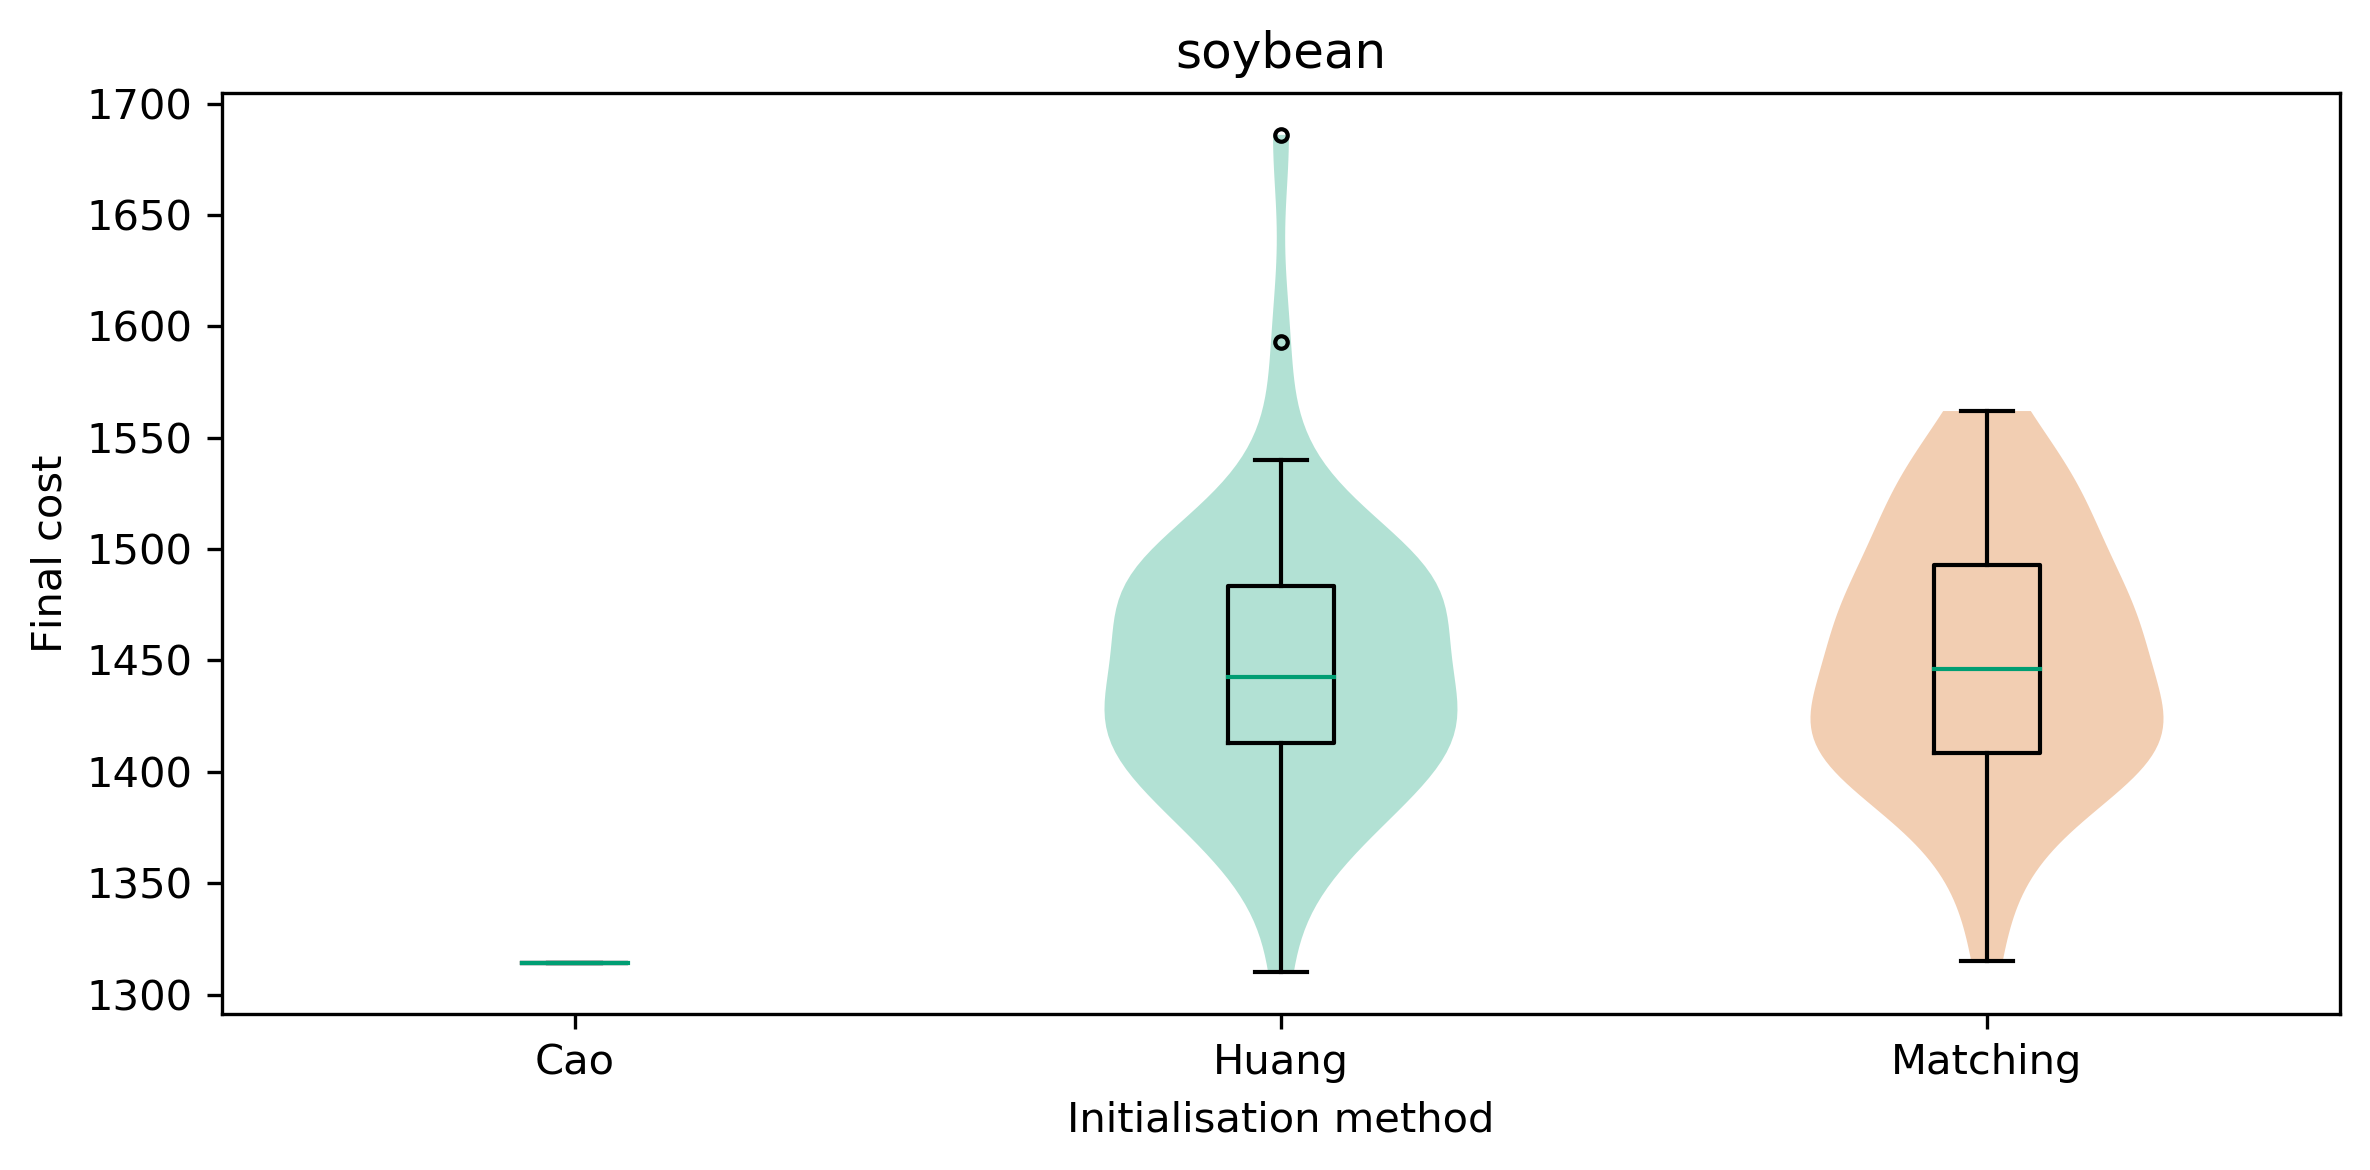

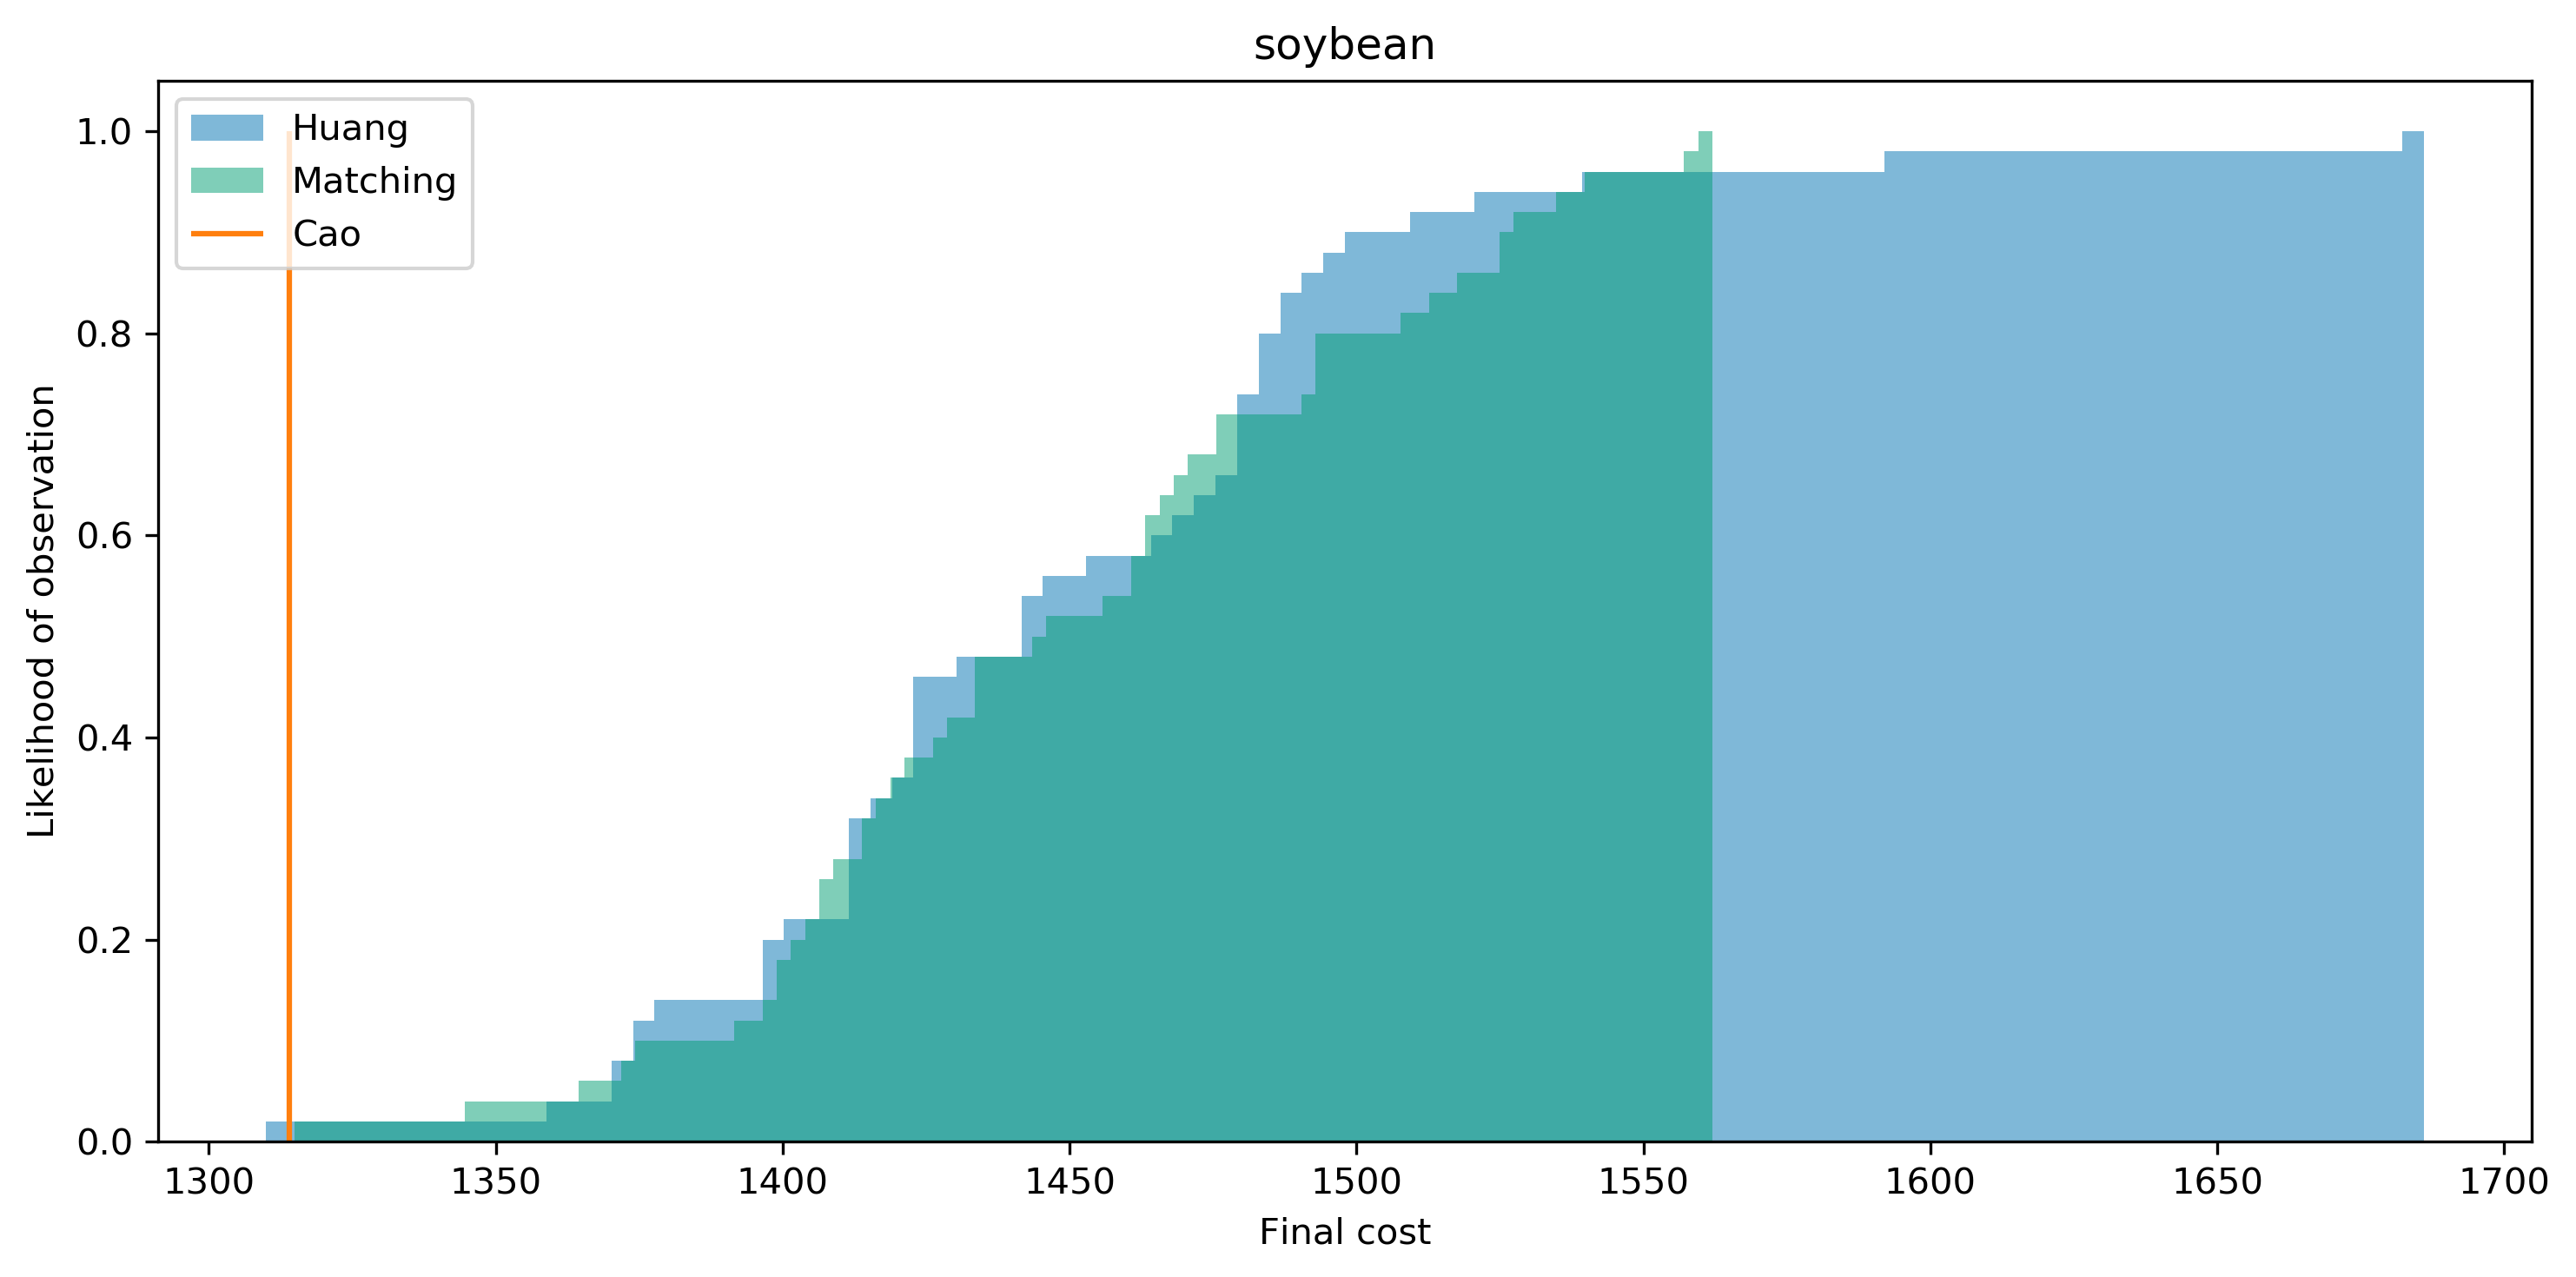

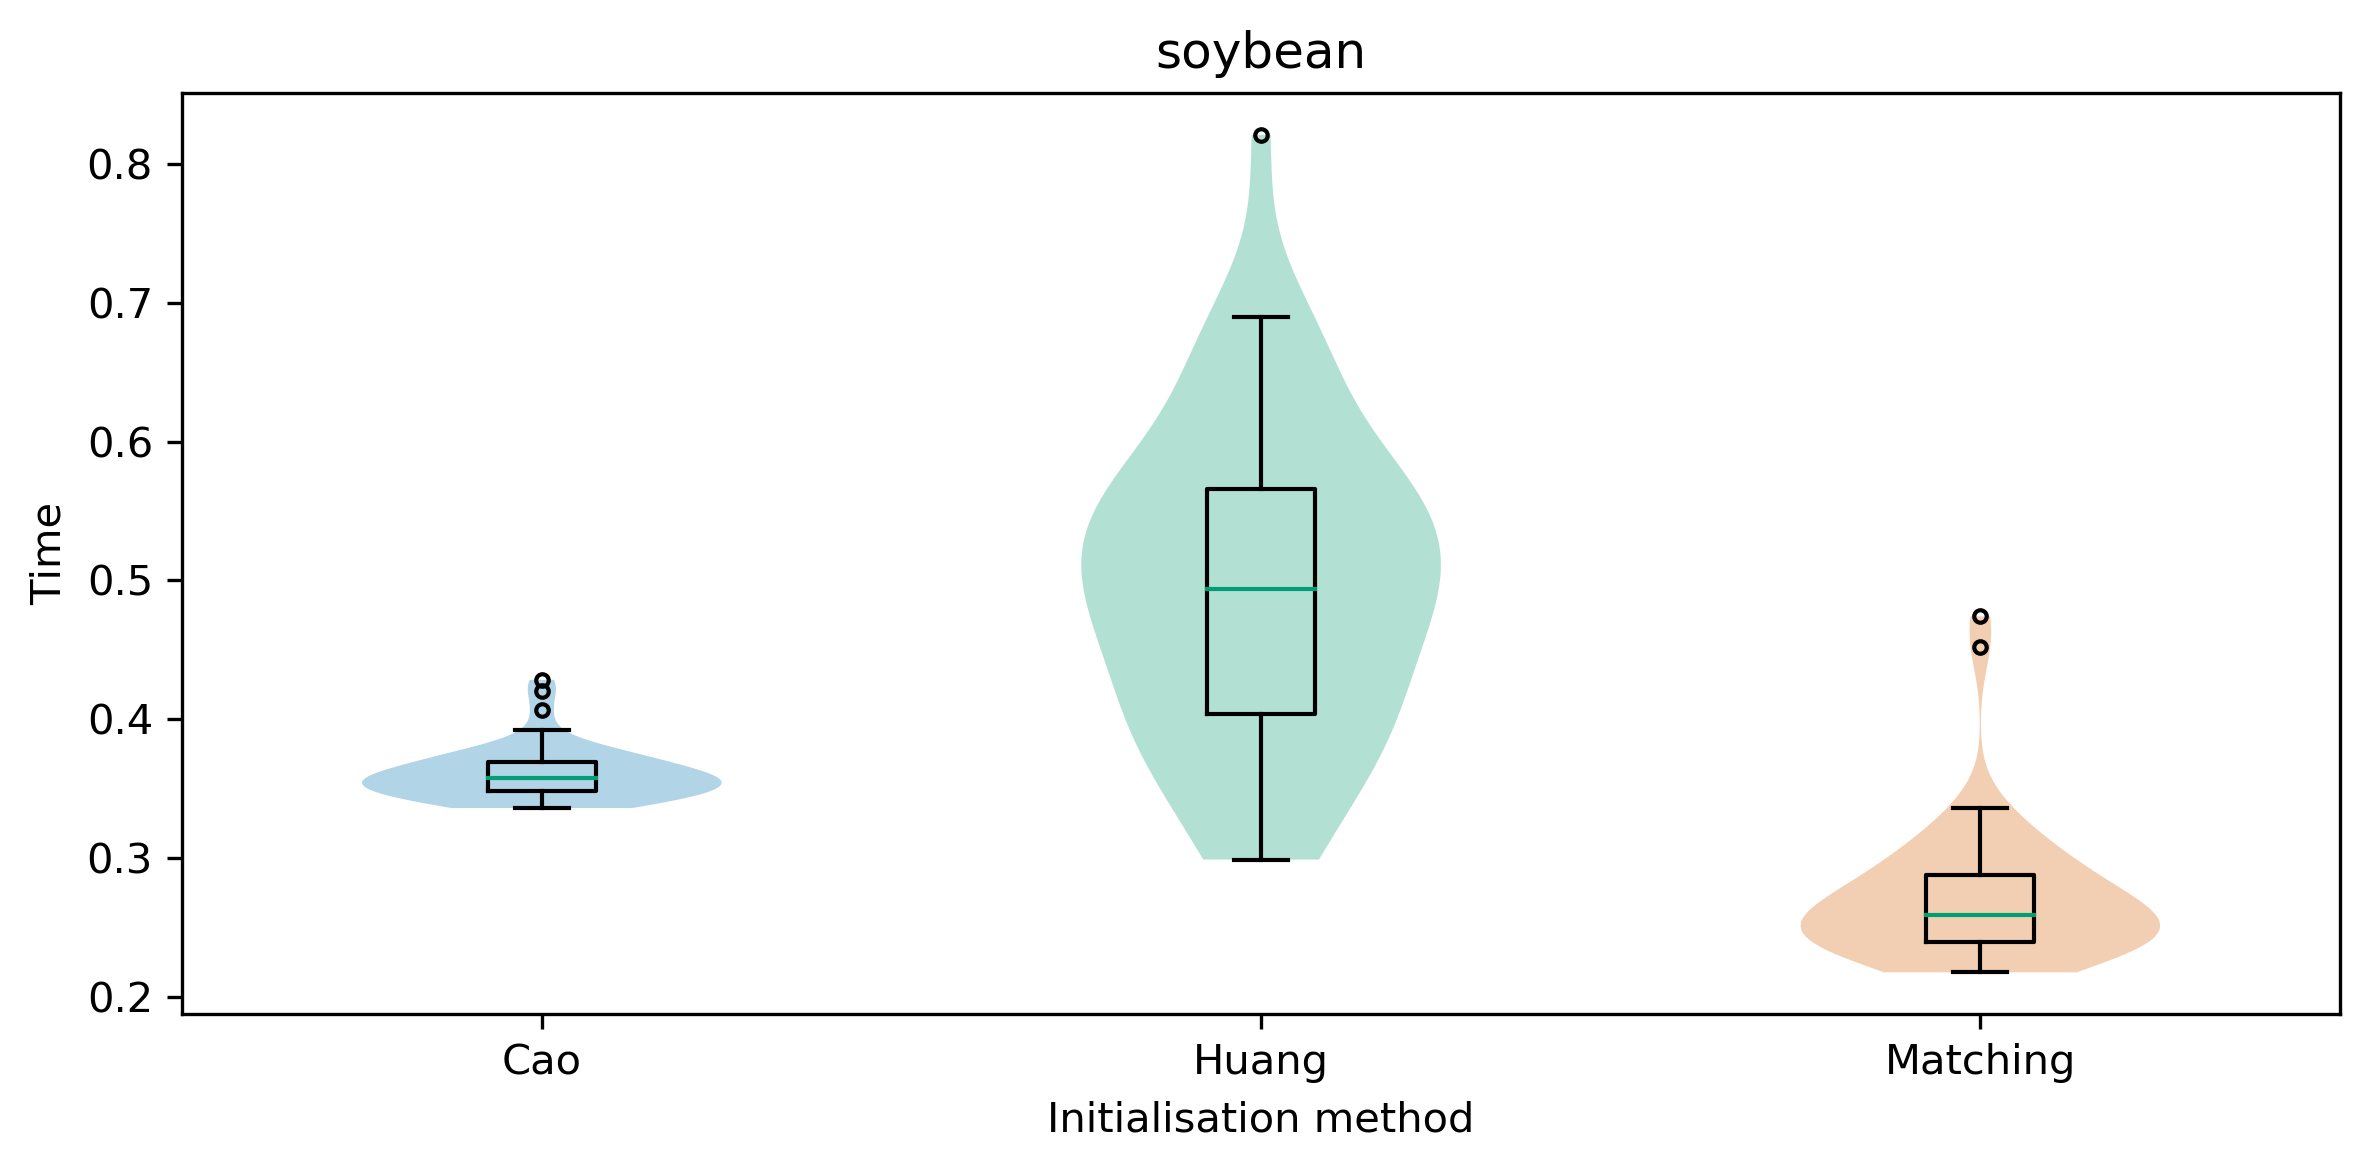

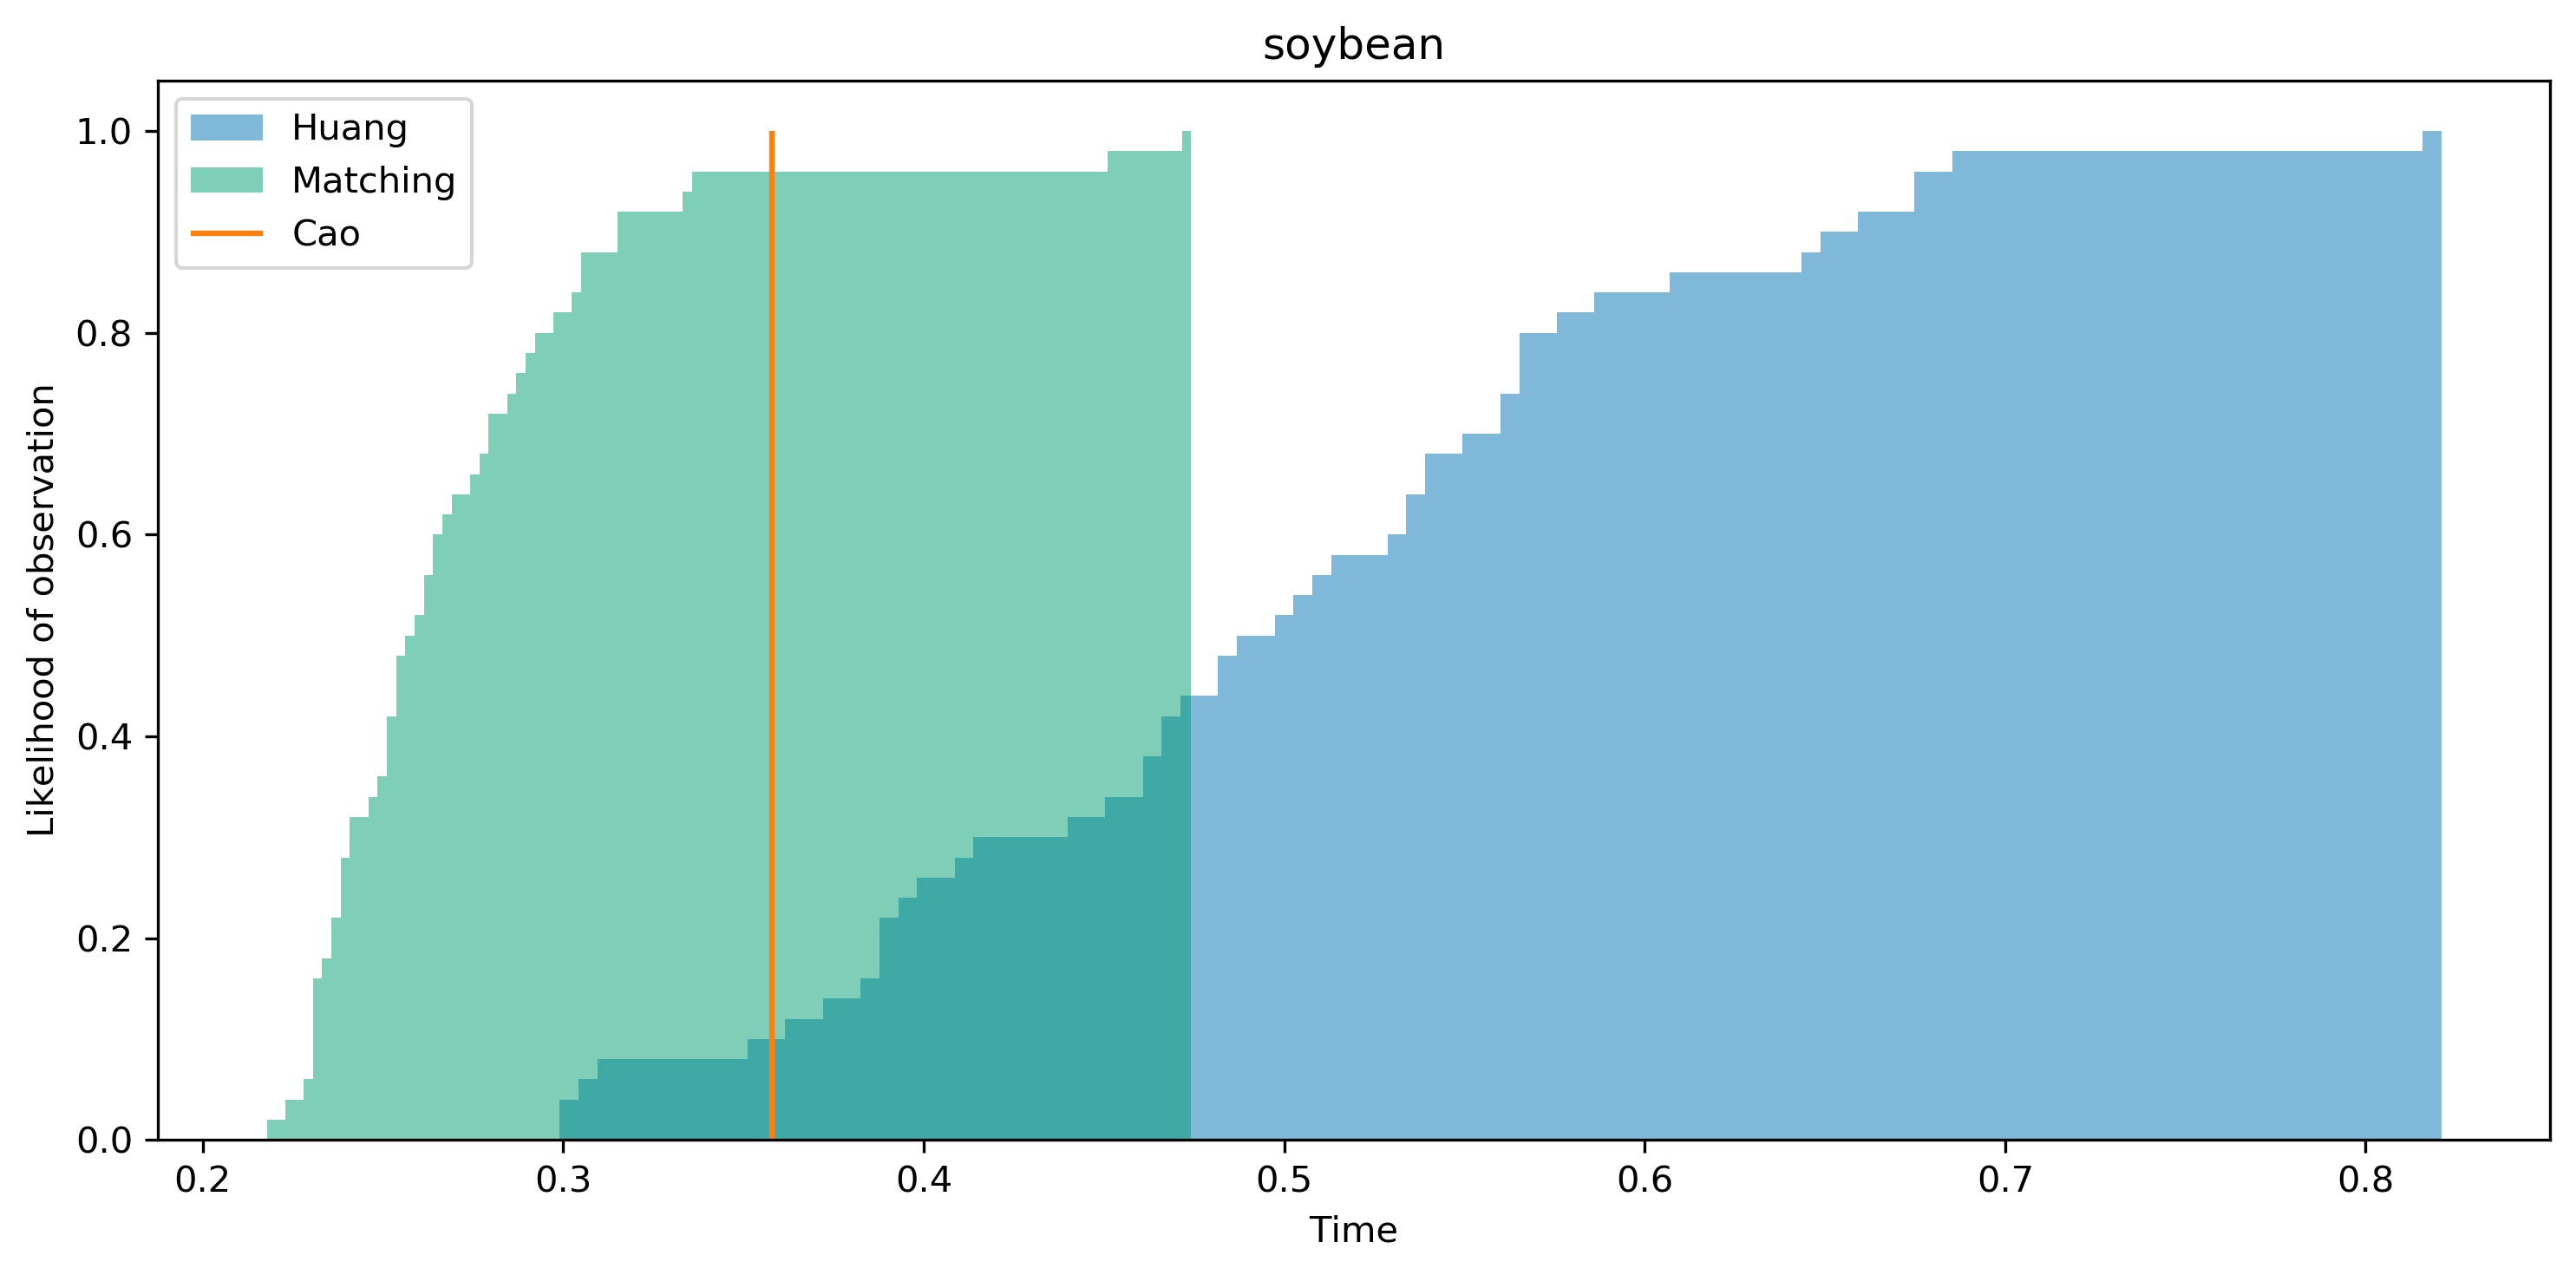

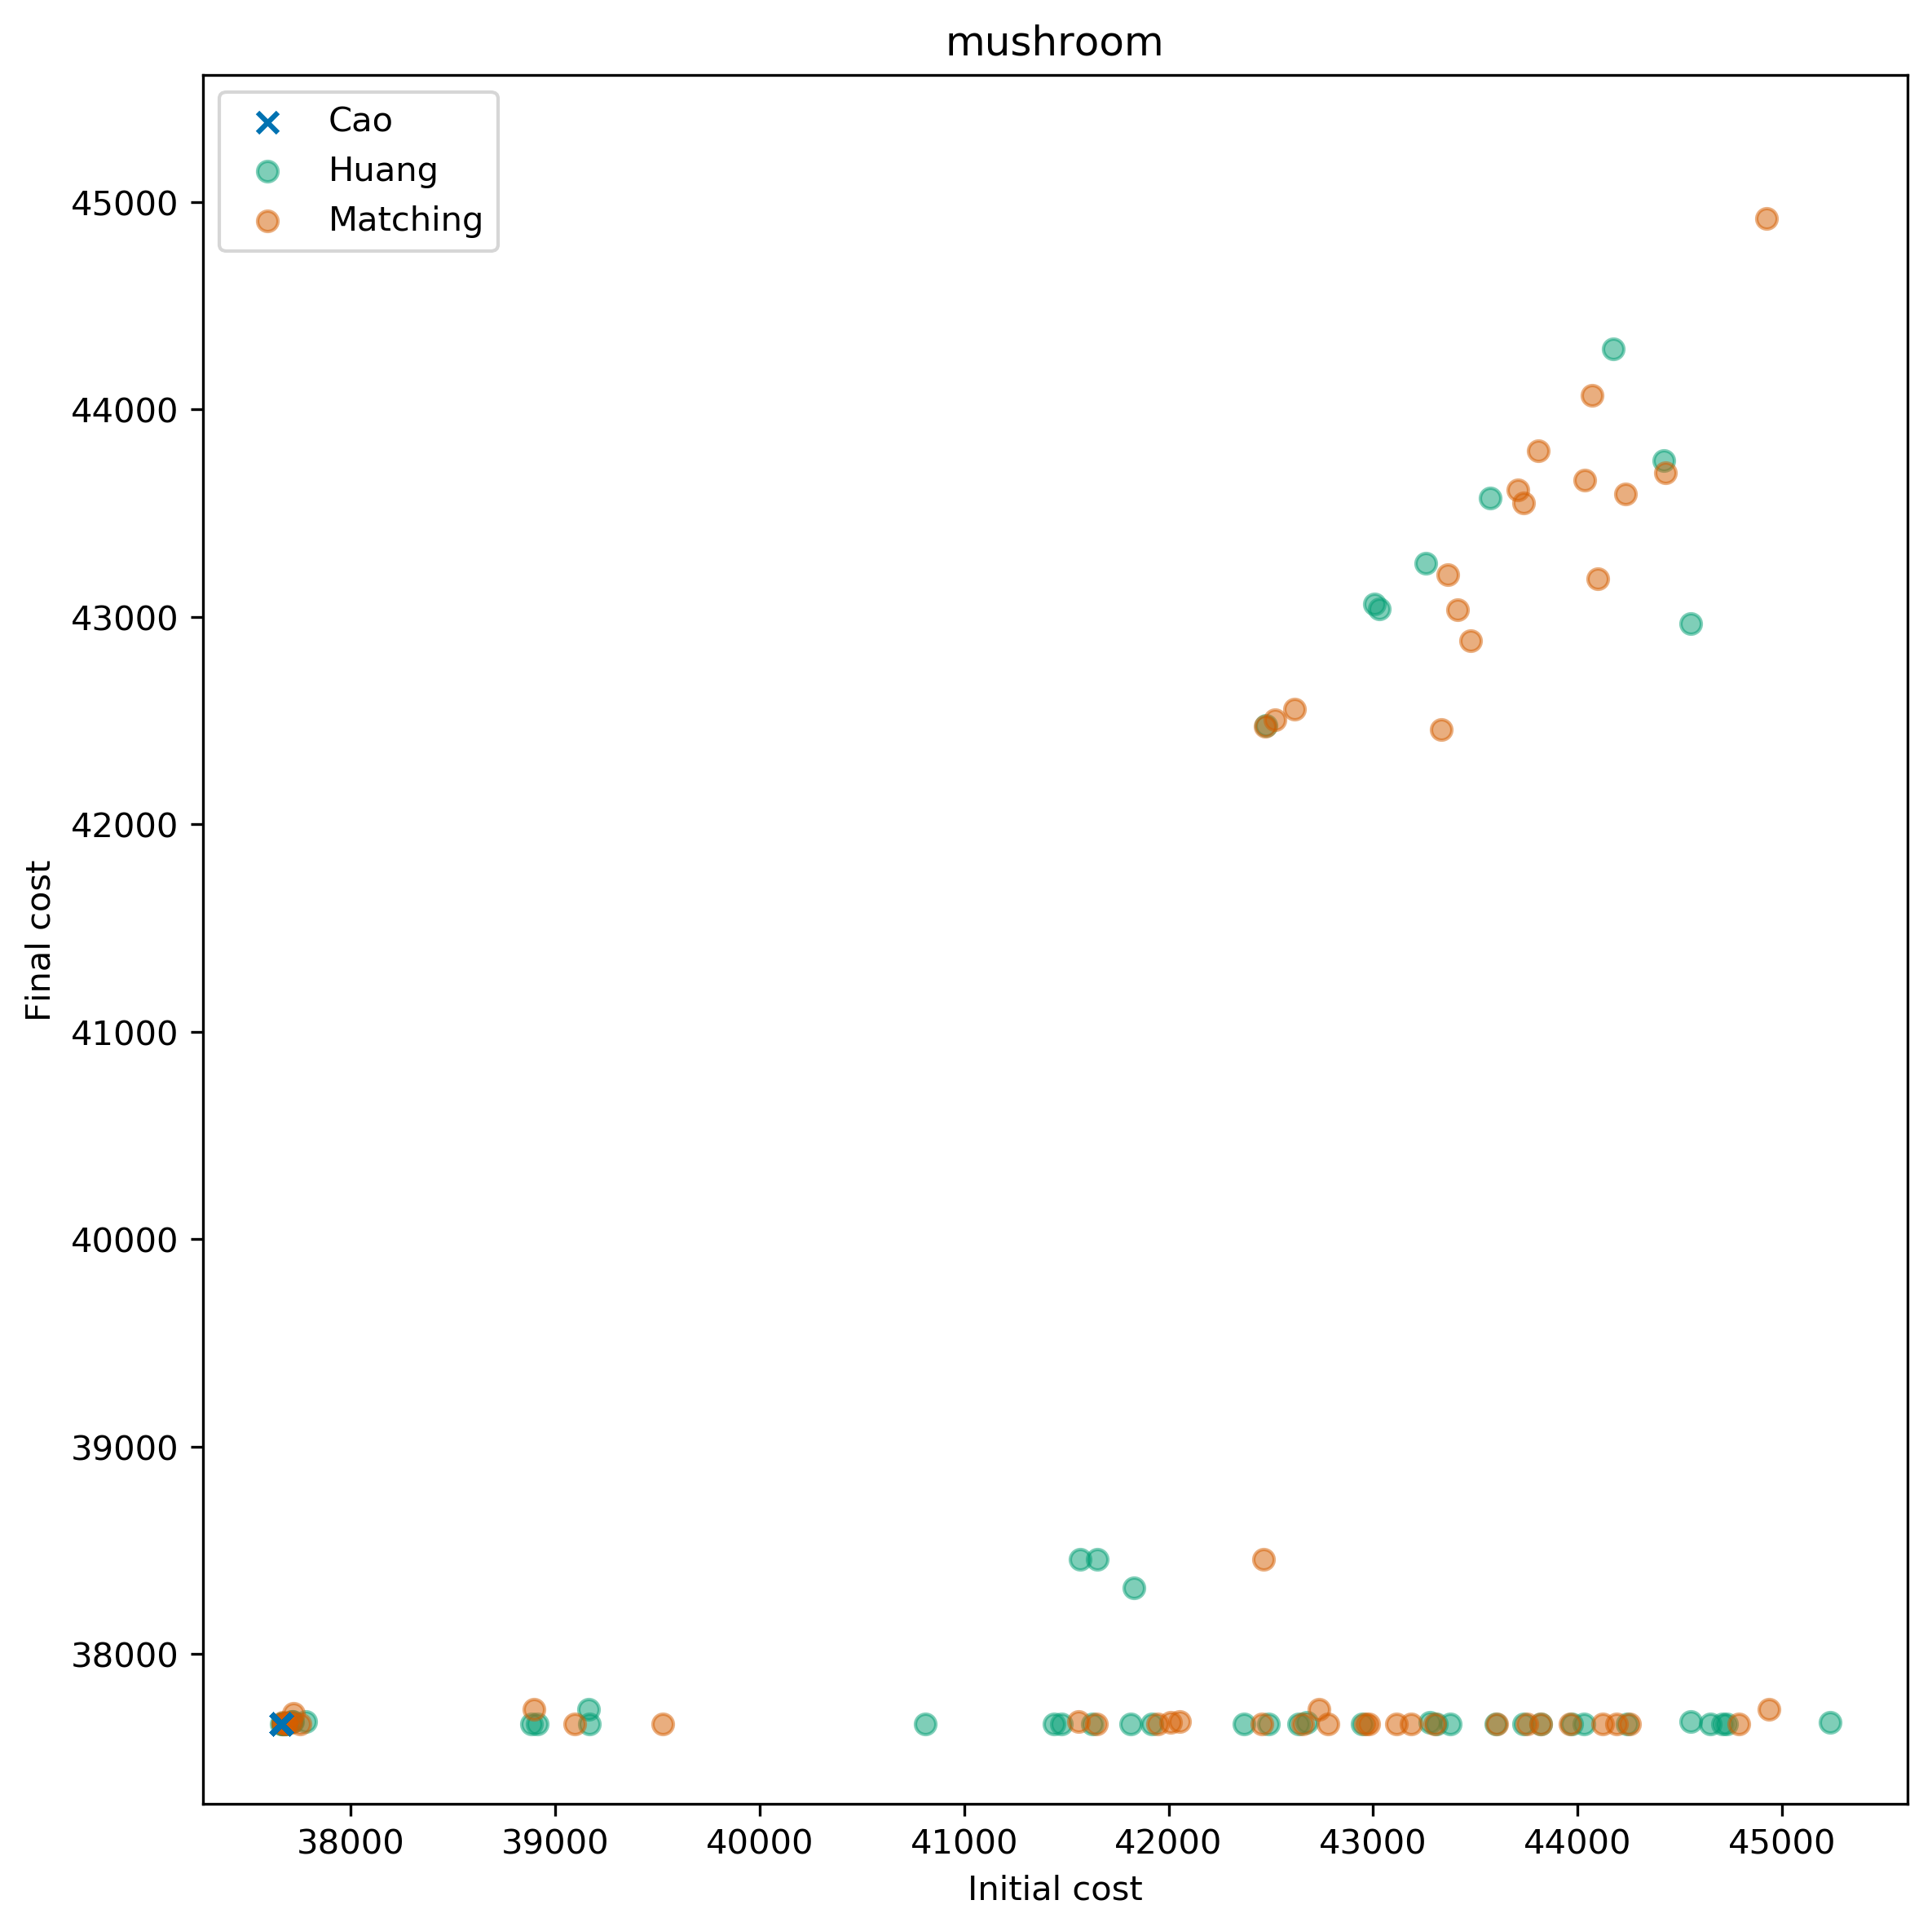

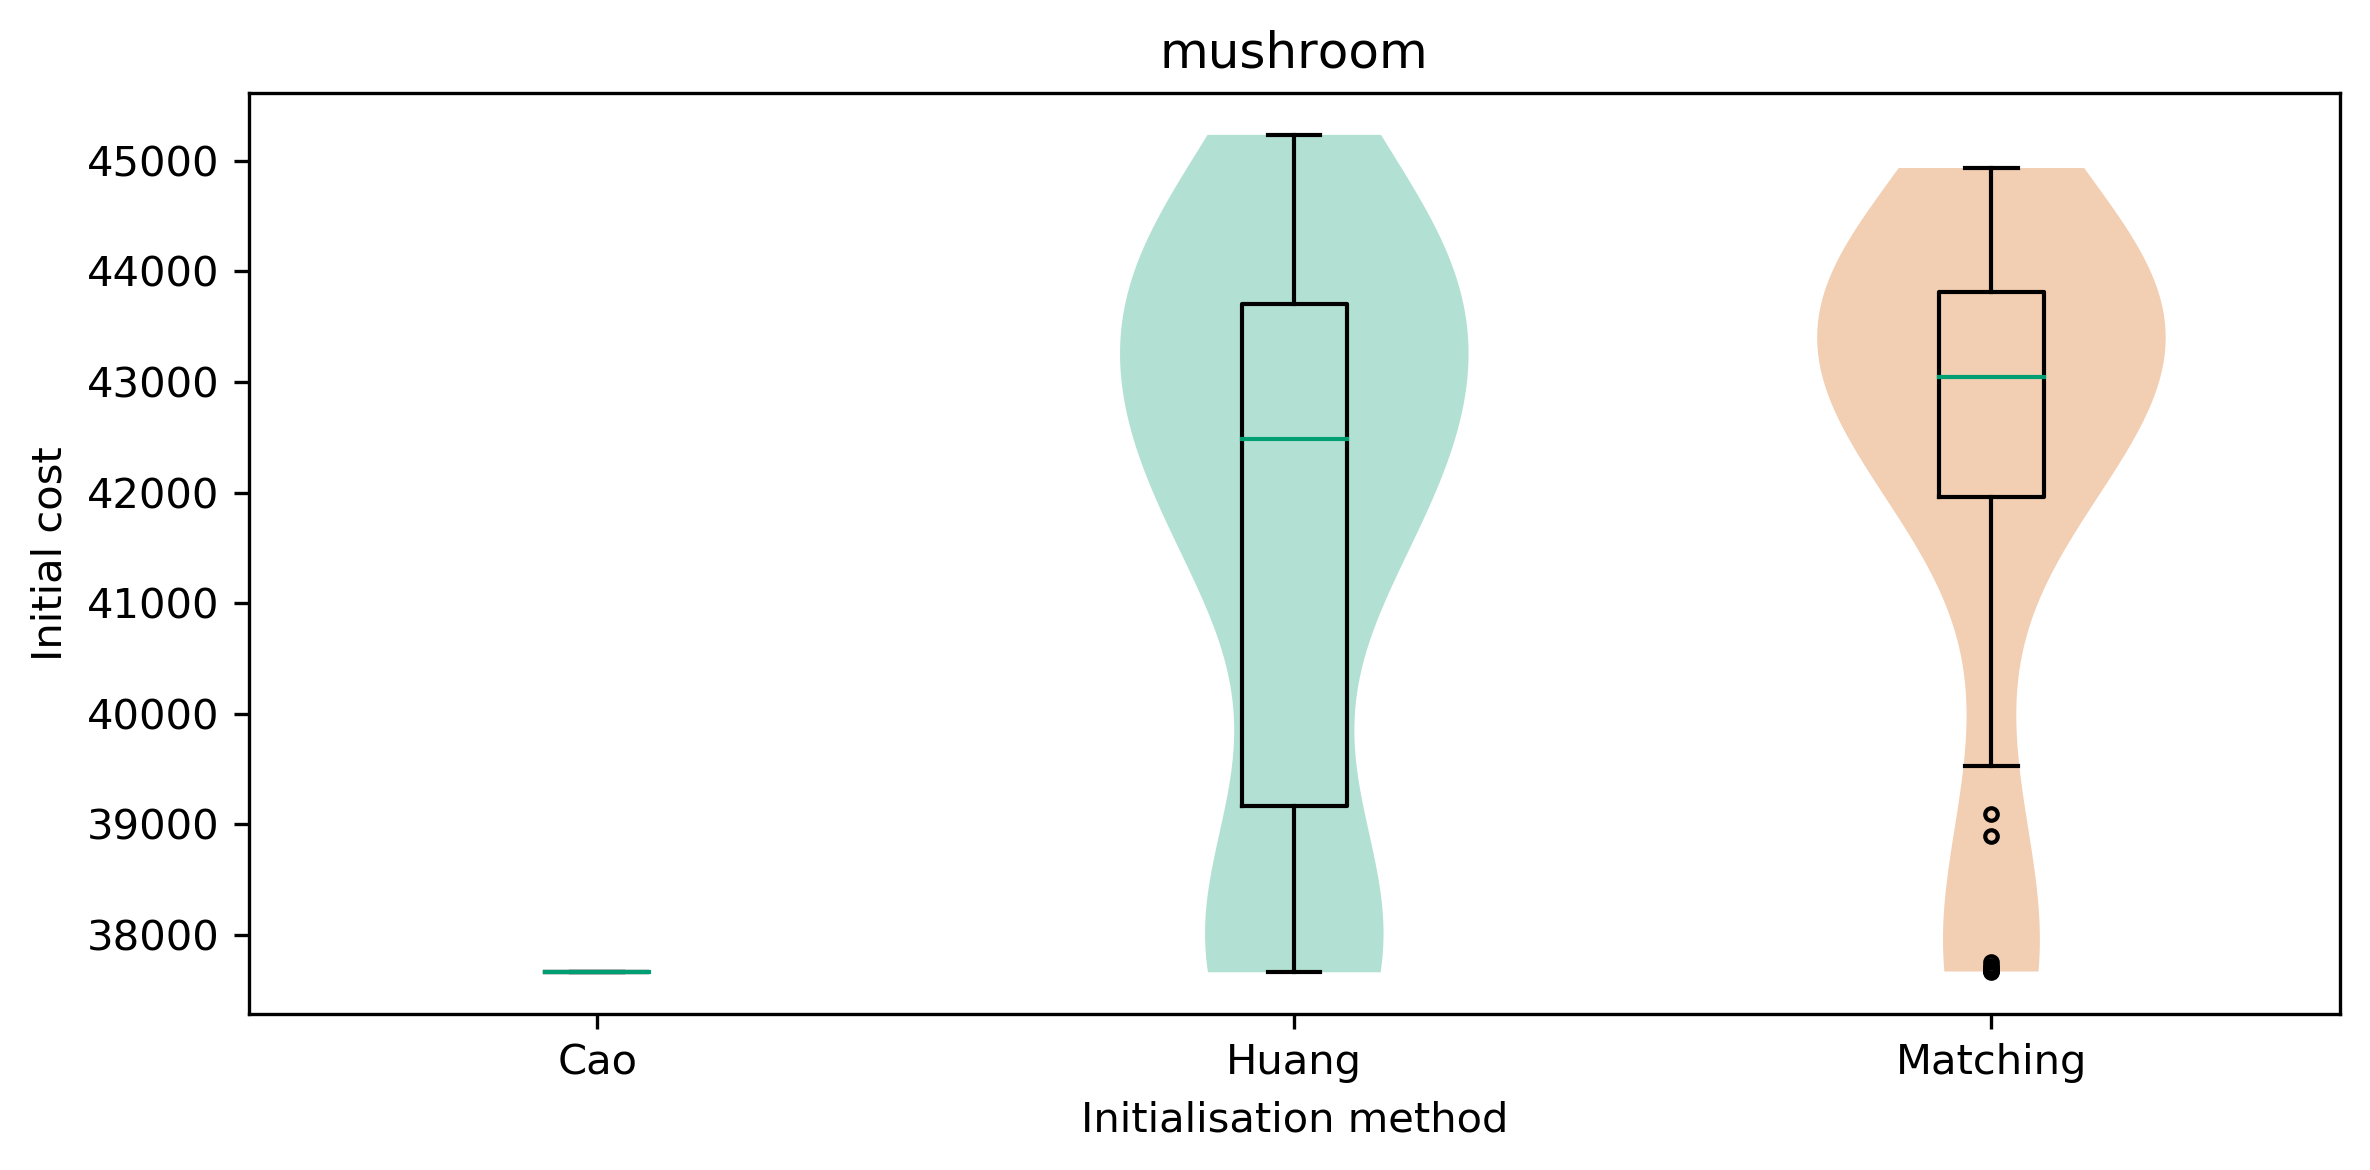

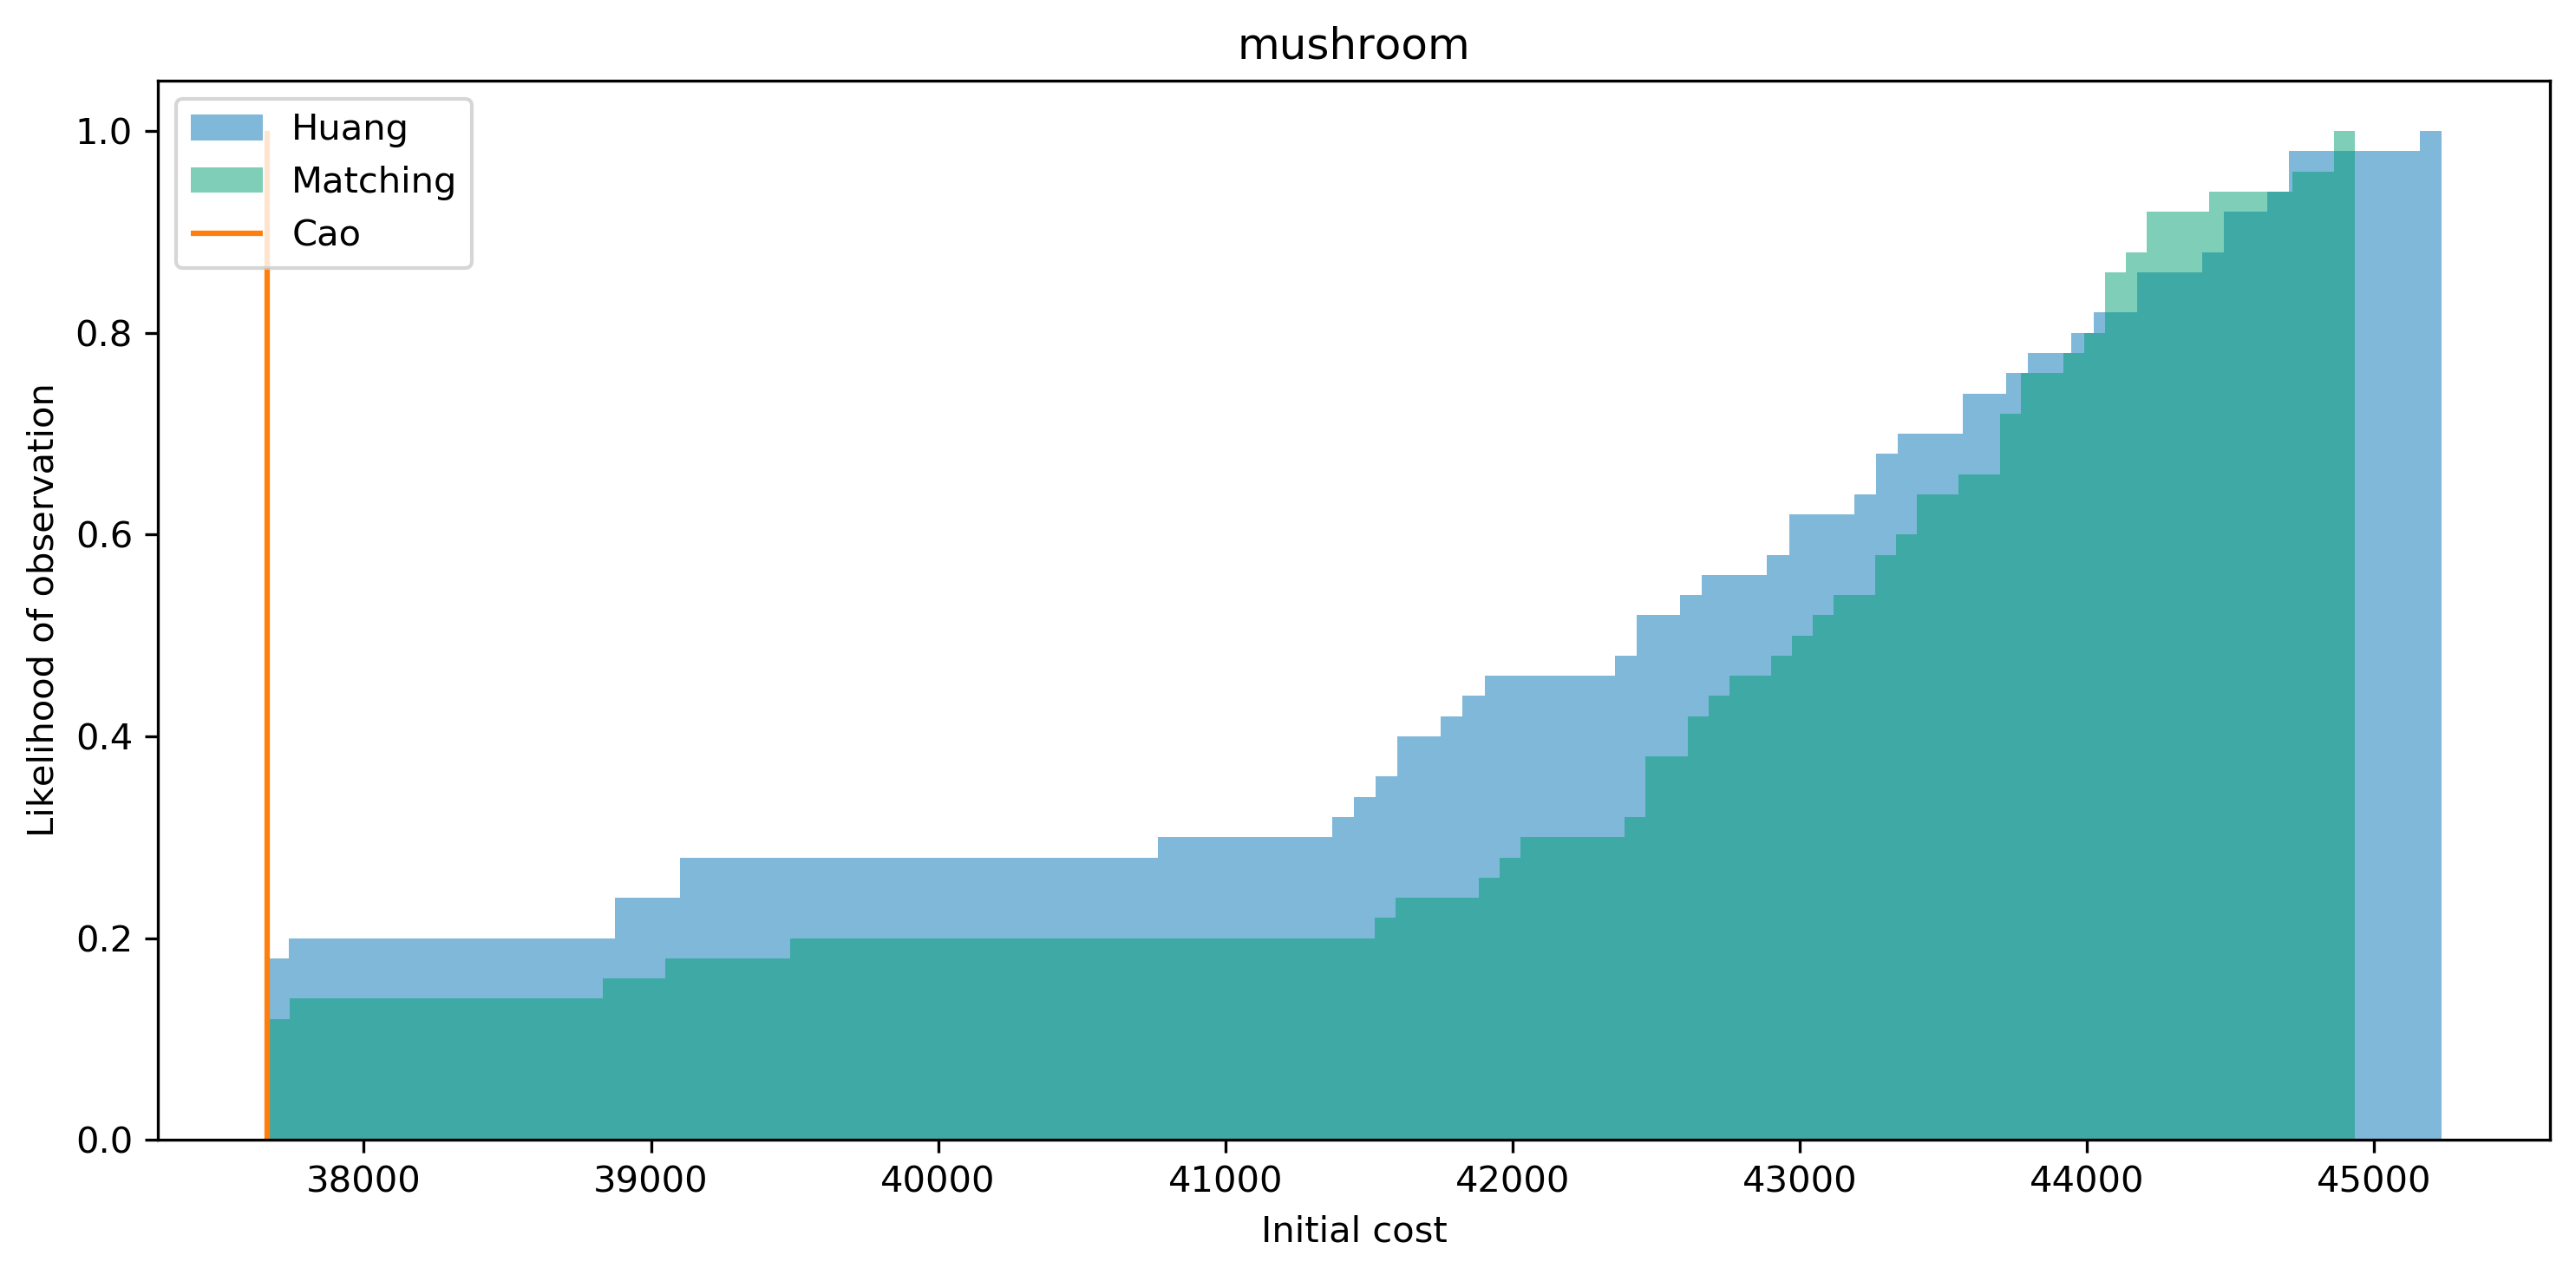

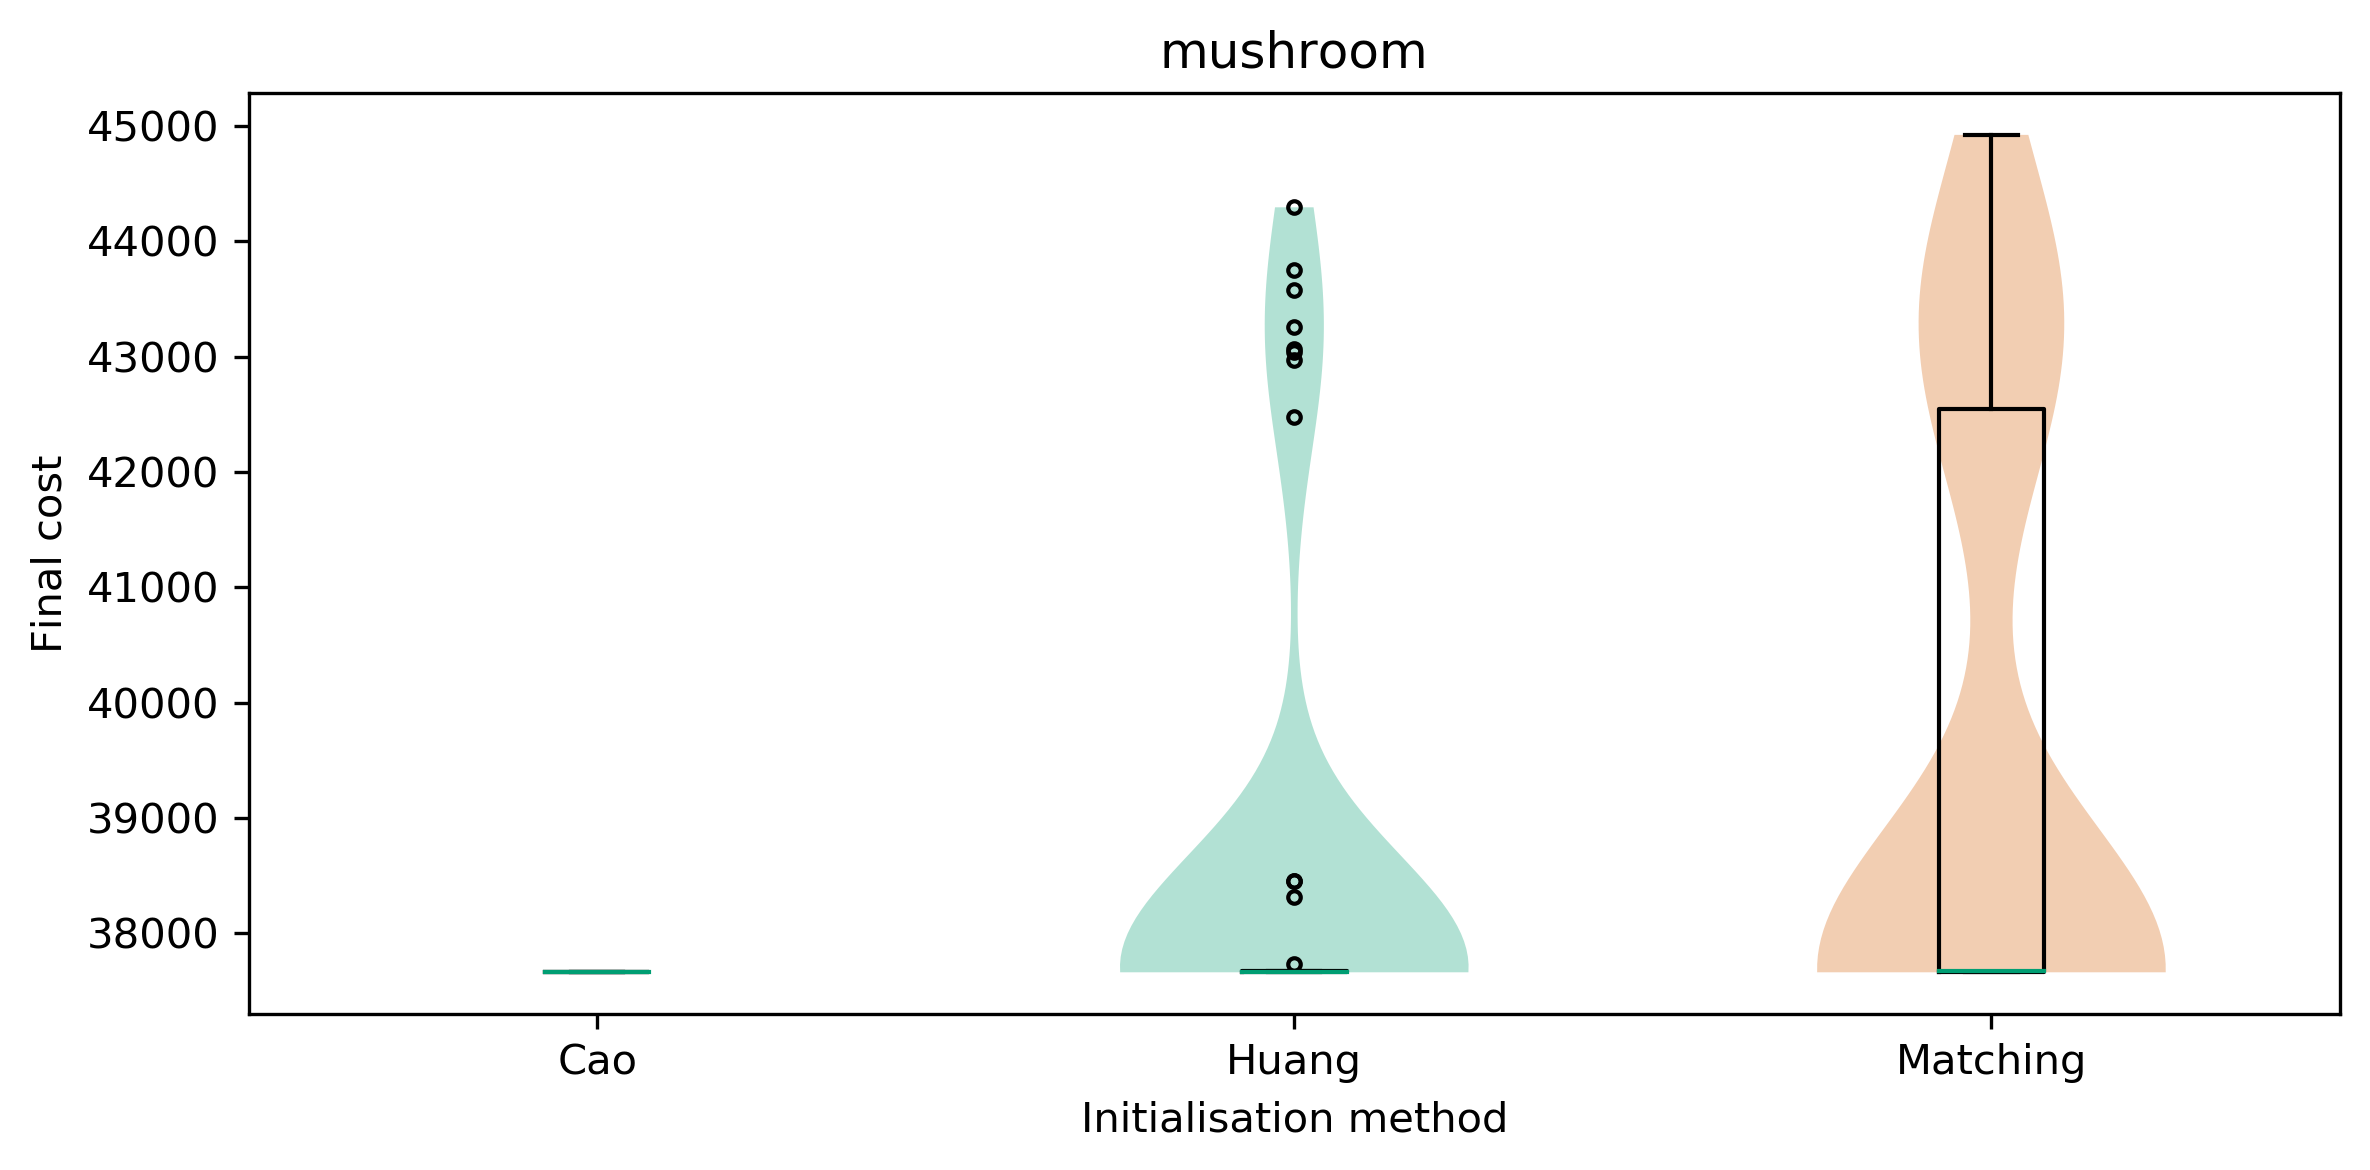

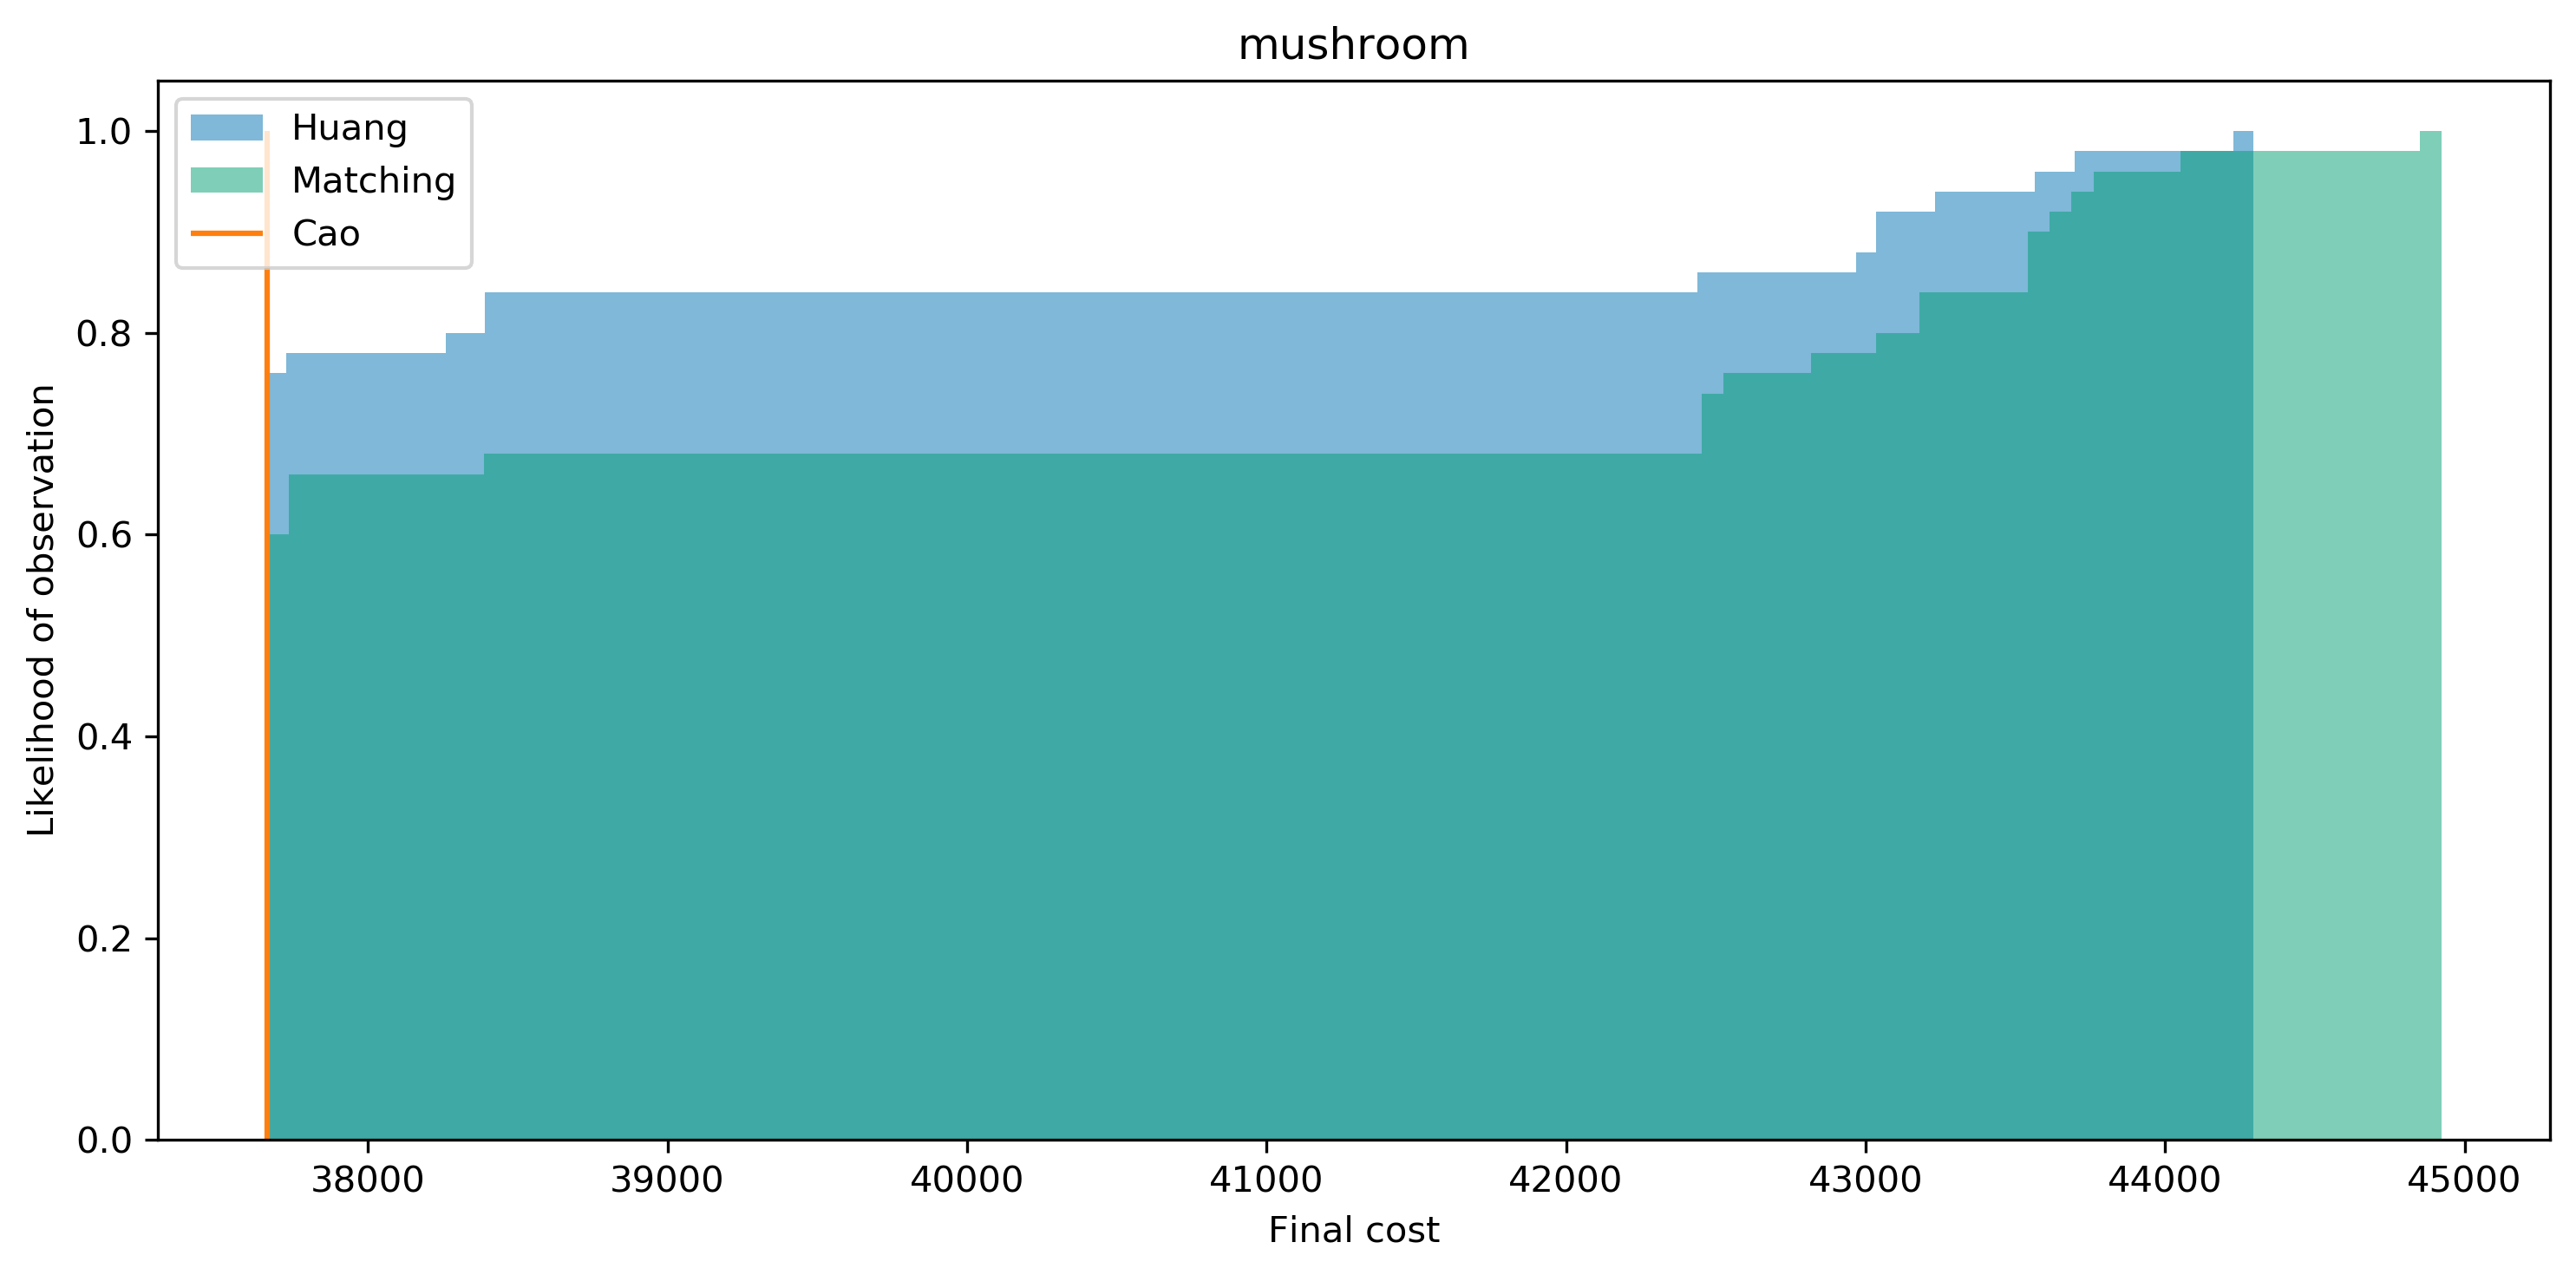

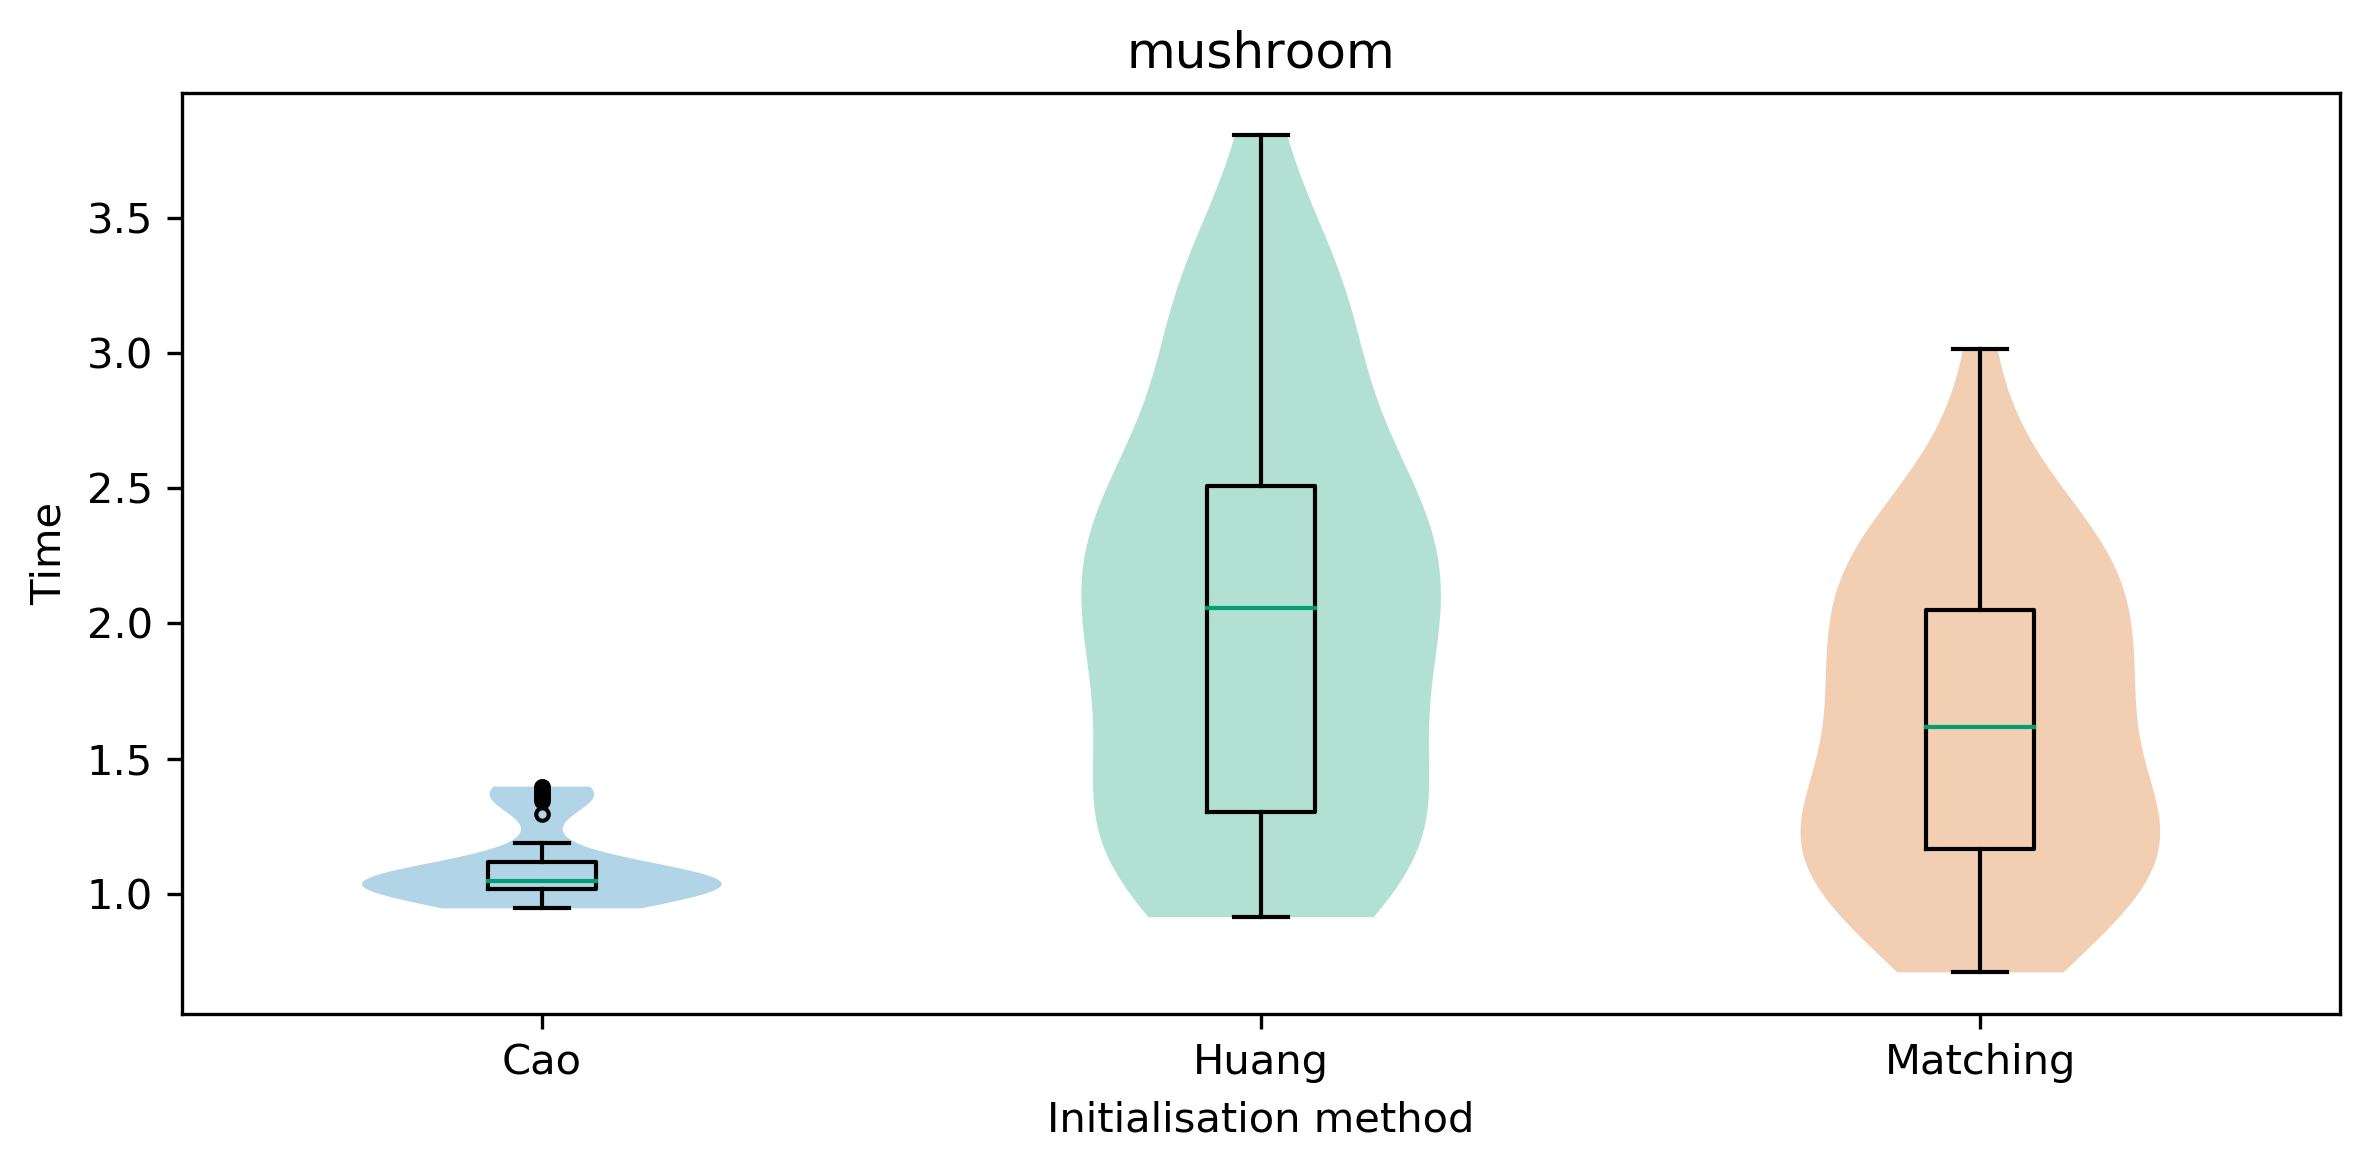

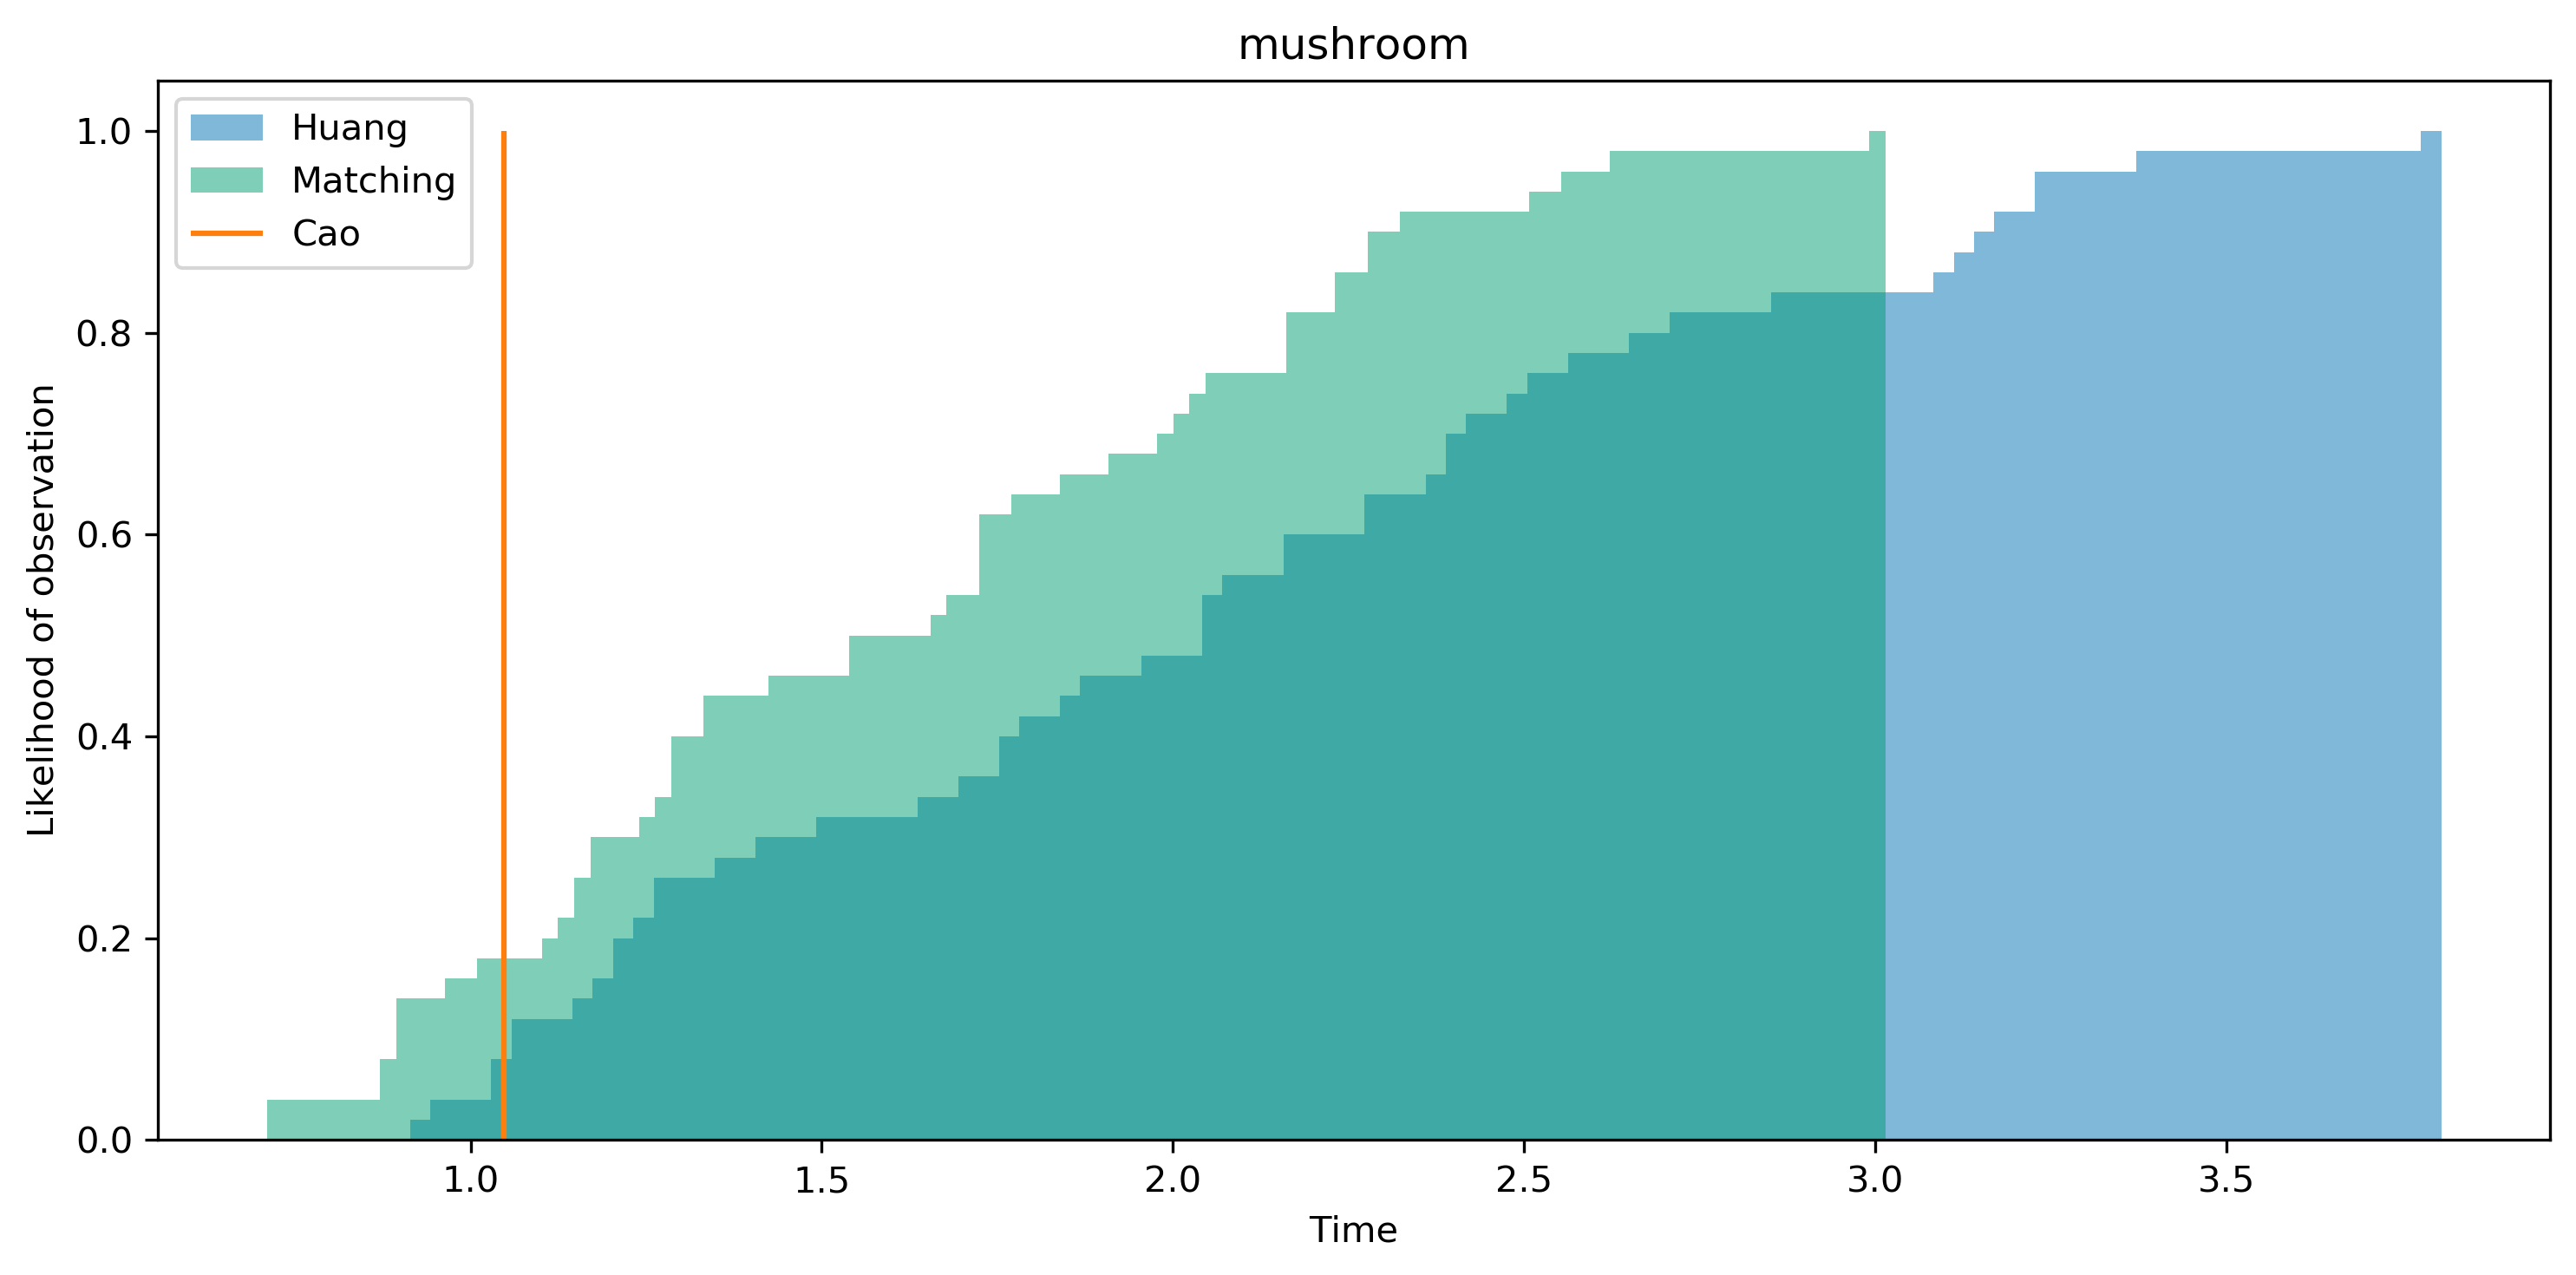

In [5]:
for root in ("elbow/", "nclasses/"):
    for name in ("breast_cancer", "soybean", "mushroom"):
        scatter_plots(name, f"../data/{root}", destination=f"../img/{root}")
        for column in ("initial_cost", "final_cost", "time"):
            violin_plots(name, column, f"../data/{root}", destination=f"../img/{root}")
            empirical_cdf_plots(
                name, column, f"../data/{root}", destination=f"../img/{root}"
            )


# Get result tables


In [6]:
def get_summary(name, root, destination=None):

    results = pd.read_csv(f"{root}{name}_results.csv")

    means = results.groupby("initialisation")[
        ["initial_cost", "final_cost", "n_iterations", "time"]
    ].mean()

    stds = results.groupby("initialisation")[
        ["initial_cost", "final_cost", "n_iterations", "time"]
    ].std()

    summary = pd.DataFrame(columns=means.columns, index=means.index)
    for j, column in enumerate(means):
        for i, _ in enumerate(means[column]):
            summary.iloc[i, j] = f"{means.iloc[i, j]:.2f} ({stds.iloc[i, j]:.3f})"

    summary.columns = ["Initial cost", "Final cost", "No. iterations", "Time"]
    summary.index = ["Cao", "Huang", "Matching"]

    if destination is not None:
        summary.to_latex(f"{destination}{name}_summary.tex")

    return summary


In [7]:
for root in ("elbow/", "nclasses/"):
    for name in ("breast_cancer", "soybean", "mushroom"):
        get_summary(name, f"../data/{root}", f"../tex/{root}")
